## Telecom Churn Case Study

In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.



For many incumbent operators, retaining high profitable customers is the number one business goal.



To reduce customer churn, telecom companies need to predict which customers are at high risk of churn.

In the Indian and the Southeast Asian market, approximately 80% of revenue comes from the top 20% customers (called high-value customers). Thus, if we can reduce churn of the high-value customers, we will be able to reduce significant revenue leakage.

**Goal :** To build a Machine Learning Model which can predict the churning of high value customers.

### Importing required modules

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#Import the statsmodel and its corresponding modules
import statsmodels
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
#Import the sklearn and its corresponding modules
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [ ]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

### Reading and Understanding Data

In [ ]:
#Reading the data
churn_data = pd.read_csv('telecom_churn_data.csv')
churn_data.head()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0     7000842753        109             0.0             0.0             0.0   
1     7001865778        109             0.0             0.0             0.0   
2     7001625959        109             0.0             0.0             0.0   
3     7001204172        109             0.0             0.0             0.0   
4     7000142493        109             0.0             0.0             0.0   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
0            6/30/2014            7/31/2014            8/31/2014   
1            6/30/2014            7/31/2014            8/31/2014   
2            6/30/2014            7/31/2014            8/31/2014   
3            6/30/2014            7/31/2014            8/31/2014   
4            6/30/2014            7/31/2014            8/31/2014   

  last_date_of_month_9   arpu_6   arpu_7   arpu_8   arpu_9  onnet_mou_6  \
0            9/30/2014  197.385  214.816  213.803   21.100          NaN   
1            9/30/2014   34.047  355.074  268.321   86.285        24.11   
2            9/30/2014  167.690  189.058  210.226  290.714        11.54   
3            9/30/2014  221.338  251.102  508.054  389.500        99.91   
4            9/30/2014  261.636  309.876  238.174  163.426        50.31   

   onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  \
0          NaN         0.00          NaN           NaN           NaN   
1        78.68         7.68        18.34         15.74         99.84   
2        55.24        37.26        74.81        143.33        220.59   
3        54.39       310.98       241.71        123.31        109.01   
4       149.44        83.89        58.78         76.96         91.88   

   offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0          0.00           NaN            NaN            NaN           0.00   
1        304.76         53.76            0.0           0.00           0.00   
2        208.36        118.91            0.0           0.00           0.00   
3         71.68        113.54            0.0          54.86          44.38   
4        124.26         45.81            0.0           0.00           0.00   

   roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  \
0            NaN            NaN            NaN           0.00            NaN   
1           0.00            0.0           0.00           0.00           0.00   
2          38.49            0.0           0.00           0.00          70.94   
3           0.00            0.0          28.09          39.04           0.00   
4           0.00            0.0           0.00           0.00           0.00   

   loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  \
0               NaN               NaN              0.00               NaN   
1             23.88             74.56              7.68             18.34   
2              7.19             28.74             13.58             14.39   
3             73.68             34.81             10.61             15.49   
4             50.31            149.44             83.89             58.78   

   loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  \
0               NaN               NaN              0.00               NaN   
1             11.51             75.94            291.86             53.76   
2             29.34             16.86             38.46             28.16   
3            107.43             83.21             22.46             65.46   
4             67.64             91.88            124.26             37.89   

   loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  \
0               NaN               NaN              0.00               NaN   
1              0.00              0.00              0.00              0.00   
2             24.11             21.79             15.61             22.24   
3              1.91              0.65              

In [ ]:
#Checking the shape of the dataframe
churn_data.shape

(99999, 226)

In [ ]:
#Checking the statistical information of the data
churn_data.describe(percentiles=[.25, .5, .75, .90, .95, .99])

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  \
count   9.999900e+04    99999.0         98981.0         98981.0   
mean    7.001207e+09      109.0             0.0             0.0   
std     6.956694e+05        0.0             0.0             0.0   
min     7.000000e+09      109.0             0.0             0.0   
25%     7.000606e+09      109.0             0.0             0.0   
50%     7.001205e+09      109.0             0.0             0.0   
75%     7.001812e+09      109.0             0.0             0.0   
90%     7.002174e+09      109.0             0.0             0.0   
95%     7.002291e+09      109.0             0.0             0.0   
99%     7.002387e+09      109.0             0.0             0.0   
max     7.002411e+09      109.0             0.0             0.0   

       loc_ic_t2o_mou        arpu_6        arpu_7        arpu_8        arpu_9  \
count         98981.0  99999.000000  99999.000000  99999.000000  99999.000000   
mean              0.0    282.987358    278.536648    279.154731    261.645069   
std               0.0    328.439770    338.156291    344.474791    341.998630   
min               0.0  -2258.709000  -2014.045000   -945.808000  -1899.505000   
25%               0.0     93.411500     86.980500     84.126000     62.685000   
50%               0.0    197.704000    191.640000    192.080000    176.849000   
75%               0.0    371.060000    365.344500    369.370500    353.466500   
90%               0.0    620.075400    617.252000    618.160400    601.537000   
95%               0.0    829.488200    828.357200    833.303300    805.107200   
99%               0.0   1410.792540   1428.685880   1455.539960   1402.445660   
max               0.0  27731.088000  35145.834000  33543.624000  38805.617000   

        onnet_mou_6   onnet_mou_7   onnet_mou_8   onnet_mou_9  offnet_mou_6  \
count  96062.000000  96140.000000  94621.000000  92254.000000  96062.000000   
mean     132.395875    133.670805    133.018098    130.302327    197.935577   
std      297.207406    308.794148    308.951589    308.477668    316.851613   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        7.380000      6.660000      6.460000      5.330000     34.730000   
50%       34.310000     32.330000     32.360000     29.840000     96.310000   
75%      118.740000    115.595000    115.860000    112.130000    231.860000   
90%      344.102000    348.035000    345.030000    342.890000    477.325000   
95%      612.407500    624.835500    620.690000    617.232500    727.879000   
99%     1431.760500   1478.533300   1480.334000   1445.766400   1539.535800   
max     7376.710000   8157.780000  10752.560000  10427.460000   8362.360000   

       offnet_mou_7  offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  \
count  96140.000000  94621.000000  92254.000000   96062.000000   96140.000000   
mean     197.045133    196.574803    190.337222       9.950013       7.149898   
std      325.862803    327.170662    319.396092      72.825411      73.447948   
min        0.000000      0.000000      0.000000       0.000000       0.000000   
25%       32.190000     31.630000     27.130000       0.000000       0.000000   
50%       91.735000     92.140000     87.290000       0.000000       0.000000   
75%      226.815000    228.260000    220.505000       0.000000       0.000000   
90%      480.431000    486.310000    471.031000      11.810000       5.060000   
95%      744.225000    734.860000    720.120500      40.640000      23.140000   
99%     1549.379500   1530.398000   1521.328700     219.847000     154.483200   
max     9667.130000  14007.340000  10310.760000   13724.380000   15371.040000   

       roam_ic_mou_8  roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  \
count   94621.000000   92254.000000   96062.000000   96140.000000   
mean        7.292981       6.343841      13.911337       9.818732   
std        68.402466      57.137537      71.443196      58.455762   
min         0.000000       0.00

In [ ]:
#Checking the information related to no of columns, data types etc..
churn_data.info(max_cols=226)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
 #    Column                    Non-Null Count  Dtype  
---   ------                    --------------  -----  
 0    mobile_number             99999 non-null  int64  
 1    circle_id                 99999 non-null  int64  
 2    loc_og_t2o_mou            98981 non-null  float64
 3    std_og_t2o_mou            98981 non-null  float64
 4    loc_ic_t2o_mou            98981 non-null  float64
 5    last_date_of_month_6      99999 non-null  object 
 6    last_date_of_month_7      99398 non-null  object 
 7    last_date_of_month_8      98899 non-null  object 
 8    last_date_of_month_9      98340 non-null  object 
 9    arpu_6                    99999 non-null  float64
 10   arpu_7                    99999 non-null  float64
 11   arpu_8                    99999 non-null  float64
 12   arpu_9                    99999 non-null  float64
 13   onnet_mou_6               96062 non-null  fl

In [ ]:
#Checking the Single valued columns
single_value_col=[]
for i in churn_data.columns:
  if churn_data[i].nunique() ==1:
    print(i,':', churn_data[i].nunique())
    single_value_col.append(i)
print(single_value_col)

circle_id : 1
loc_og_t2o_mou : 1
std_og_t2o_mou : 1
loc_ic_t2o_mou : 1
last_date_of_month_6 : 1
last_date_of_month_7 : 1
last_date_of_month_8 : 1
last_date_of_month_9 : 1
std_og_t2c_mou_6 : 1
std_og_t2c_mou_7 : 1
std_og_t2c_mou_8 : 1
std_og_t2c_mou_9 : 1
std_ic_t2o_mou_6 : 1
std_ic_t2o_mou_7 : 1
std_ic_t2o_mou_8 : 1
std_ic_t2o_mou_9 : 1
['circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 'last_date_of_month_9', 'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8', 'std_og_t2c_mou_9', 'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8', 'std_ic_t2o_mou_9']


In [ ]:
#Checking the unique values in each and every column
for i in churn_data.columns:
  print(i,':', churn_data[i].nunique())

mobile_number : 99999
circle_id : 1
loc_og_t2o_mou : 1
std_og_t2o_mou : 1
loc_ic_t2o_mou : 1
last_date_of_month_6 : 1
last_date_of_month_7 : 1
last_date_of_month_8 : 1
last_date_of_month_9 : 1
arpu_6 : 85681
arpu_7 : 85308
arpu_8 : 83615
arpu_9 : 79937
onnet_mou_6 : 24313
onnet_mou_7 : 24336
onnet_mou_8 : 24089
onnet_mou_9 : 23565
offnet_mou_6 : 31140
offnet_mou_7 : 31023
offnet_mou_8 : 30908
offnet_mou_9 : 30077
roam_ic_mou_6 : 6512
roam_ic_mou_7 : 5230
roam_ic_mou_8 : 5315
roam_ic_mou_9 : 4827
roam_og_mou_6 : 8038
roam_og_mou_7 : 6639
roam_og_mou_8 : 6504
roam_og_mou_9 : 5882
loc_og_t2t_mou_6 : 13539
loc_og_t2t_mou_7 : 13411
loc_og_t2t_mou_8 : 13336
loc_og_t2t_mou_9 : 12949
loc_og_t2m_mou_6 : 20905
loc_og_t2m_mou_7 : 20637
loc_og_t2m_mou_8 : 20544
loc_og_t2m_mou_9 : 20141
loc_og_t2f_mou_6 : 3860
loc_og_t2f_mou_7 : 3863
loc_og_t2f_mou_8 : 3807
loc_og_t2f_mou_9 : 3758
loc_og_t2c_mou_6 : 2235
loc_og_t2c_mou_7 : 2426
loc_og_t2c_mou_8 : 2516
loc_og_t2c_mou_9 : 2332
loc_og_mou_6 : 26372
lo

In [ ]:
#Get the list of categorical columns
cat_col=[]
for i in churn_data.columns:
  if churn_data[i].nunique() >1 and churn_data[i].nunique() <10:
    print(i,':', churn_data[i].nunique())
    cat_col.append(i)

night_pck_user_6 : 2
night_pck_user_7 : 2
night_pck_user_8 : 2
night_pck_user_9 : 2
monthly_2g_6 : 5
monthly_2g_7 : 6
monthly_2g_8 : 6
monthly_2g_9 : 5
fb_user_6 : 2
fb_user_7 : 2
fb_user_8 : 2
fb_user_9 : 2


In [ ]:
#list of categorical columns
print(cat_col)
print(len(cat_col))

['night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8', 'night_pck_user_9', 'monthly_2g_6', 'monthly_2g_7', 'monthly_2g_8', 'monthly_2g_9', 'fb_user_6', 'fb_user_7', 'fb_user_8', 'fb_user_9']
12


In [ ]:
#Get the unique values of categorical columns
for i in cat_col:
  print(i,':', churn_data[i].value_counts())

night_pck_user_6 : night_pck_user_6
0.0    24522
1.0      631
Name: count, dtype: int64
night_pck_user_7 : night_pck_user_7
0.0    24982
1.0      589
Name: count, dtype: int64
night_pck_user_8 : night_pck_user_8
0.0    25790
1.0      549
Name: count, dtype: int64
night_pck_user_9 : night_pck_user_9
0.0    25508
1.0      414
Name: count, dtype: int64
monthly_2g_6 : monthly_2g_6
0    92674
1     6728
2      562
3       28
4        7
Name: count, dtype: int64
monthly_2g_7 : monthly_2g_7
0    92435
1     6855
2      669
3       33
4        5
5        2
Name: count, dtype: int64
monthly_2g_8 : monthly_2g_8
0    92591
1     6775
2      586
3       37
4        8
5        2
Name: count, dtype: int64
monthly_2g_9 : monthly_2g_9
0    93735
1     5695
2      530
3       33
4        6
Name: count, dtype: int64
fb_user_6 : fb_user_6
1.0    23000
0.0     2153
Name: count, dtype: int64
fb_user_7 : fb_user_7
1.0    23238
0.0     2333
Name: count, dtype: int64
fb_user_8 : fb_user_8
1.0    23463
0.0    

In [ ]:
#Get the list of Dated columns
date_col = []
for i in churn_data.columns:
  if churn_data[i].dtype == 'object':
    date_col.append(i)

In [ ]:
#List of Dated columns
print(date_col)
print(len(date_col))

['last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 'last_date_of_month_9', 'date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8', 'date_of_last_rech_9', 'date_of_last_rech_data_6', 'date_of_last_rech_data_7', 'date_of_last_rech_data_8', 'date_of_last_rech_data_9']
12


In [ ]:
#Get the unique values of categorical columns
for i in date_col:
  print(i,':', churn_data[i].nunique())

last_date_of_month_6 : 1
last_date_of_month_7 : 1
last_date_of_month_8 : 1
last_date_of_month_9 : 1
date_of_last_rech_6 : 30
date_of_last_rech_7 : 31
date_of_last_rech_8 : 31
date_of_last_rech_9 : 30
date_of_last_rech_data_6 : 30
date_of_last_rech_data_7 : 31
date_of_last_rech_data_8 : 31
date_of_last_rech_data_9 : 30


In [ ]:
#Get the list of numercial columns
num_col = [i for i in churn_data.columns if i not in cat_col and i not in date_col]
len(num_col)

202

In [ ]:
#List of numerical columns
print(num_col)
print(len(num_col))

['mobile_number', 'circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'arpu_6', 'arpu_7', 'arpu_8', 'arpu_9', 'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'onnet_mou_9', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8', 'offnet_mou_9', 'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8', 'roam_ic_mou_9', 'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8', 'roam_og_mou_9', 'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8', 'loc_og_t2t_mou_9', 'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8', 'loc_og_t2m_mou_9', 'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8', 'loc_og_t2f_mou_9', 'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8', 'loc_og_t2c_mou_9', 'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'loc_og_mou_9', 'std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2t_mou_9', 'std_og_t2m_mou_6', 'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 'std_og_t2m_mou_9', 'std_og_t2f_mou_6', 'std_og_t2f_mou_7', 'std_og_t2f_mou_8', 'std_og_t2f

### Data Cleaning

In [ ]:
#Dropping the single valued columns because there are of no use
churn_data.drop(['circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'std_og_t2c_mou_6', 'std_og_t2c_mou_7',
 'std_og_t2c_mou_8', 'std_og_t2c_mou_9', 'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8', 'std_ic_t2o_mou_9'], axis=1, inplace=True)
churn_data.shape

(99999, 214)

In [ ]:
#Drop the date_col because they are of no use for model analysis
churn_data.drop(date_col,axis=1,inplace=True)
churn_data.shape

(99999, 202)

In [ ]:
# Renaming the column names for the consistent formatting
churn_data = churn_data.rename({'jun_vbc_3g' : 'vbc_3g_6', 'jul_vbc_3g' : 'vbc_3g_7',
                                'aug_vbc_3g' : 'vbc_3g_8', 'sep_vbc_3g' : 'vbc_3g_9'}, axis=1)

In [ ]:
#Check the percentage of null values
a = round(churn_data.isnull().sum()/len(churn_data)*100,2)
a.sort_values(ascending=False)

count_rech_3g_6       74.85
fb_user_6             74.85
total_rech_data_6     74.85
max_rech_data_6       74.85
count_rech_2g_6       74.85
av_rech_amt_data_6    74.85
arpu_3g_6             74.85
night_pck_user_6      74.85
arpu_2g_6             74.85
arpu_3g_7             74.43
total_rech_data_7     74.43
fb_user_7             74.43
max_rech_data_7       74.43
count_rech_3g_7       74.43
arpu_2g_7             74.43
count_rech_2g_7       74.43
av_rech_amt_data_7    74.43
night_pck_user_7      74.43
count_rech_3g_9       74.08
fb_user_9             74.08
total_rech_data_9     74.08
arpu_3g_9             74.08
max_rech_data_9       74.08
count_rech_2g_9       74.08
av_rech_amt_data_9    74.08
arpu_2g_9             74.08
night_pck_user_9      74.08
total_rech_data_8     73.66
night_pck_user_8      73.66
max_rech_data_8       73.66
arpu_3g_8             73.66
count_rech_2g_8       73.66
count_rech_3g_8       73.66
av_rech_amt_data_8    73.66
arpu_2g_8             73.66
fb_user_8           

In [ ]:
#Checking the columns with morethan 50% null values
a[a>50].index

Index(['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8',
       'total_rech_data_9', 'max_rech_data_6', 'max_rech_data_7',
       'max_rech_data_8', 'max_rech_data_9', 'count_rech_2g_6',
       'count_rech_2g_7', 'count_rech_2g_8', 'count_rech_2g_9',
       'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8',
       'count_rech_3g_9', 'av_rech_amt_data_6', 'av_rech_amt_data_7',
       'av_rech_amt_data_8', 'av_rech_amt_data_9', 'arpu_3g_6', 'arpu_3g_7',
       'arpu_3g_8', 'arpu_3g_9', 'arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8',
       'arpu_2g_9', 'night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8',
       'night_pck_user_9', 'fb_user_6', 'fb_user_7', 'fb_user_8', 'fb_user_9'],
      dtype='object')

In [ ]:
#Drop the columns with morethan 50% null values
churn_data.drop(['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8',
       'total_rech_data_9', 'max_rech_data_6', 'max_rech_data_7',
       'max_rech_data_8', 'max_rech_data_9', 'count_rech_2g_6',
       'count_rech_2g_7', 'count_rech_2g_8', 'count_rech_2g_9',
       'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8',
       'count_rech_3g_9', 'av_rech_amt_data_6', 'av_rech_amt_data_7',
       'av_rech_amt_data_8', 'av_rech_amt_data_9', 'arpu_3g_6', 'arpu_3g_7',
       'arpu_3g_8', 'arpu_3g_9', 'arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8',
       'arpu_2g_9', 'night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8',
       'night_pck_user_9', 'fb_user_6', 'fb_user_7', 'fb_user_8', 'fb_user_9'],axis=1,inplace=True)
churn_data.shape

(99999, 166)

In [ ]:
#Check the percentage of null values again
a = round(churn_data.isnull().sum()/len(churn_data)*100,2)
a.sort_values(ascending=False)

og_others_9           7.75
roam_ic_mou_9         7.75
loc_og_t2f_mou_9      7.75
loc_og_t2m_mou_9      7.75
isd_og_mou_9          7.75
loc_ic_t2t_mou_9      7.75
loc_og_t2t_mou_9      7.75
loc_ic_t2m_mou_9      7.75
loc_ic_t2f_mou_9      7.75
std_og_t2t_mou_9      7.75
roam_og_mou_9         7.75
loc_ic_mou_9          7.75
std_og_mou_9          7.75
std_ic_t2t_mou_9      7.75
loc_og_t2c_mou_9      7.75
std_ic_t2m_mou_9      7.75
offnet_mou_9          7.75
std_ic_t2f_mou_9      7.75
std_og_t2f_mou_9      7.75
std_ic_mou_9          7.75
onnet_mou_9           7.75
spl_ic_mou_9          7.75
loc_og_mou_9          7.75
isd_ic_mou_9          7.75
std_og_t2m_mou_9      7.75
ic_others_9           7.75
spl_og_mou_9          7.75
spl_og_mou_8          5.38
std_og_mou_8          5.38
std_og_t2f_mou_8      5.38
isd_og_mou_8          5.38
loc_ic_mou_8          5.38
og_others_8           5.38
loc_ic_t2t_mou_8      5.38
loc_ic_t2m_mou_8      5.38
std_ic_t2t_mou_8      5.38
std_ic_t2m_mou_8      5.38
s

In [ ]:
#Check the rows with morethan 50% values
rows_50 = churn_data[(churn_data.isnull().sum(axis=1)) > (len(churn_data.columns)//2)]
rows_50.head()

mobile_number   arpu_6  arpu_7  arpu_8  arpu_9  onnet_mou_6  onnet_mou_7  \
201     7000669827   45.000    46.5   46.50    45.0          NaN          NaN   
202     7001788209  126.339     0.0    0.00     0.0          NaN          NaN   
232     7000621478    0.700     0.0  108.46     0.0          NaN          NaN   
275     7000464930   90.208     0.0    0.00     0.0          NaN          NaN   
279     7002323802    0.900     0.0  106.76     0.0          NaN          NaN   

     onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  offnet_mou_8  \
201          NaN          NaN           NaN           NaN           NaN   
202          NaN          NaN           NaN           NaN           NaN   
232          NaN          NaN           NaN           NaN           NaN   
275          NaN          NaN           NaN           NaN           NaN   
279          NaN          NaN           NaN           NaN           NaN   

     offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_ic_mou_9  \
201           NaN            NaN            NaN            NaN            NaN   
202           NaN            NaN            NaN            NaN            NaN   
232           NaN            NaN            NaN            NaN            NaN   
275           NaN            NaN            NaN            NaN            NaN   
279           NaN            NaN            NaN            NaN            NaN   

     roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  \
201            NaN            NaN            NaN            NaN   
202            NaN            NaN            NaN            NaN   
232            NaN            NaN            NaN            NaN   
275            NaN            NaN            NaN            NaN   
279            NaN            NaN            NaN            NaN   

     loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  \
201               NaN               NaN               NaN               NaN   
202               NaN               NaN               NaN               NaN   
232               NaN               NaN               NaN               NaN   
275               NaN               NaN               NaN               NaN   
279               NaN               NaN               NaN               NaN   

     loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  \
201               NaN               NaN               NaN               NaN   
202               NaN               NaN               NaN               NaN   
232               NaN               NaN               NaN               NaN   
275               NaN               NaN               NaN               NaN   
279               NaN               NaN               NaN               NaN   

     loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  \
201               NaN               NaN               NaN               NaN   
202               NaN               NaN               NaN               NaN   
232               NaN               NaN               NaN               NaN   
275               NaN               NaN               NaN               NaN   
279               NaN               NaN               NaN               NaN   

     loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_t2c_mou_9  \
201               NaN               NaN               NaN               NaN   
202               NaN               NaN               NaN               NaN   
232               NaN               NaN               NaN               NaN   
275               NaN               NaN               NaN               NaN   
279               NaN               NaN               NaN               NaN   

     loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  loc_og_mou_9  std_og_t2t_mou_6  \
201           NaN           NaN           NaN           NaN               NaN   
202           NaN           NaN           NaN           NaN               NaN   
232           NaN           NaN   

In [ ]:
#Drop the rows with morethan 50% values
churn_data.drop(rows_50.index,axis=0,inplace=True)
churn_data.shape

(98981, 166)

In [ ]:
#Check the percentage of null values again
a = round(churn_data.isnull().sum()/len(churn_data)*100,2).to_frame('percent')
a.sort_values('percent',ascending=False)

percent
og_others_9            6.80
roam_ic_mou_9          6.80
loc_og_t2f_mou_9       6.80
loc_og_t2m_mou_9       6.80
isd_og_mou_9           6.80
loc_ic_t2t_mou_9       6.80
loc_og_t2t_mou_9       6.80
loc_ic_t2m_mou_9       6.80
loc_ic_t2f_mou_9       6.80
std_og_t2t_mou_9       6.80
roam_og_mou_9          6.80
loc_ic_mou_9           6.80
std_og_mou_9           6.80
std_ic_t2t_mou_9       6.80
loc_og_t2c_mou_9       6.80
std_ic_t2m_mou_9       6.80
offnet_mou_9           6.80
std_ic_t2f_mou_9       6.80
std_og_t2f_mou_9       6.80
std_ic_mou_9           6.80
onnet_mou_9            6.80
spl_ic_mou_9           6.80
loc_og_mou_9           6.80
isd_ic_mou_9           6.80
std_og_t2m_mou_9       6.80
ic_others_9            6.80
spl_og_mou_9           6.80
spl_og_mou_8           4.40
std_og_mou_8           4.40
std_og_t2f_mou_8       4.40
isd_og_mou_8           4.40
loc_ic_mou_8           4.40
og_others_8            4.40
loc_ic_t2t_mou_8       4.40
loc_ic_t2m_mou_8       4.40
std_ic_t2t_mou_8       4.40
std_ic_t2m_mou_8       4.40
std_ic_t2f_mou_8       4.40
std_ic_mou_8           4.40
spl_ic_mou_8           4.40
isd_ic_mou_8           4.40
ic_others_8            4.40
std_og_t2m_mou_8       4.40
loc_ic_t2f_mou_8       4.40
std_og_t2t_mou_8       4.40
loc_og_mou_8           4.40
loc_og_t2f_mou_8       4.40
loc_og_t2m_mou_8       4.40
onnet_mou_8            4.40
loc_og_t2c_mou_8       4.40
roam_ic_mou_8          4.40
loc_og_t2t_mou_8       4.40
roam_og_mou_8          4.40
offnet_mou_8           4.40
std_ic_t2m_mou_6       2.95
loc_ic_mou_6           2.95
loc_ic_t2f_mou_6       2.95
std_ic_mou_6           2.95
roam_og_mou_6          2.95
loc_og_t2m_mou_6       2.95
loc_ic_t2m_mou_6       2.95
loc_og_t2t_mou_6       2.95
std_ic_t2f_mou_6       2.95
loc_ic_t2t_mou_6       2.95
std_ic_t2t_mou_6       2.95
roam_ic_mou_6          2.95
loc_og_t2f_mou_6       2.95
isd_og_mou_6           2.95
loc_og_t2c_mou_6       2.95
ic_others_6            2.95
std_og_t2t_mou_6       2.95
std_og_t2f_mou_6       2.95
onnet_mou_6            2.95
std_og_mou_6           2.95
isd_ic_mou_6           2.95
loc_og_mou_6           2.95
std_og_t2m_mou_6       2.95
spl_og_mou_6           2.95
spl_ic_mou_6           2.95
og_others_6            2.95
offnet_mou_6           2.95
onnet_mou_7            2.87
roam_ic_mou_7          2.87
offnet_mou_7           2.87
std_ic_t2f_mou_7       2.87
spl_ic_mou_7           2.87
std_ic_t2m_mou_7       2.87
isd_ic_mou_7           2.87
std_ic_mou_7           2.87
ic_others_7            2.87
roam_og_mou_7          2.87
std_ic_t2t_mou_7       2.87
loc_ic_mou_7           2.87
og_others_7            2.87
std_og_t2m_mou_7       2.87
std_og_t2t_mou_7       2.87
std_og_t2f_mou_7       2.87
loc_og_t2t_mou_7       2.87
std_og_mou_7           2.87
isd_og_mou_7           2.87
loc_og_t2c_mou_7       2.87
spl_og_mou_7           2.87
loc_og_t2f_mou_7       2.87
loc_og_mou_7           2.87
loc_ic_t2t_mou_7       2.87
loc_ic_t2f_mou_7       2.87
loc_ic_t2m_mou_7       2.87
loc_og_t2m_mou_7       2.87
sachet_2g_8            0.00
sachet_2g_6            0.00
monthly_2g_9           0.00
monthly_2g_8           0.00
monthly_2g_7           0.00
vol_2g_mb_6            0.00
monthly_2g_6           0.00
vol_3g_mb_9            0.00
vol_3g_mb_8            0.00
vol_3g_mb_7            0.00
vol_3g_mb_6            0.00
vol_2g_mb_9            0.00
vol_2g_mb_8            0.00
sachet_2g_7            0.00
vbc_3g_6               0.00
sachet_2g_9            0.00
monthly_3g_9           0.00
vbc_3g_7               0.00
sachet_3g_6            0.00
vbc_3g_8               0.00
sachet_3g_7            0.00
sachet_3g_8            0.00
sachet_3g_9            0.00
aon                    0.00
monthly_3g_6           0.00
monthly_3g_7           0.00
monthly_3g_8           0.00
vol_2g_mb_7            0.00
mobile_number          0.00
last_day_rch_amt_9     0.00
total_rech_num_6       0.00
arpu_7                 0.00
arpu_8                 0.00
arpu_9                 0.00
total_og_mou_6  

#### Filter High-value customers

As mentioned above, you need to predict churn only for the high-value customers.
- Define high-value customers as follows: Those who have recharged with an amount more than or equal to X, where X is the 70th percentile of the average recharge amount in the first two months (the good phase).

In [ ]:
#  Creating a new column with average recharge amount of June and July.
churn_data['avg_rech_amt_6_7'] = (churn_data['total_rech_amt_6'] + churn_data['total_rech_amt_7'])/2
churn_data.head()

mobile_number   arpu_6   arpu_7   arpu_8   arpu_9  onnet_mou_6  \
0     7000842753  197.385  214.816  213.803   21.100          NaN   
1     7001865778   34.047  355.074  268.321   86.285        24.11   
2     7001625959  167.690  189.058  210.226  290.714        11.54   
3     7001204172  221.338  251.102  508.054  389.500        99.91   
4     7000142493  261.636  309.876  238.174  163.426        50.31   

   onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  \
0          NaN         0.00          NaN           NaN           NaN   
1        78.68         7.68        18.34         15.74         99.84   
2        55.24        37.26        74.81        143.33        220.59   
3        54.39       310.98       241.71        123.31        109.01   
4       149.44        83.89        58.78         76.96         91.88   

   offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0          0.00           NaN            NaN            NaN           0.00   
1        304.76         53.76            0.0           0.00           0.00   
2        208.36        118.91            0.0           0.00           0.00   
3         71.68        113.54            0.0          54.86          44.38   
4        124.26         45.81            0.0           0.00           0.00   

   roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  \
0            NaN            NaN            NaN           0.00            NaN   
1           0.00            0.0           0.00           0.00           0.00   
2          38.49            0.0           0.00           0.00          70.94   
3           0.00            0.0          28.09          39.04           0.00   
4           0.00            0.0           0.00           0.00           0.00   

   loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  \
0               NaN               NaN              0.00               NaN   
1             23.88             74.56              7.68             18.34   
2              7.19             28.74             13.58             14.39   
3             73.68             34.81             10.61             15.49   
4             50.31            149.44             83.89             58.78   

   loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  \
0               NaN               NaN              0.00               NaN   
1             11.51             75.94            291.86             53.76   
2             29.34             16.86             38.46             28.16   
3            107.43             83.21             22.46             65.46   
4             67.64             91.88            124.26             37.89   

   loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  \
0               NaN               NaN              0.00               NaN   
1              0.00              0.00              0.00              0.00   
2             24.11             21.79             15.61             22.24   
3              1.91              0.65              4.91              2.06   
4              0.00              0.00              0.00              1.93   

   loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_t2c_mou_9  \
0               NaN               NaN              0.00               NaN   
1               0.0              2.91              0.00              0.00   
2               0.0            135.54             45.76              0.48   
3               0.0              0.00              0.00              0.00   
4               0.0              0.00              0.00              0.00   

   loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  loc_og_mou_9  std_og_t2t_mou_6  \
0           NaN           NaN          0.00           NaN               NaN   
1         35.39        150.51        299.54         72.11              0.23   
2         60.66         67.41         67.66         64.81              4.34   
3        183.03        118.68        

In [ ]:
#Cut-off was given as 70th percentile of avg_rech_amt_6_7
cut_off = churn_data['avg_rech_amt_6_7'].quantile(0.70)
print("The 70th quantile value to determine the High Value Customer is: ",cut_off)

The 70th quantile value to determine the High Value Customer is:  370.0


In [ ]:
# Filtering the data to the top 30% considered as High Value Customer
churn_data = churn_data[churn_data['avg_rech_amt_6_7'] >= cut_off]
churn_data.shape

(29793, 167)

**So the highly valued customers are around 29K.**



In [ ]:
#Check the percentage of null values again
a = round(churn_data.isnull().sum()/len(churn_data)*100,2).to_frame('percent')
a.sort_values('percent',ascending=False)

percent
og_others_9            5.33
roam_ic_mou_9          5.33
loc_og_t2f_mou_9       5.33
loc_og_t2m_mou_9       5.33
isd_og_mou_9           5.33
loc_ic_t2t_mou_9       5.33
loc_og_t2t_mou_9       5.33
loc_ic_t2m_mou_9       5.33
loc_ic_t2f_mou_9       5.33
std_og_t2t_mou_9       5.33
roam_og_mou_9          5.33
loc_ic_mou_9           5.33
std_og_mou_9           5.33
std_ic_t2t_mou_9       5.33
loc_og_t2c_mou_9       5.33
std_ic_t2m_mou_9       5.33
offnet_mou_9           5.33
std_ic_t2f_mou_9       5.33
std_og_t2f_mou_9       5.33
std_ic_mou_9           5.33
onnet_mou_9            5.33
spl_ic_mou_9           5.33
loc_og_mou_9           5.33
isd_ic_mou_9           5.33
std_og_t2m_mou_9       5.33
ic_others_9            5.33
spl_og_mou_9           5.33
spl_og_mou_8           2.77
std_og_mou_8           2.77
std_og_t2f_mou_8       2.77
isd_og_mou_8           2.77
loc_ic_mou_8           2.77
og_others_8            2.77
loc_ic_t2t_mou_8       2.77
loc_ic_t2m_mou_8       2.77
std_ic_t2t_mou_8       2.77
std_ic_t2m_mou_8       2.77
std_ic_t2f_mou_8       2.77
std_ic_mou_8           2.77
spl_ic_mou_8           2.77
isd_ic_mou_8           2.77
ic_others_8            2.77
std_og_t2m_mou_8       2.77
loc_ic_t2f_mou_8       2.77
std_og_t2t_mou_8       2.77
loc_og_mou_8           2.77
loc_og_t2f_mou_8       2.77
loc_og_t2m_mou_8       2.77
onnet_mou_8            2.77
loc_og_t2c_mou_8       2.77
roam_ic_mou_8          2.77
loc_og_t2t_mou_8       2.77
roam_og_mou_8          2.77
offnet_mou_8           2.77
std_ic_t2m_mou_6       0.68
loc_ic_mou_6           0.68
loc_ic_t2f_mou_6       0.68
std_ic_mou_6           0.68
roam_og_mou_6          0.68
loc_og_t2m_mou_6       0.68
loc_ic_t2m_mou_6       0.68
loc_og_t2t_mou_6       0.68
std_ic_t2f_mou_6       0.68
loc_ic_t2t_mou_6       0.68
std_ic_t2t_mou_6       0.68
roam_ic_mou_6          0.68
loc_og_t2f_mou_6       0.68
isd_og_mou_6           0.68
loc_og_t2c_mou_6       0.68
ic_others_6            0.68
std_og_t2t_mou_6       0.68
std_og_t2f_mou_6       0.68
onnet_mou_6            0.68
std_og_mou_6           0.68
isd_ic_mou_6           0.68
loc_og_mou_6           0.68
std_og_t2m_mou_6       0.68
spl_og_mou_6           0.68
spl_ic_mou_6           0.68
og_others_6            0.68
offnet_mou_6           0.68
onnet_mou_7            0.63
roam_ic_mou_7          0.63
offnet_mou_7           0.63
std_ic_t2f_mou_7       0.63
spl_ic_mou_7           0.63
std_ic_t2m_mou_7       0.63
isd_ic_mou_7           0.63
std_ic_mou_7           0.63
ic_others_7            0.63
roam_og_mou_7          0.63
std_ic_t2t_mou_7       0.63
loc_ic_mou_7           0.63
og_others_7            0.63
std_og_t2m_mou_7       0.63
std_og_t2t_mou_7       0.63
std_og_t2f_mou_7       0.63
loc_og_t2t_mou_7       0.63
std_og_mou_7           0.63
isd_og_mou_7           0.63
loc_og_t2c_mou_7       0.63
spl_og_mou_7           0.63
loc_og_t2f_mou_7       0.63
loc_og_mou_7           0.63
loc_ic_t2t_mou_7       0.63
loc_ic_t2f_mou_7       0.63
loc_ic_t2m_mou_7       0.63
loc_og_t2m_mou_7       0.63
sachet_2g_8            0.00
sachet_2g_6            0.00
monthly_2g_9           0.00
monthly_2g_8           0.00
monthly_2g_7           0.00
vol_2g_mb_6            0.00
monthly_2g_6           0.00
vol_3g_mb_9            0.00
vol_3g_mb_8            0.00
vol_3g_mb_7            0.00
vol_3g_mb_6            0.00
vol_2g_mb_9            0.00
vol_2g_mb_8            0.00
sachet_2g_7            0.00
vbc_3g_9               0.00
sachet_2g_9            0.00
monthly_3g_6           0.00
sachet_3g_6            0.00
vbc_3g_6               0.00
sachet_3g_7            0.00
vbc_3g_7               0.00
sachet_3g_8            0.00
sachet_3g_9            0.00
aon                    0.00
vbc_3g_8               0.00
monthly_3g_7           0.00
monthly_3g_8           0.00
monthly_3g_9           0.00
vol_2g_mb_7            0.00
mobile_number          0.00
last_day_rch_amt_9     0.00
total_rech_num_6       0.00
arpu_7                 0.00
arpu_8                 0.00
arpu_9          

In [ ]:
#still there are null values, so replacing the null values with 0
churn_data = churn_data.fillna(0)

#Check the percentage of null values again
a = round(churn_data.isnull().sum()/len(churn_data)*100,2).to_frame('percent')
a.sort_values('percent',ascending=False)

percent
mobile_number           0.0
total_ic_mou_6          0.0
total_ic_mou_8          0.0
total_ic_mou_9          0.0
spl_ic_mou_6            0.0
spl_ic_mou_7            0.0
spl_ic_mou_8            0.0
spl_ic_mou_9            0.0
isd_ic_mou_6            0.0
isd_ic_mou_7            0.0
isd_ic_mou_8            0.0
isd_ic_mou_9            0.0
ic_others_6             0.0
ic_others_7             0.0
ic_others_8             0.0
ic_others_9             0.0
total_rech_num_6        0.0
total_rech_num_7        0.0
total_rech_num_8        0.0
total_ic_mou_7          0.0
std_ic_mou_9            0.0
total_rech_amt_6        0.0
std_ic_mou_8            0.0
loc_ic_mou_7            0.0
loc_ic_mou_8            0.0
loc_ic_mou_9            0.0
std_ic_t2t_mou_6        0.0
std_ic_t2t_mou_7        0.0
std_ic_t2t_mou_8        0.0
std_ic_t2t_mou_9        0.0
std_ic_t2m_mou_6        0.0
std_ic_t2m_mou_7        0.0
std_ic_t2m_mou_8        0.0
std_ic_t2m_mou_9        0.0
std_ic_t2f_mou_6        0.0
std_ic_t2f_mou_7        0.0
std_ic_t2f_mou_8        0.0
std_ic_t2f_mou_9        0.0
std_ic_mou_6            0.0
std_ic_mou_7            0.0
total_rech_num_9        0.0
total_rech_amt_7        0.0
loc_ic_t2f_mou_9        0.0
monthly_2g_8            0.0
sachet_2g_6             0.0
sachet_2g_7             0.0
sachet_2g_8             0.0
sachet_2g_9             0.0
monthly_3g_6            0.0
monthly_3g_7            0.0
monthly_3g_8            0.0
monthly_3g_9            0.0
sachet_3g_6             0.0
sachet_3g_7             0.0
sachet_3g_8             0.0
sachet_3g_9             0.0
aon                     0.0
vbc_3g_8                0.0
vbc_3g_7                0.0
vbc_3g_6                0.0
vbc_3g_9                0.0
monthly_2g_9            0.0
monthly_2g_7            0.0
total_rech_amt_8        0.0
monthly_2g_6            0.0
total_rech_amt_9        0.0
max_rech_amt_6          0.0
max_rech_amt_7          0.0
max_rech_amt_8          0.0
max_rech_amt_9          0.0
last_day_rch_amt_6      0.0
last_day_rch_amt_7      0.0
last_day_rch_amt_8      0.0
last_day_rch_amt_9      0.0
vol_2g_mb_6             0.0
vol_2g_mb_7             0.0
vol_2g_mb_8             0.0
vol_2g_mb_9             0.0
vol_3g_mb_6             0.0
vol_3g_mb_7             0.0
vol_3g_mb_8             0.0
vol_3g_mb_9             0.0
loc_ic_mou_6            0.0
loc_ic_t2f_mou_8        0.0
arpu_6                  0.0
loc_og_t2t_mou_6        0.0
loc_og_t2t_mou_8        0.0
loc_og_t2t_mou_9        0.0
loc_og_t2m_mou_6        0.0
loc_og_t2m_mou_7        0.0
loc_og_t2m_mou_8        0.0
loc_og_t2m_mou_9        0.0
loc_og_t2f_mou_6        0.0
loc_og_t2f_mou_7        0.0
loc_og_t2f_mou_8        0.0
loc_og_t2f_mou_9        0.0
loc_og_t2c_mou_6        0.0
loc_og_t2c_mou_7        0.0
loc_og_t2c_mou_8        0.0
loc_og_t2c_mou_9        0.0
loc_og_mou_6            0.0
loc_og_mou_7            0.0
loc_og_mou_8            0.0
loc_og_t2t_mou_7        0.0
roam_og_mou_9           0.0
std_og_t2t_mou_6        0.0
roam_og_mou_8           0.0
arpu_7                  0.0
arpu_8                  0.0
arpu_9                  0.0
onnet_mou_6             0.0
onnet_mou_7             0.0
onnet_mou_8             0.0
onnet_mou_9             0.0
offnet_mou_6            0.0
offnet_mou_7            0.0
offnet_mou_8            0.0
offnet_mou_9            0.0
roam_ic_mou_6           0.0
roam_ic_mou_7           0.0
roam_ic_mou_8           0.0
roam_ic_mou_9           0.0
roam_og_mou_6           0.0
roam_og_mou_7           0.0
loc_og_mou_9            0.0
std_og_t2t_mou_7        0.0
loc_ic_t2f_mou_7        0.0
spl_og_mou_8            0.0
og_others_6             0.0
og_others_7             0.0
og_others_8             0.0
og_others_9             0.0
total_og_mou_6          0.0
total_og_mou_7          0.0
total_og_mou_8          0.0
total_og_mou_9          0.0
loc_ic_t2t_mou_6        0.0
loc_ic_t2t_mou_7        0.0
loc_ic_t2t_mou_8        0.0
loc_ic_t2t_mou_9        0.0
loc_ic_t2m_mou_6        0.0
loc_ic_t2m_mou_7        0.0
loc_ic_t2m_mou_8

In [ ]:
#Checking the shape of the dataframe
churn_data.shape

(29793, 167)

In [ ]:
#Checking the duplicates in the data
churn_data.duplicated().sum()

0

**So the data is free from null values and duplicate values**

In [ ]:
#Reset the index the drop the index column
churn_data.reset_index(inplace=True)
churn_data.drop('index',axis=1,inplace=True)
churn_data.head()

mobile_number    arpu_6    arpu_7    arpu_8   arpu_9  onnet_mou_6  \
0     7000701601  1069.180  1349.850  3171.480  500.000        57.84   
1     7001524846   378.721   492.223   137.362  166.787       413.69   
2     7002191713   492.846   205.671   593.260  322.732       501.76   
3     7000875565   430.975   299.869   187.894  206.490        50.51   
4     7000187447   690.008    18.980    25.499  257.583      1185.91   

   onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  \
0        54.68        52.29         0.00        453.43        567.16   
1       351.03        35.08        33.46         94.66         80.63   
2       108.39       534.24       244.81        413.31        119.28   
3        74.01        70.61        31.34        296.29        229.74   
4         9.28         7.79       558.51         61.64          0.00   

   offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0        325.91          0.00          16.23          33.49          31.64   
1        136.48        108.71           0.00           0.00           0.00   
2        482.46        214.06          23.53         144.24          72.11   
3        162.76        224.39           0.00           2.83           0.00   
4          5.54         87.89           0.00           4.76           4.81   

   roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  \
0           0.00          23.74          12.59          38.06           0.00   
1           0.00           0.00           0.00           0.00           0.00   
2         136.78           7.98          35.26           1.44          12.78   
3           0.00           0.00          17.74           0.00           0.00   
4           0.00           0.00           8.46          13.34          17.98   

   loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  \
0             51.39             31.38             40.28              0.00   
1            297.13            217.59             12.49             26.13   
2             49.63              6.19             36.01              6.14   
3             42.61             65.16             67.38             26.88   
4             38.99              0.00              0.00             36.41   

   loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  \
0            308.63            447.38            162.28              0.00   
1             80.96             70.58             50.54             34.58   
2            151.13             47.28            294.46            108.24   
3            273.29            145.99            128.28            201.49   
4             58.54              0.00              0.00              9.38   

   loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  \
0             62.13             55.14             53.23              0.00   
1              0.00              0.00              0.00              0.00   
2              4.54              0.00             23.51              5.29   
3              0.00              4.48             10.26              4.66   
4              0.00              0.00              0.00              0.00   

   loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_t2c_mou_9  \
0               0.0               0.0              0.00               0.0   
1               0.0               0.0              7.15               0.0   
2               0.0               0.0              0.49               0.0   
3               0.0               0.0              0.00               0.0   
4               0.0               0.0              0.00               0.0   

   loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  loc_og_mou_9  std_og_t2t_mou_6  \
0        422.16        533.91        255.79          0.00              4.30   
1        378.09        288.18         63.04         60.71            116.56   
2        205.31         53.48        353.99        119.69            446.41   
3        315.91    

#### Derive Churn Variable

**We need to find the derive churn variable using total_ic_mou_9,total_og_mou_9,vol_2g_mb_9 and vol_3g_mb_9 attributes**

In [ ]:
# Selecting the columns to define churn variable (i.e. TARGET Variable)
churn_col=['total_ic_mou_9','total_og_mou_9','vol_2g_mb_9','vol_3g_mb_9']
churn_data[churn_col].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29793 entries, 0 to 29792
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   total_ic_mou_9  29793 non-null  float64
 1   total_og_mou_9  29793 non-null  float64
 2   vol_2g_mb_9     29793 non-null  float64
 3   vol_3g_mb_9     29793 non-null  float64
dtypes: float64(4)
memory usage: 931.2 KB


In [ ]:
#Creating the churn column based on churn_col list
churn_data['target'] = np.where((churn_data['total_ic_mou_9']==0) & (churn_data['total_og_mou_9']==0) &
                       (churn_data['vol_2g_mb_9']==0) & (churn_data['vol_3g_mb_9']==0), 1, 0)

In [ ]:
#Checking the percentage of distinct classes of target columns
churn_data['target'].value_counts(normalize=True)*100

0    91.487933
1     8.512067
Name: target, dtype: float64

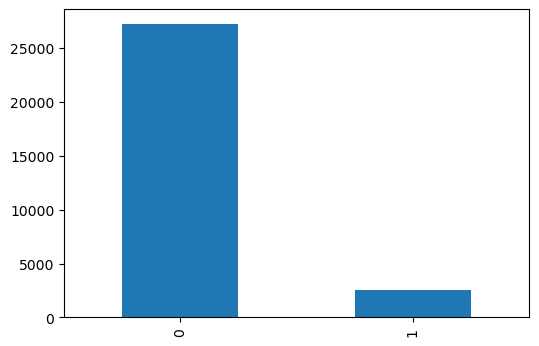

In [ ]:
#Plotting the churn variable
churn_data['target'].value_counts().plot.bar(figsize=(6,4))
plt.show()

**We can see the issue of Class Imbalance**

In [ ]:
#Collecting the columns having _9 in the name
Month9_col = [i for i in churn_data.columns if '_9' in i]
print(Month9_col)
print(len(Month9_col))

['arpu_9', 'onnet_mou_9', 'offnet_mou_9', 'roam_ic_mou_9', 'roam_og_mou_9', 'loc_og_t2t_mou_9', 'loc_og_t2m_mou_9', 'loc_og_t2f_mou_9', 'loc_og_t2c_mou_9', 'loc_og_mou_9', 'std_og_t2t_mou_9', 'std_og_t2m_mou_9', 'std_og_t2f_mou_9', 'std_og_mou_9', 'isd_og_mou_9', 'spl_og_mou_9', 'og_others_9', 'total_og_mou_9', 'loc_ic_t2t_mou_9', 'loc_ic_t2m_mou_9', 'loc_ic_t2f_mou_9', 'loc_ic_mou_9', 'std_ic_t2t_mou_9', 'std_ic_t2m_mou_9', 'std_ic_t2f_mou_9', 'std_ic_mou_9', 'total_ic_mou_9', 'spl_ic_mou_9', 'isd_ic_mou_9', 'ic_others_9', 'total_rech_num_9', 'total_rech_amt_9', 'max_rech_amt_9', 'last_day_rch_amt_9', 'vol_2g_mb_9', 'vol_3g_mb_9', 'monthly_2g_9', 'sachet_2g_9', 'monthly_3g_9', 'sachet_3g_9', 'vbc_3g_9']
41


In [ ]:
#Dropping _9 columns as directed in the problem statement
churn_data.drop(Month9_col,axis=1,inplace=True)
churn_data.shape

(29793, 127)

In [ ]:
#Collecting the columns having _6 in the name
Month6_col = [i for i in churn_data.columns if '_6' in i]
print(Month6_col)
print(len(Month6_col))

['arpu_6', 'onnet_mou_6', 'offnet_mou_6', 'roam_ic_mou_6', 'roam_og_mou_6', 'loc_og_t2t_mou_6', 'loc_og_t2m_mou_6', 'loc_og_t2f_mou_6', 'loc_og_t2c_mou_6', 'loc_og_mou_6', 'std_og_t2t_mou_6', 'std_og_t2m_mou_6', 'std_og_t2f_mou_6', 'std_og_mou_6', 'isd_og_mou_6', 'spl_og_mou_6', 'og_others_6', 'total_og_mou_6', 'loc_ic_t2t_mou_6', 'loc_ic_t2m_mou_6', 'loc_ic_t2f_mou_6', 'loc_ic_mou_6', 'std_ic_t2t_mou_6', 'std_ic_t2m_mou_6', 'std_ic_t2f_mou_6', 'std_ic_mou_6', 'total_ic_mou_6', 'spl_ic_mou_6', 'isd_ic_mou_6', 'ic_others_6', 'total_rech_num_6', 'total_rech_amt_6', 'max_rech_amt_6', 'last_day_rch_amt_6', 'vol_2g_mb_6', 'vol_3g_mb_6', 'monthly_2g_6', 'sachet_2g_6', 'monthly_3g_6', 'sachet_3g_6', 'vbc_3g_6', 'avg_rech_amt_6_7']
42


In [ ]:
#Collecting the columns having _7 in the name
Month7_col = [i for i in churn_data.columns if '_7' in i]
print(Month7_col)
print(len(Month7_col))

['arpu_7', 'onnet_mou_7', 'offnet_mou_7', 'roam_ic_mou_7', 'roam_og_mou_7', 'loc_og_t2t_mou_7', 'loc_og_t2m_mou_7', 'loc_og_t2f_mou_7', 'loc_og_t2c_mou_7', 'loc_og_mou_7', 'std_og_t2t_mou_7', 'std_og_t2m_mou_7', 'std_og_t2f_mou_7', 'std_og_mou_7', 'isd_og_mou_7', 'spl_og_mou_7', 'og_others_7', 'total_og_mou_7', 'loc_ic_t2t_mou_7', 'loc_ic_t2m_mou_7', 'loc_ic_t2f_mou_7', 'loc_ic_mou_7', 'std_ic_t2t_mou_7', 'std_ic_t2m_mou_7', 'std_ic_t2f_mou_7', 'std_ic_mou_7', 'total_ic_mou_7', 'spl_ic_mou_7', 'isd_ic_mou_7', 'ic_others_7', 'total_rech_num_7', 'total_rech_amt_7', 'max_rech_amt_7', 'last_day_rch_amt_7', 'vol_2g_mb_7', 'vol_3g_mb_7', 'monthly_2g_7', 'sachet_2g_7', 'monthly_3g_7', 'sachet_3g_7', 'vbc_3g_7', 'avg_rech_amt_6_7']
42


In [ ]:
#Collecting the columns having _8 in the name
Month8_col = [i for i in churn_data.columns if '_8' in i]
print(Month8_col)
print(len(Month8_col))

['arpu_8', 'onnet_mou_8', 'offnet_mou_8', 'roam_ic_mou_8', 'roam_og_mou_8', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_8', 'loc_og_t2c_mou_8', 'loc_og_mou_8', 'std_og_t2t_mou_8', 'std_og_t2m_mou_8', 'std_og_t2f_mou_8', 'std_og_mou_8', 'isd_og_mou_8', 'spl_og_mou_8', 'og_others_8', 'total_og_mou_8', 'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_8', 'loc_ic_t2f_mou_8', 'loc_ic_mou_8', 'std_ic_t2t_mou_8', 'std_ic_t2m_mou_8', 'std_ic_t2f_mou_8', 'std_ic_mou_8', 'total_ic_mou_8', 'spl_ic_mou_8', 'isd_ic_mou_8', 'ic_others_8', 'total_rech_num_8', 'total_rech_amt_8', 'max_rech_amt_8', 'last_day_rch_amt_8', 'vol_2g_mb_8', 'vol_3g_mb_8', 'monthly_2g_8', 'sachet_2g_8', 'monthly_3g_8', 'sachet_3g_8', 'vbc_3g_8']
41


#### Outlier Detection

In [ ]:
#Convert these columns into object datatype
churn_data['mobile_number'] = churn_data['mobile_number'].astype(object)
churn_data['target'] = churn_data['target'].astype(object)

In [ ]:
#Getting the information
churn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29793 entries, 0 to 29792
Columns: 127 entries, mobile_number to target
dtypes: float64(100), int64(25), object(2)
memory usage: 28.9+ MB


In [ ]:
#Collecting all the int type columns and check for outliers
outlier_cols = churn_data.select_dtypes(include=['float64','int64']).columns
outlier_cols

Index(['arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7',
       'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8',
       'roam_ic_mou_6',
       ...
       'monthly_3g_7', 'monthly_3g_8', 'sachet_3g_6', 'sachet_3g_7',
       'sachet_3g_8', 'aon', 'vbc_3g_8', 'vbc_3g_7', 'vbc_3g_6',
       'avg_rech_amt_6_7'],
      dtype='object', length=125)

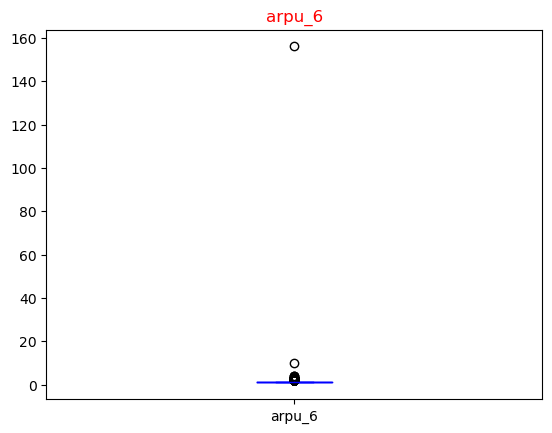

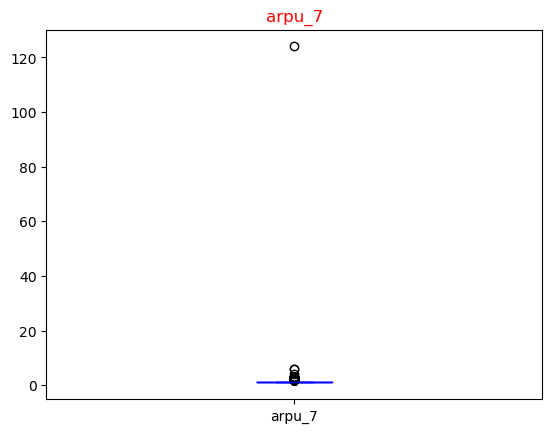

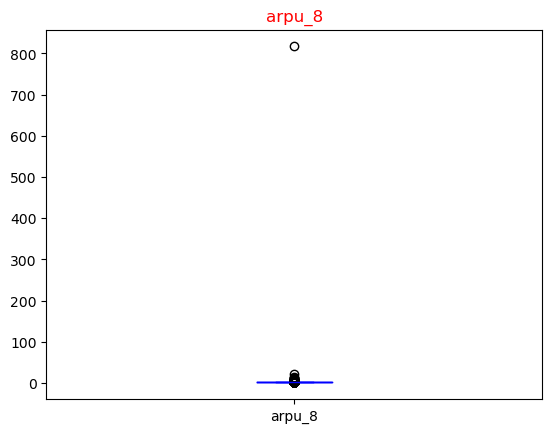

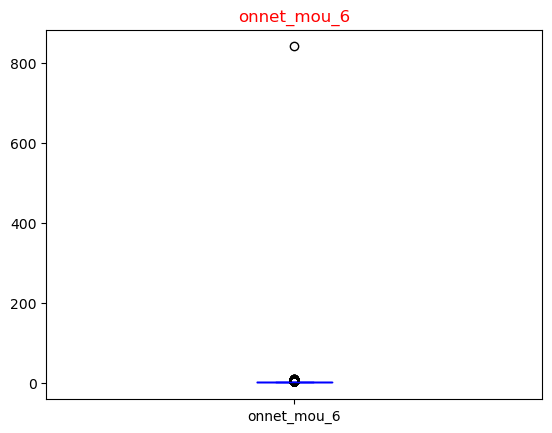

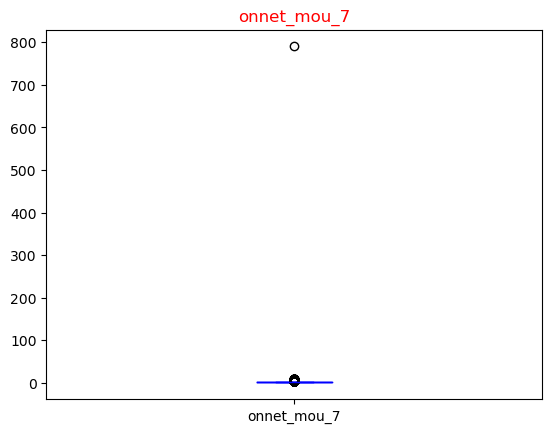

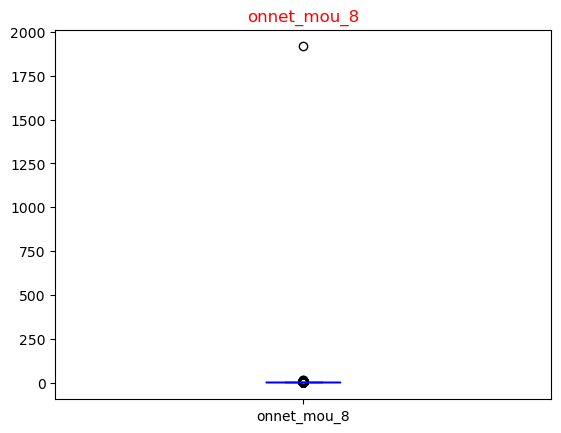

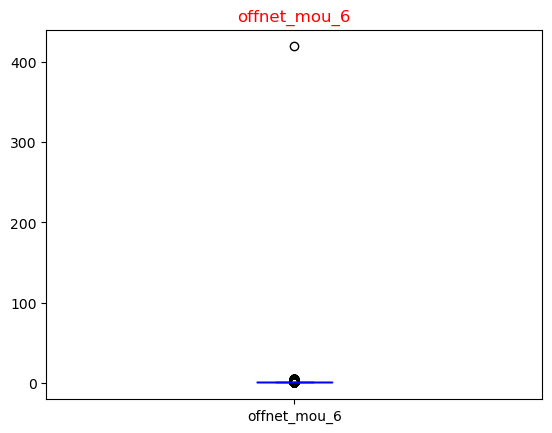

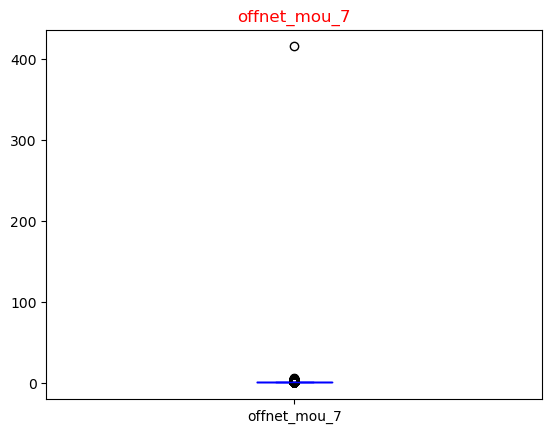

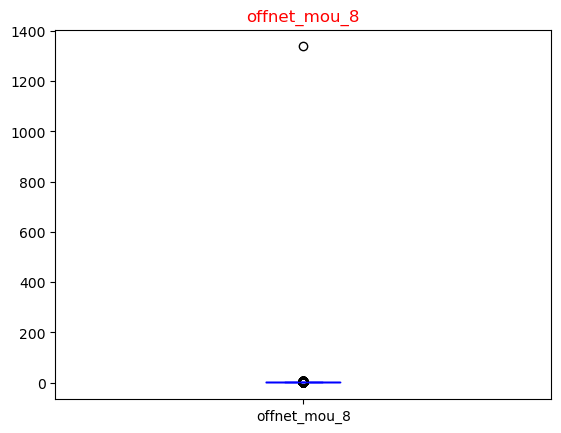

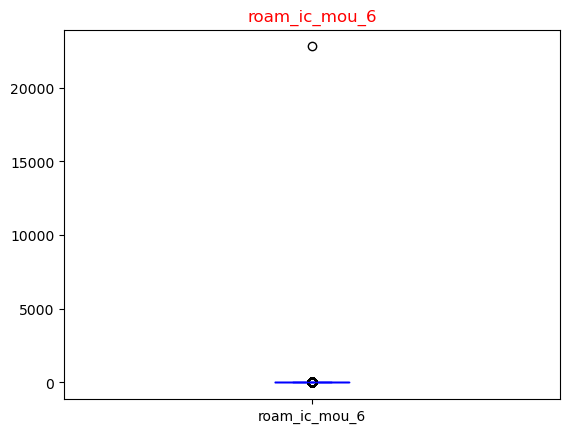

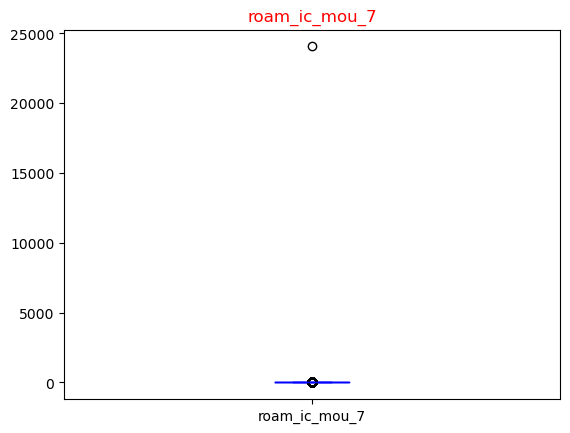

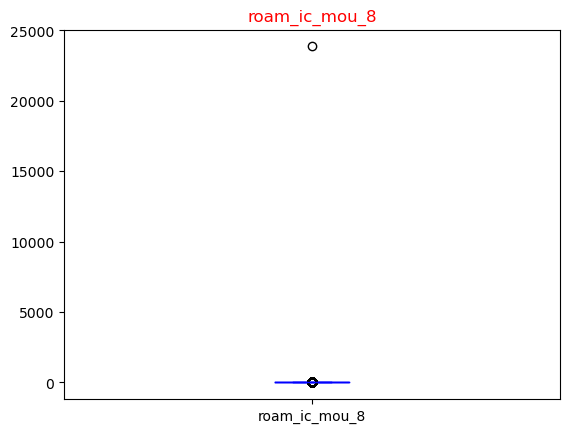

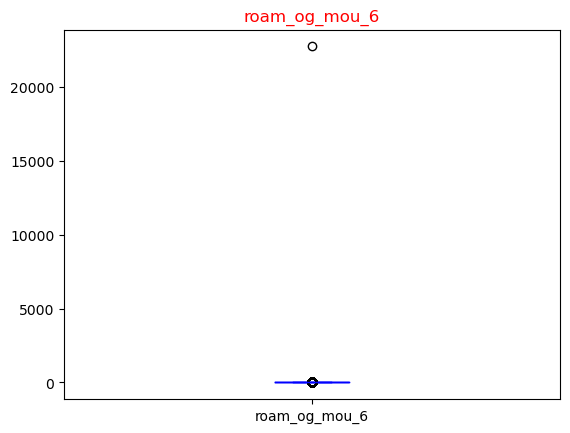

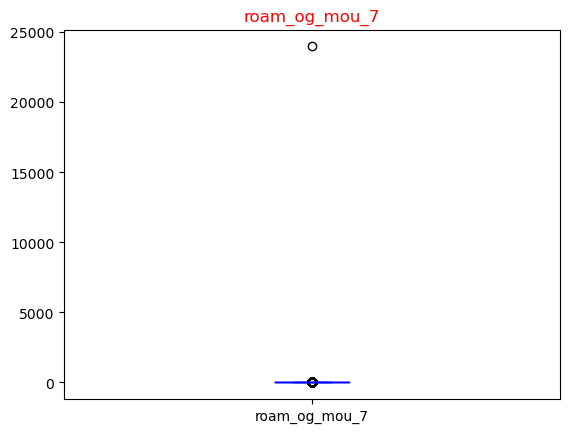

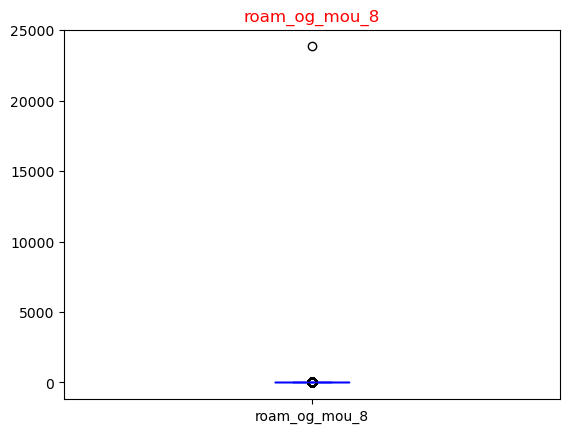

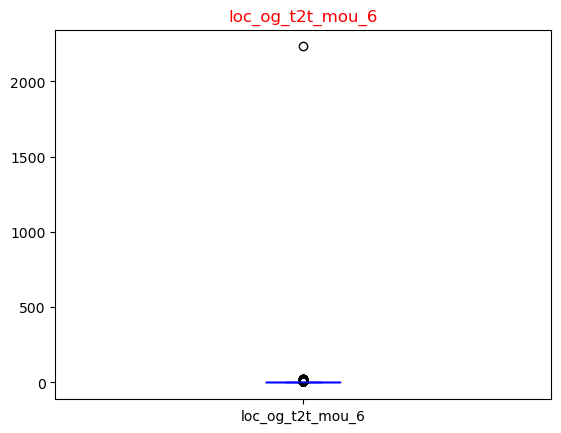

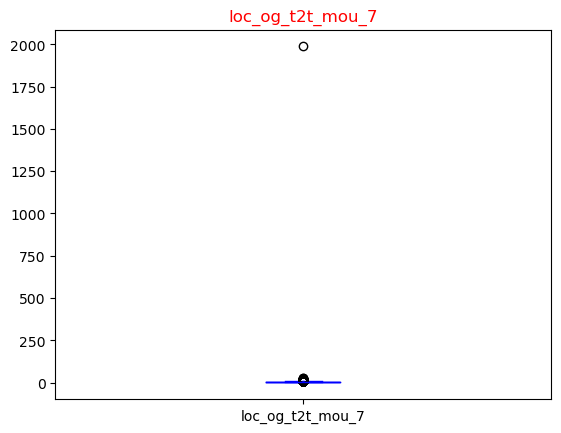

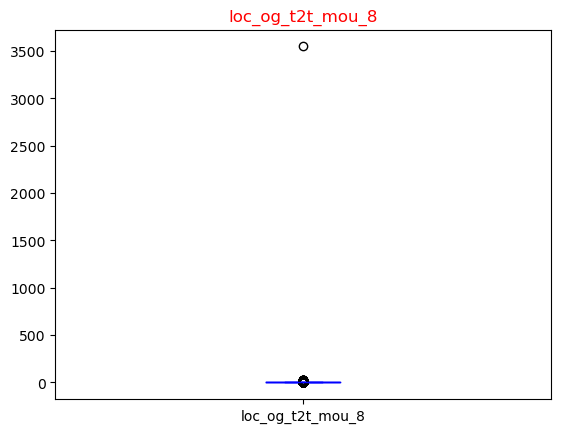

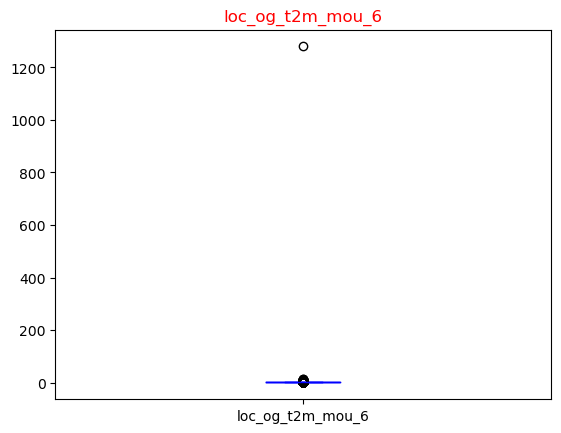

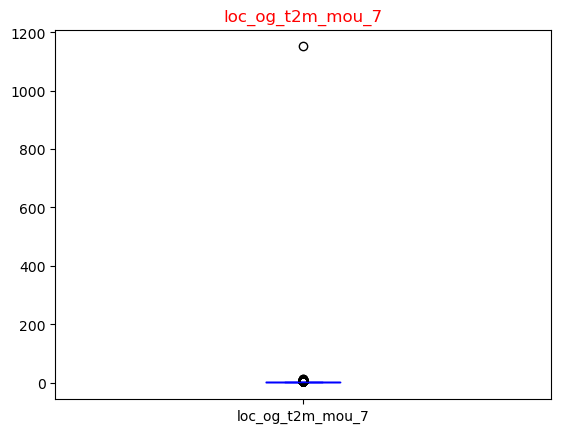

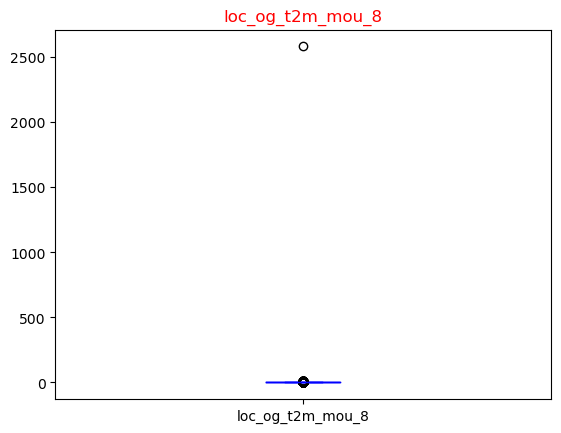

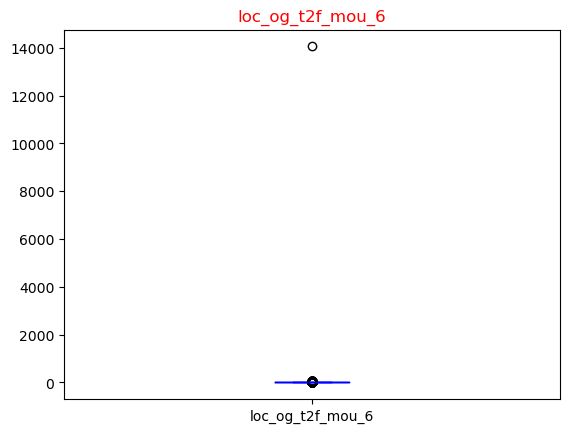

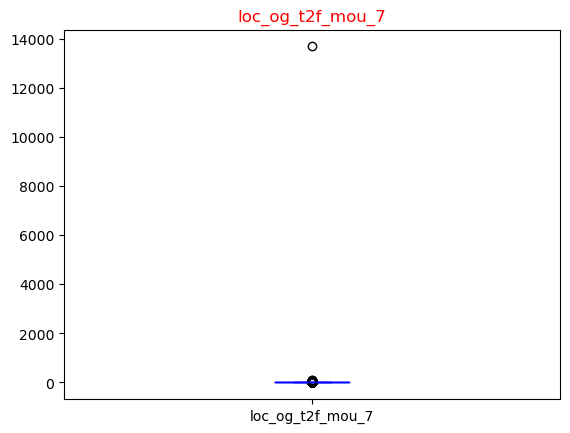

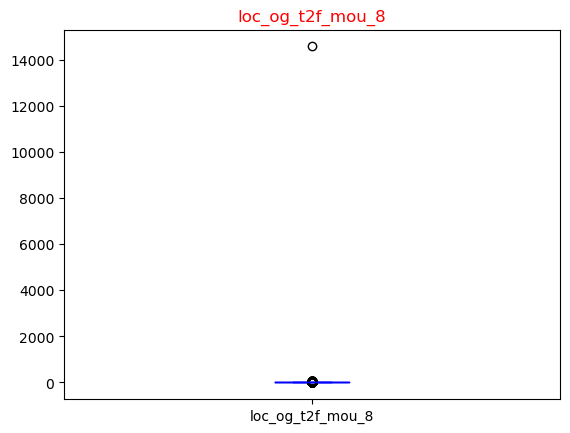

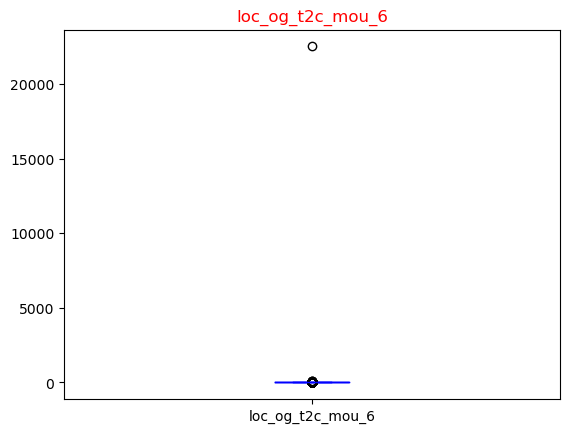

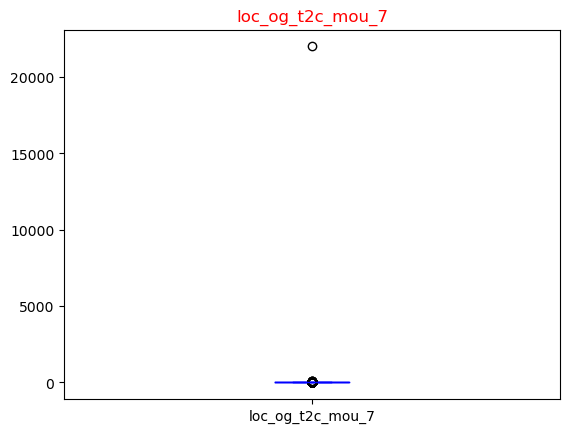

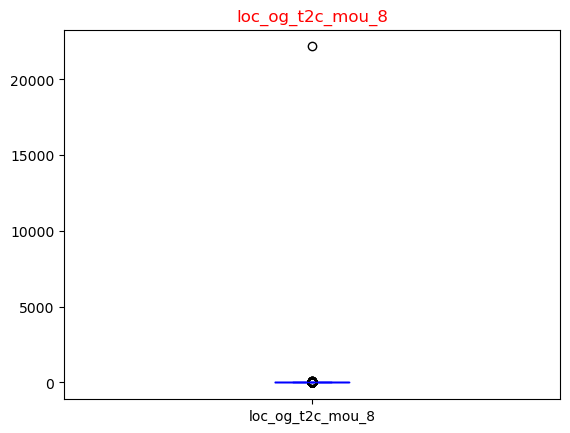

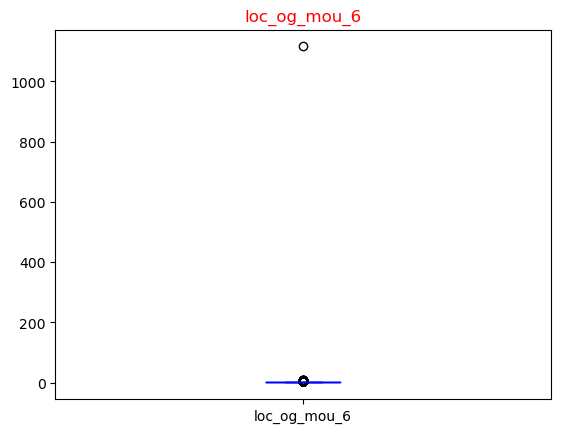

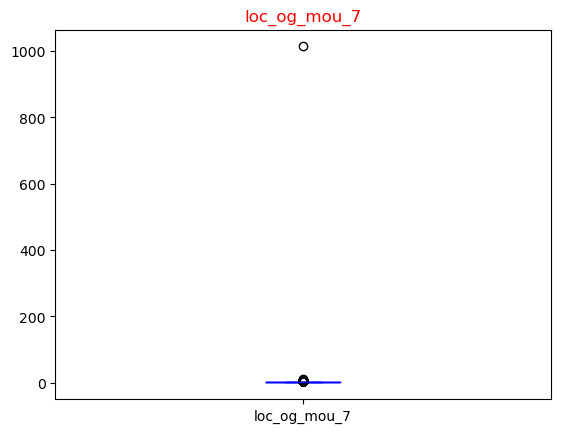

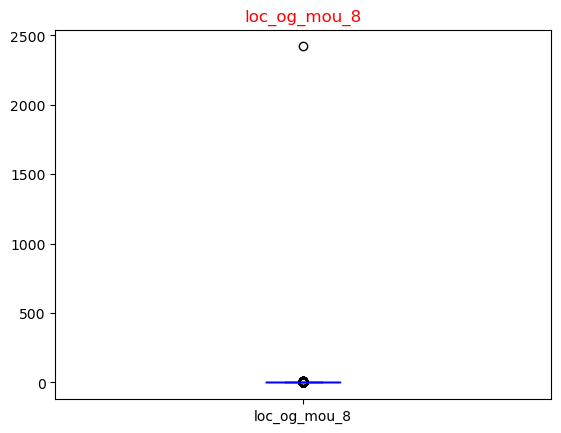

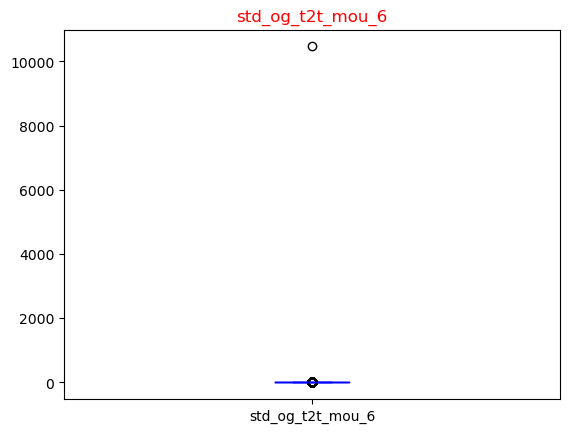

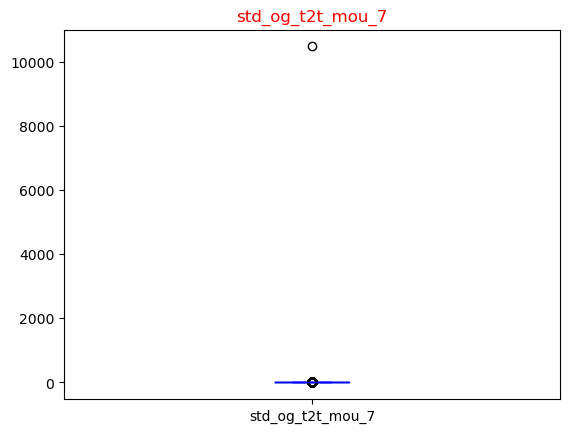

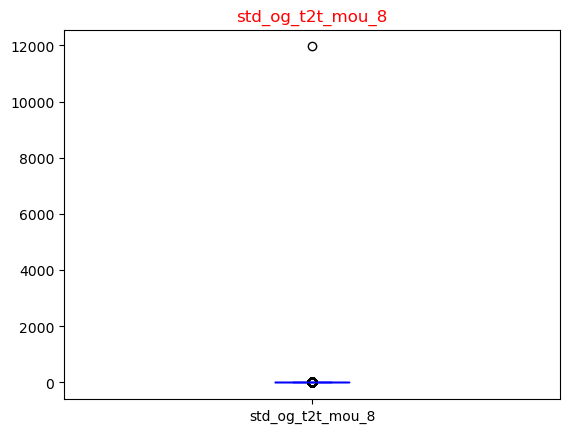

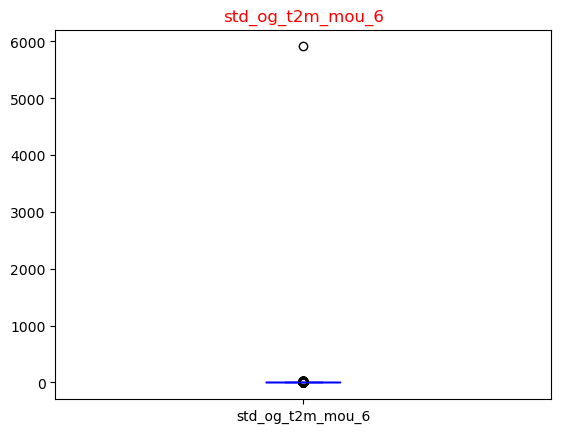

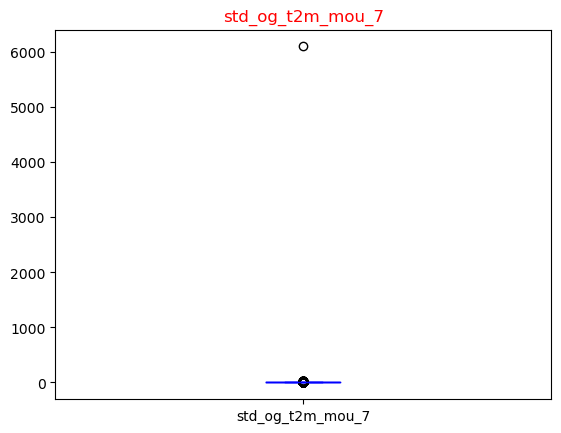

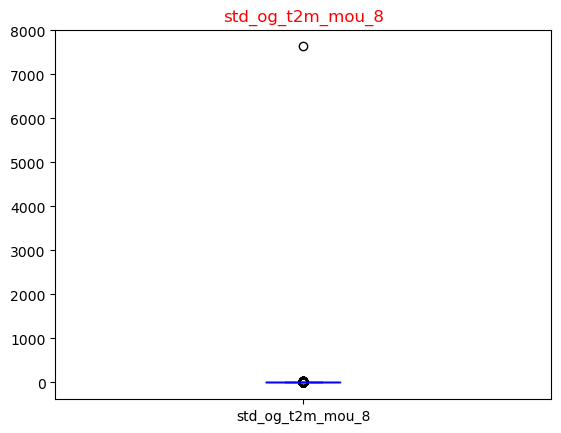

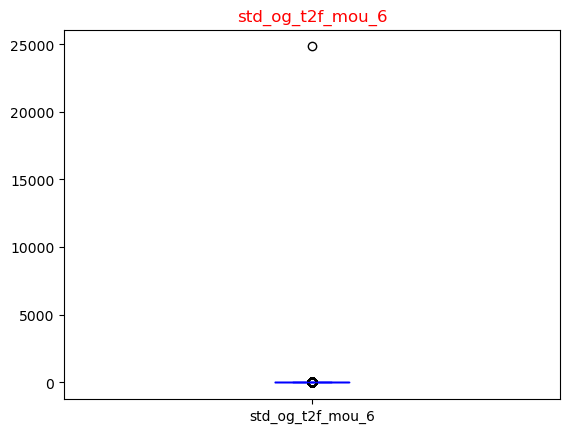

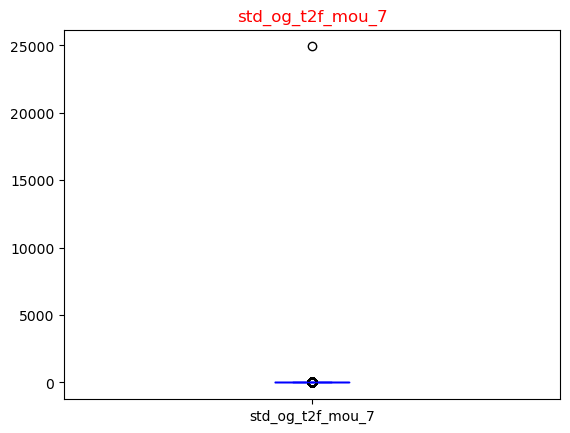

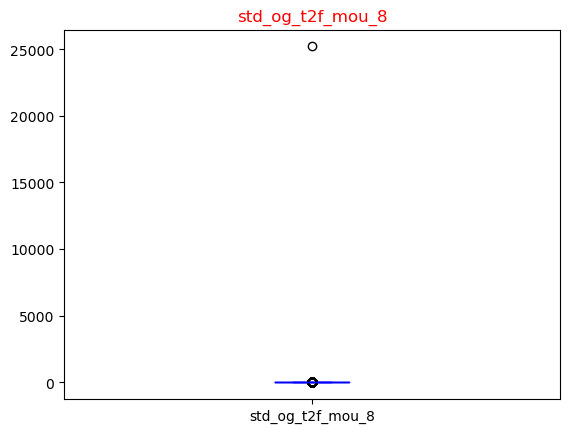

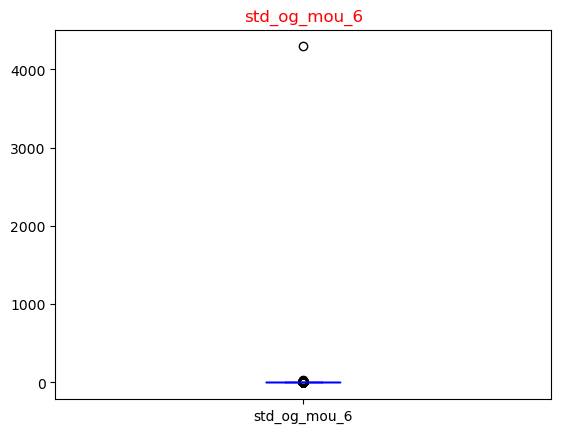

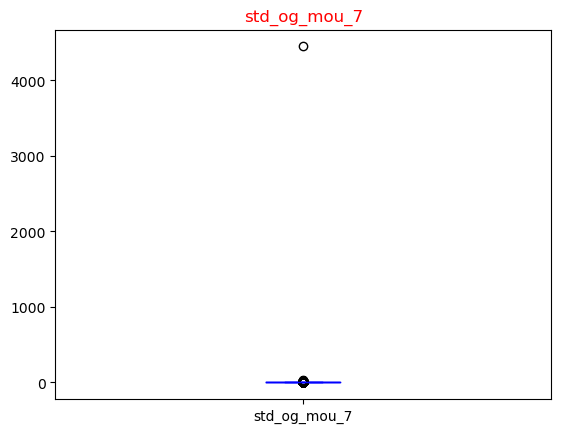

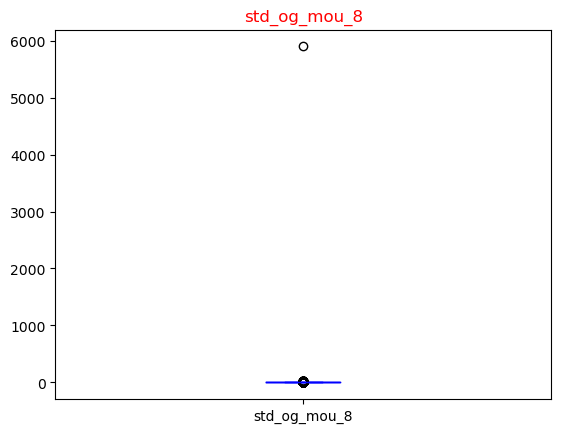

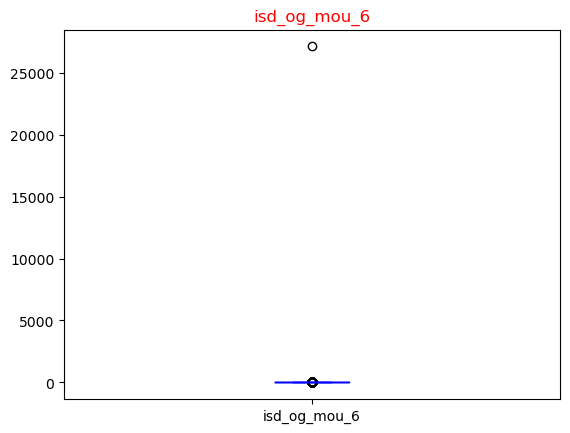

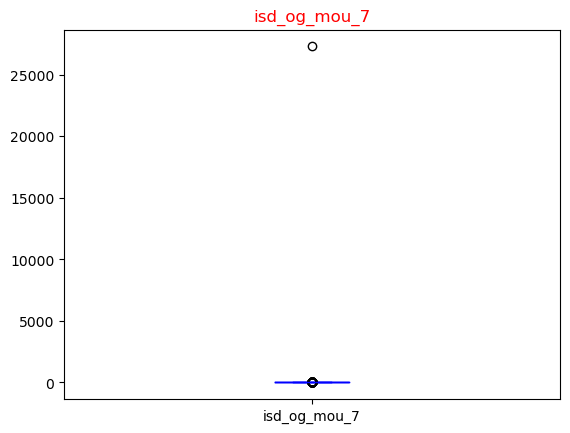

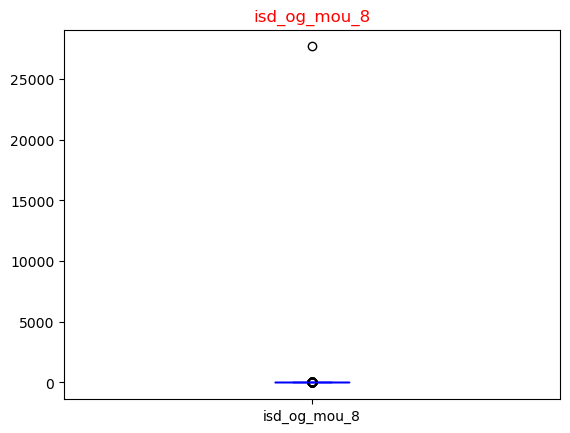

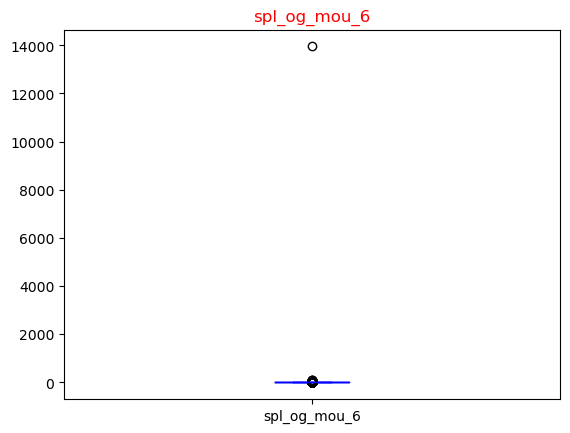

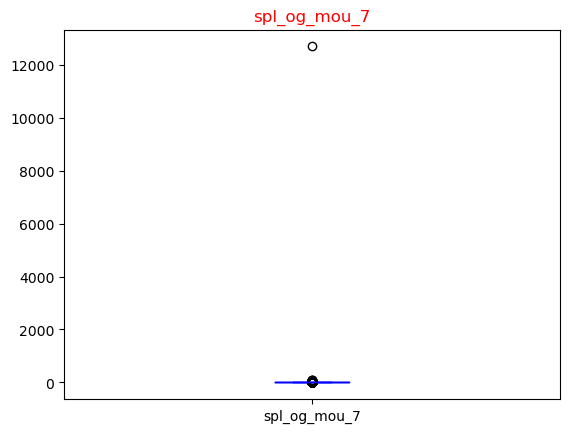

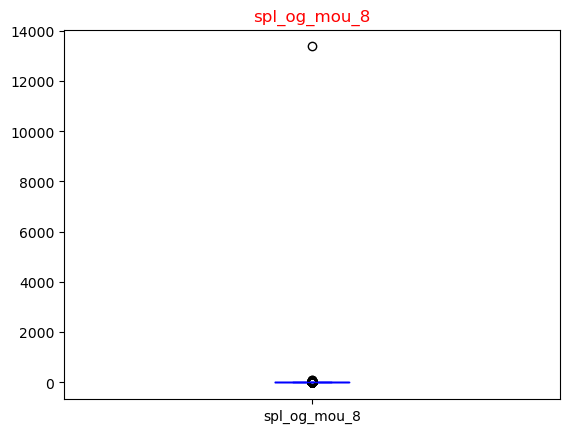

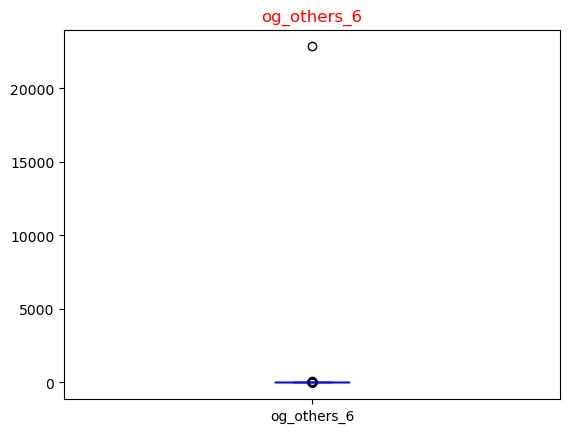

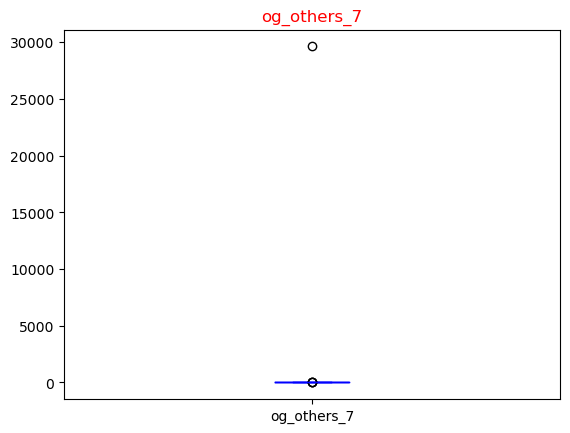

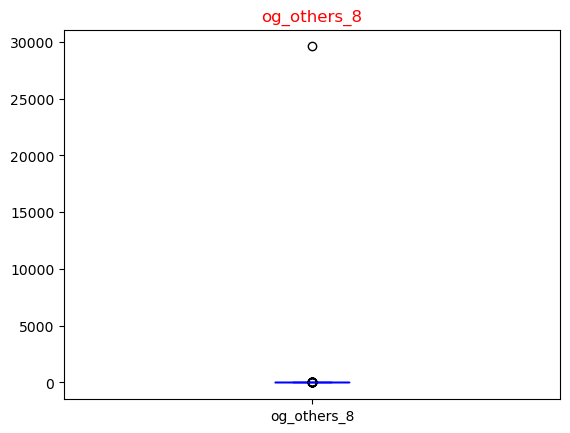

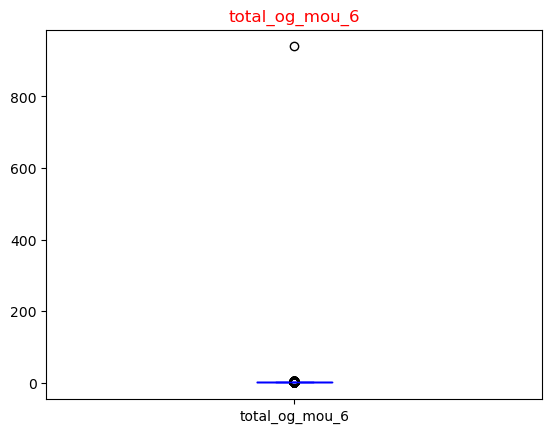

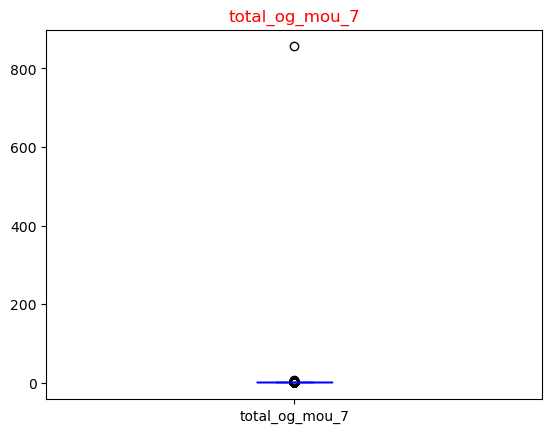

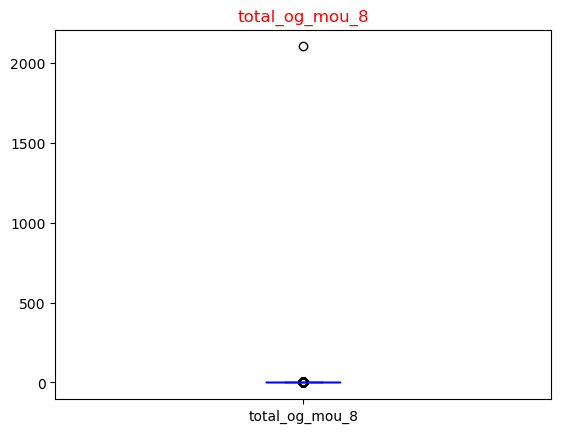

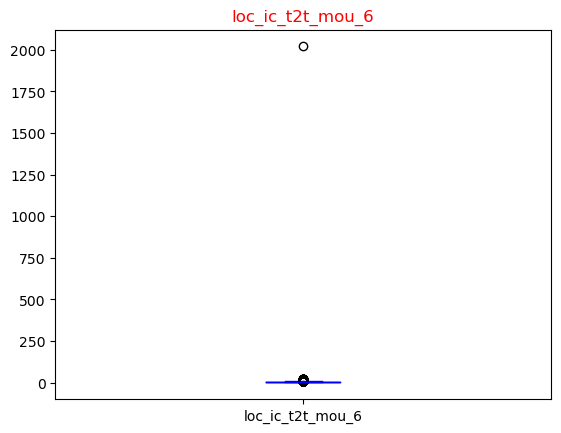

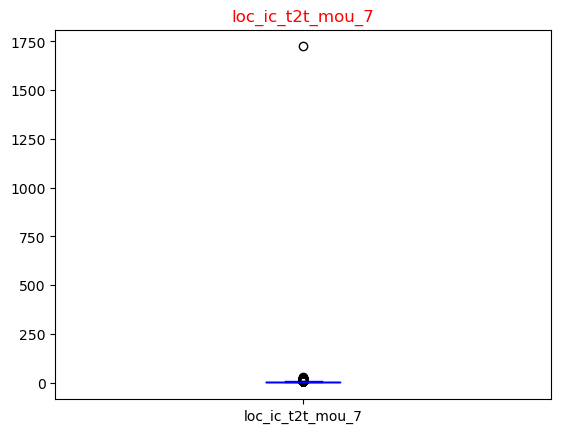

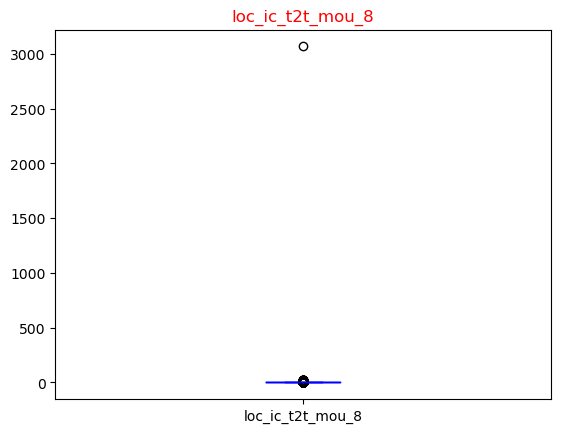

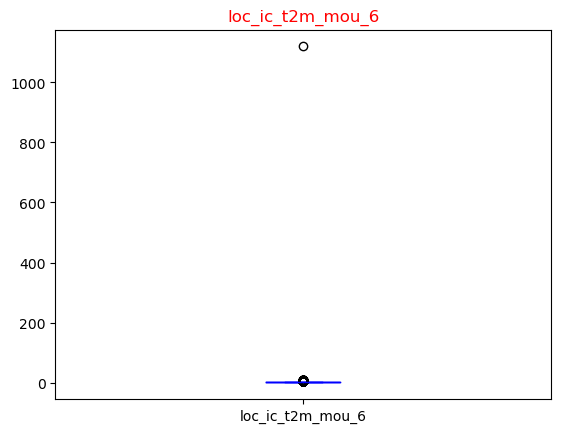

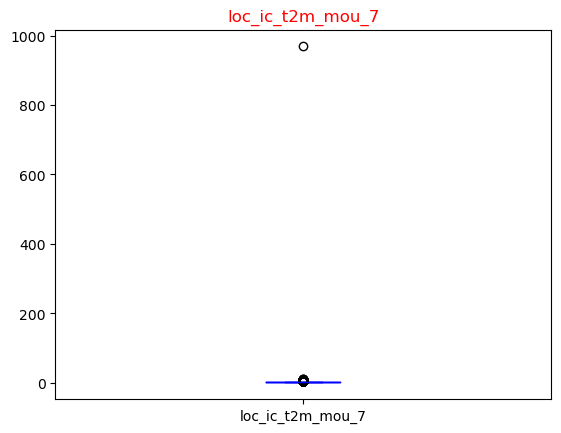

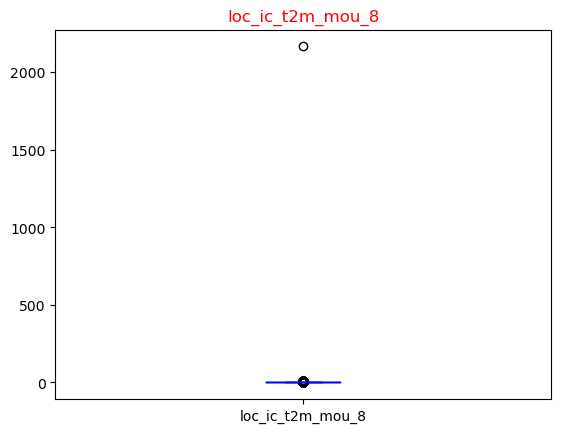

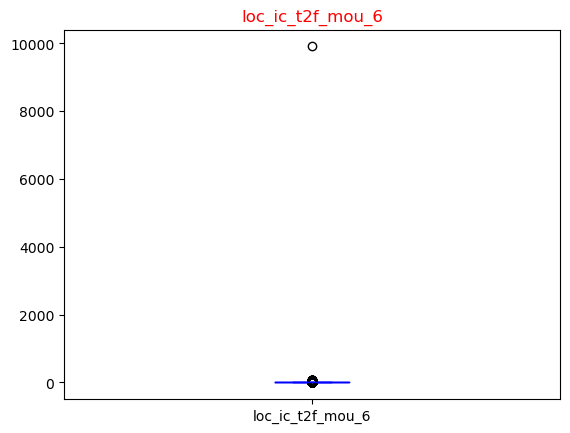

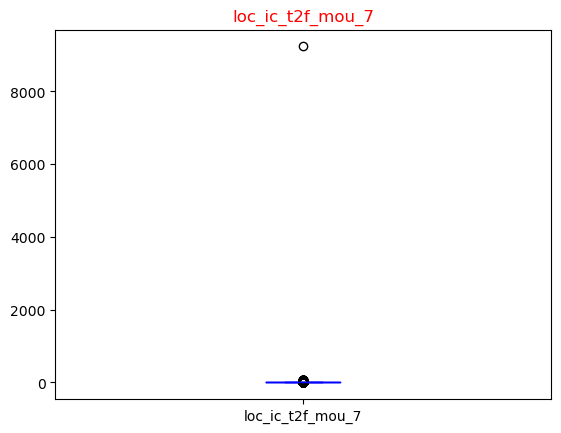

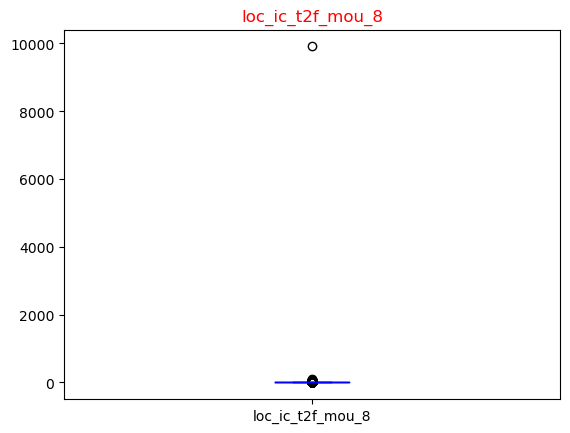

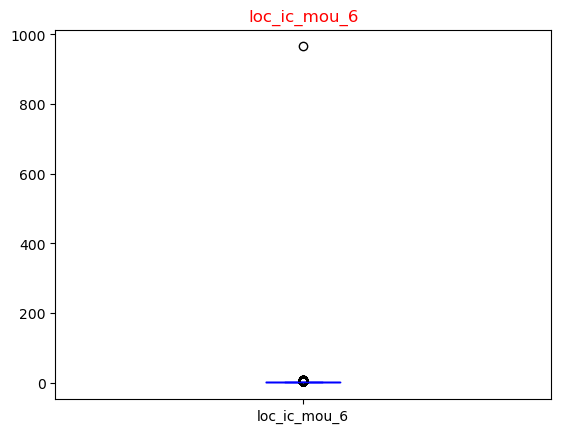

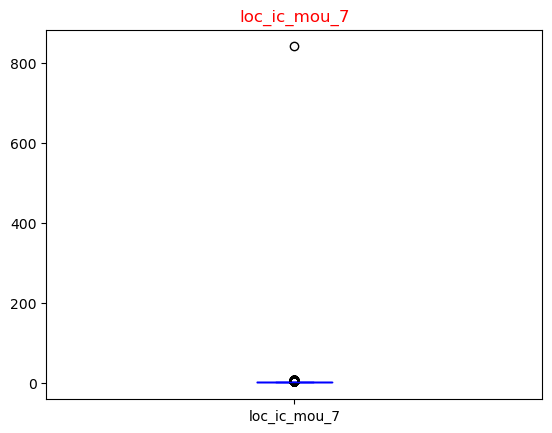

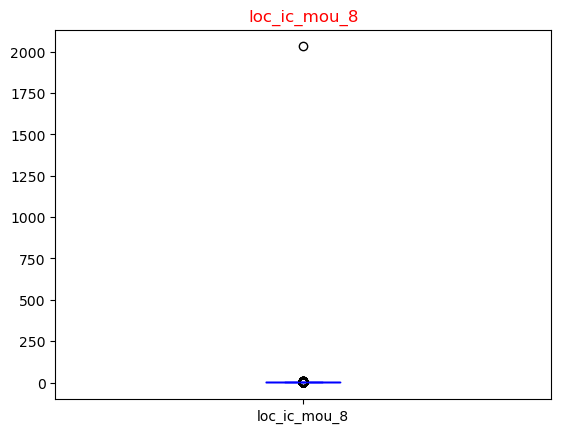

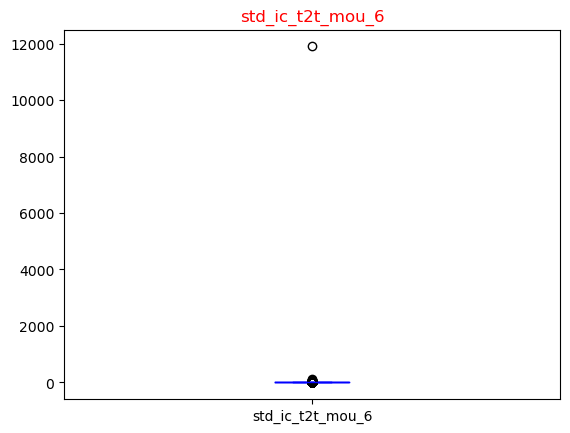

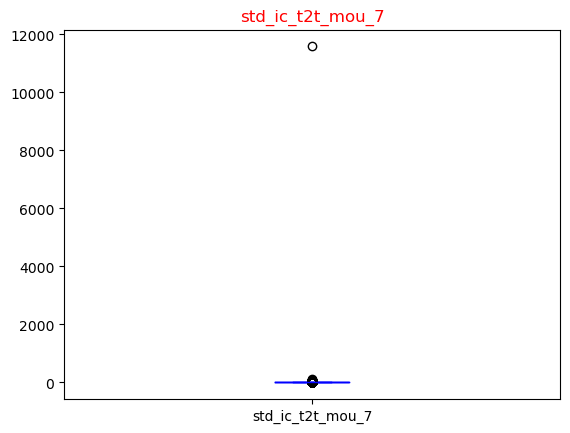

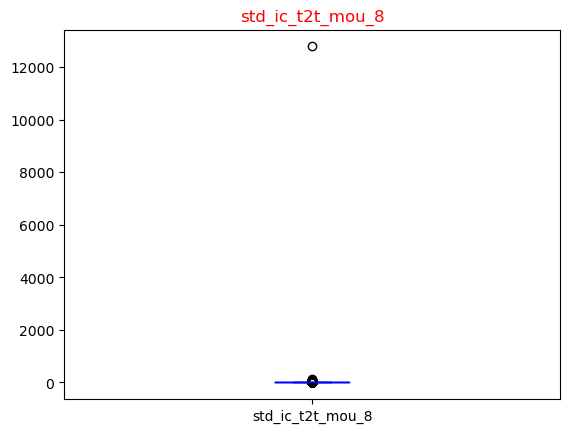

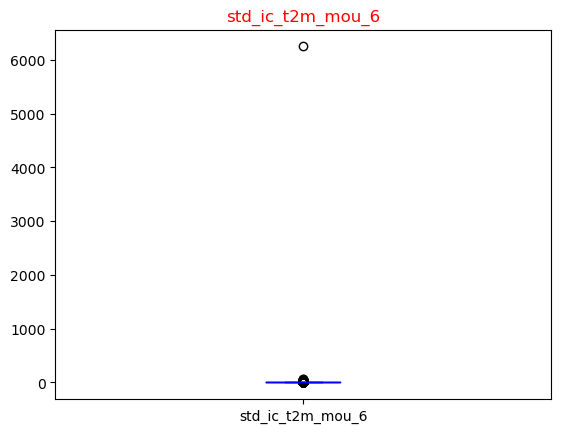

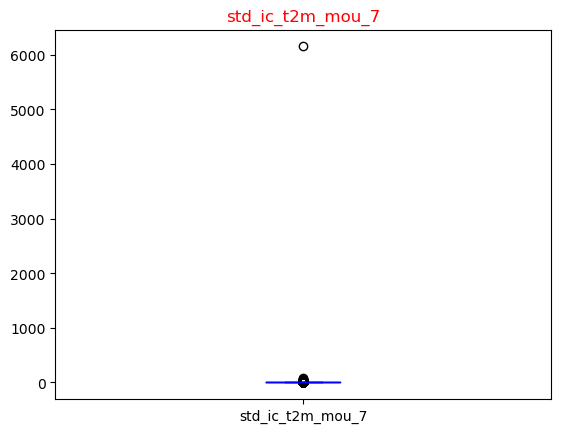

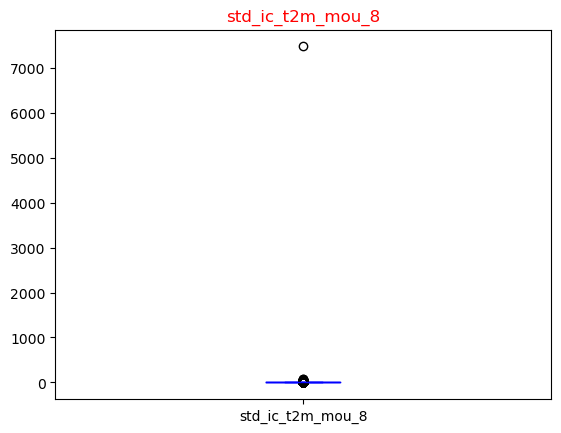

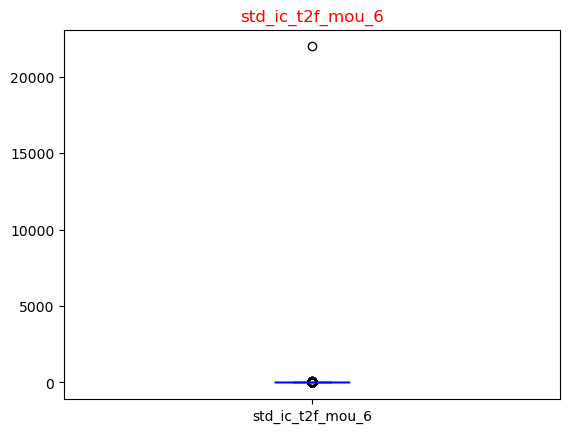

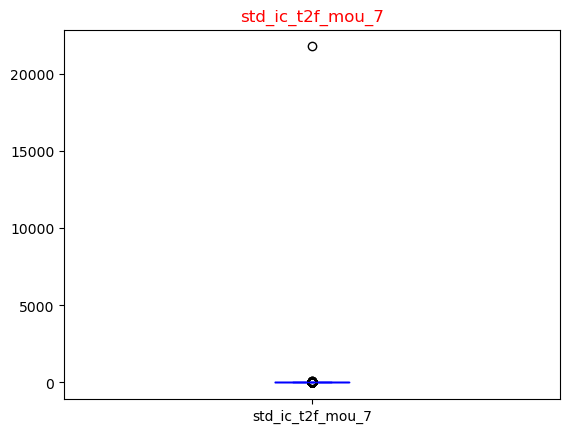

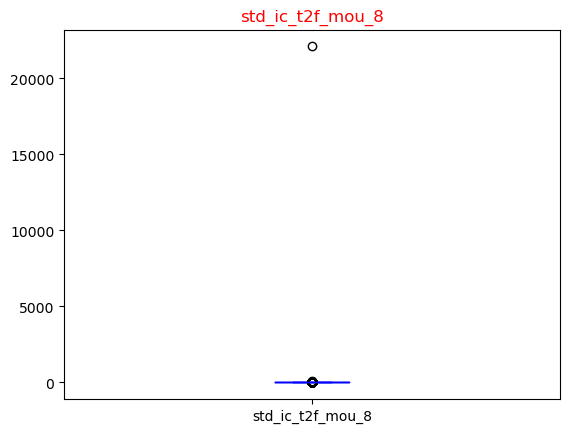

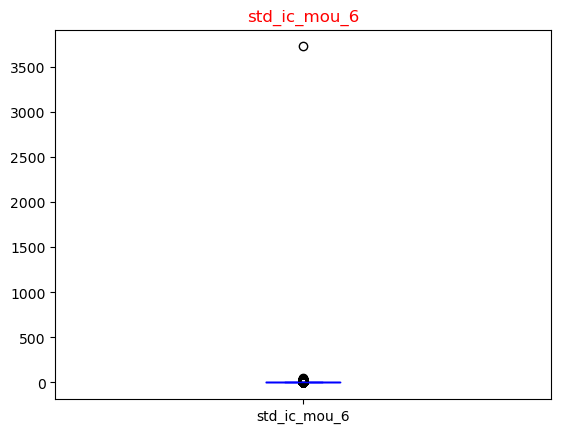

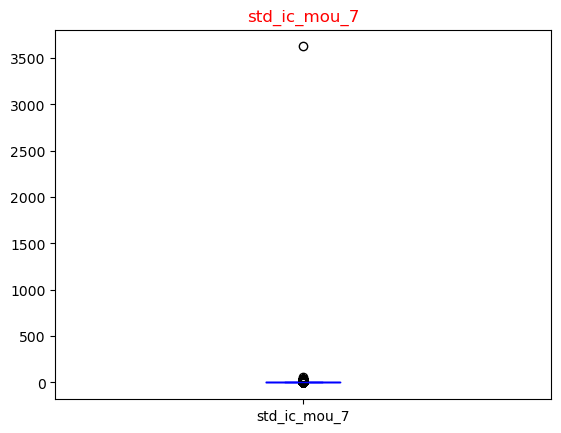

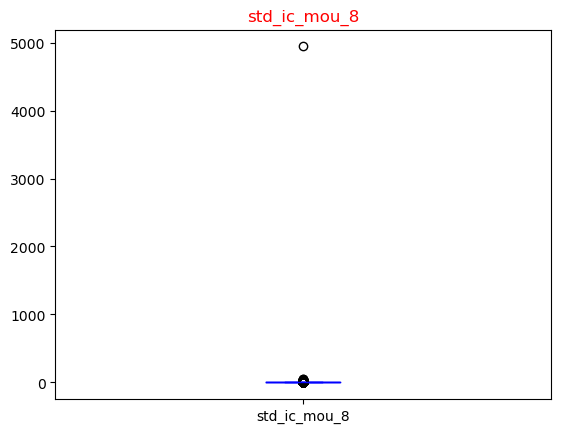

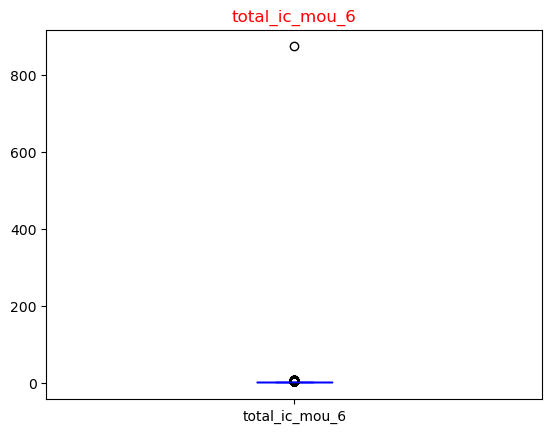

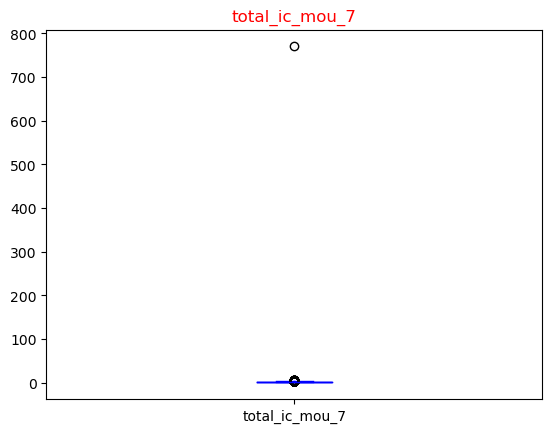

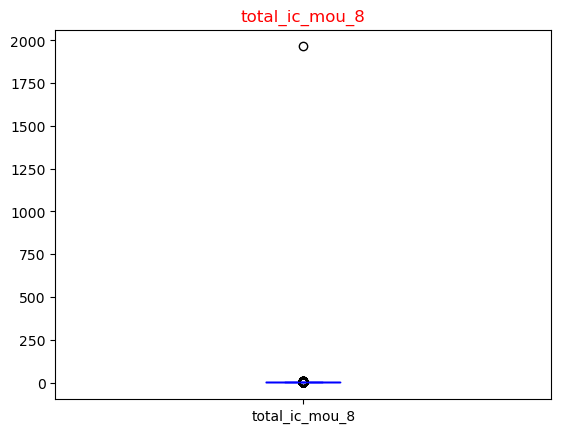

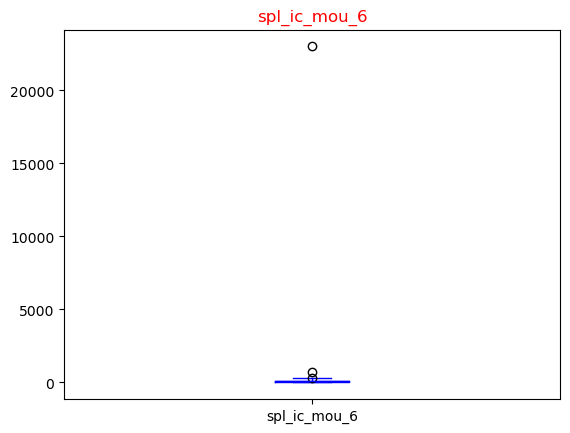

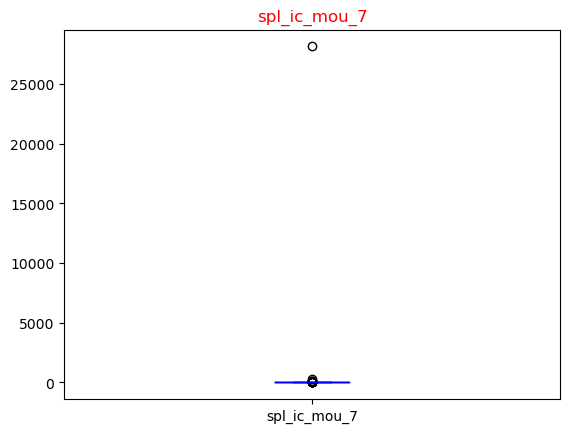

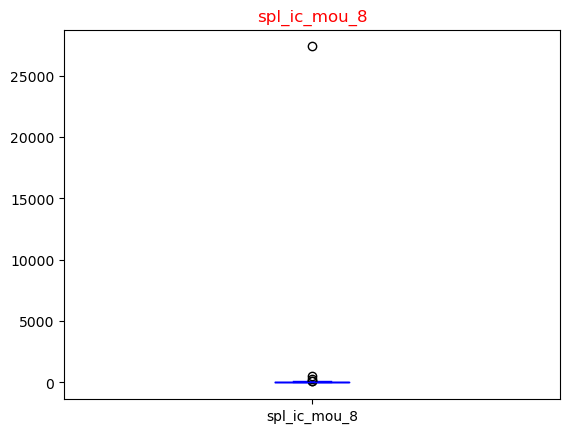

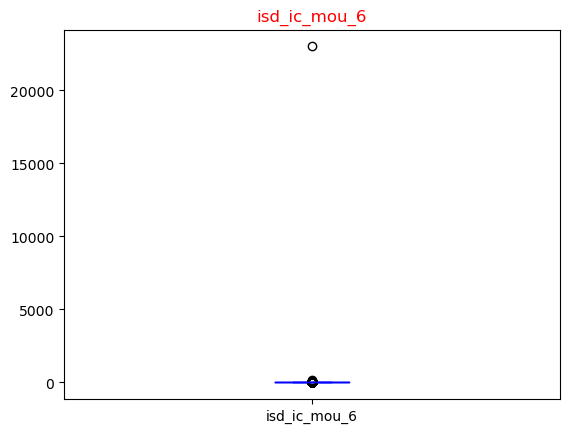

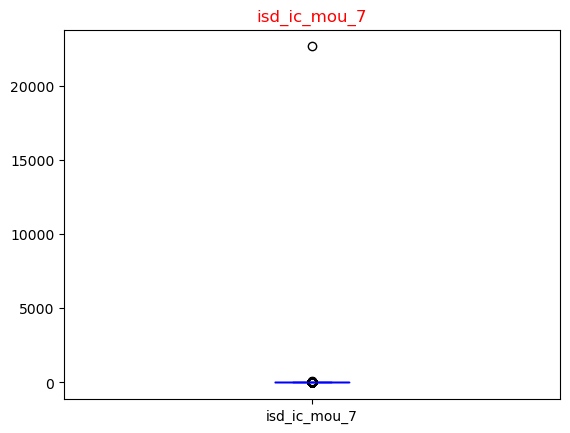

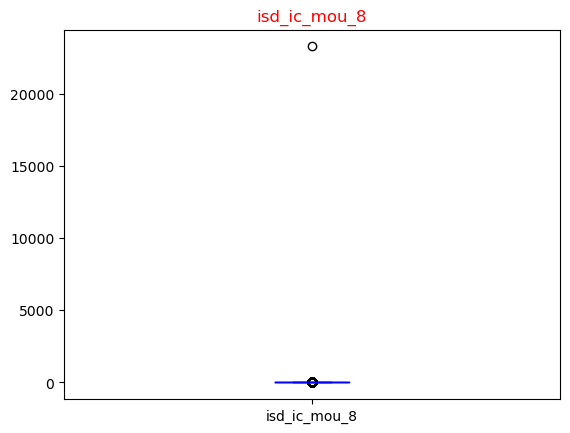

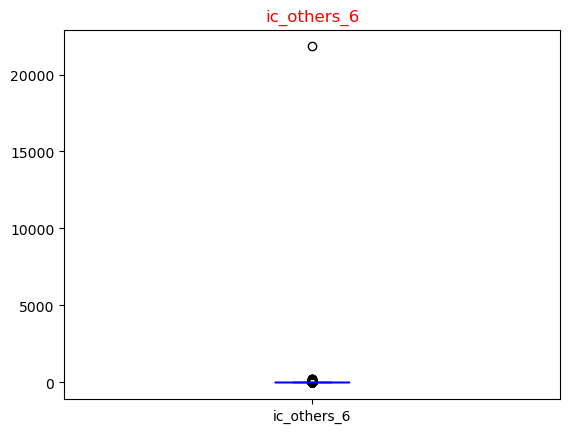

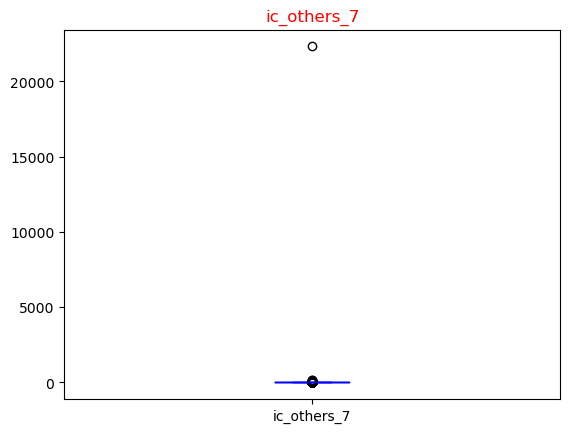

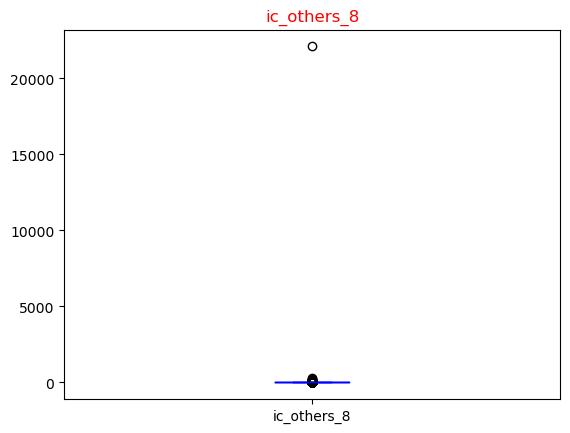

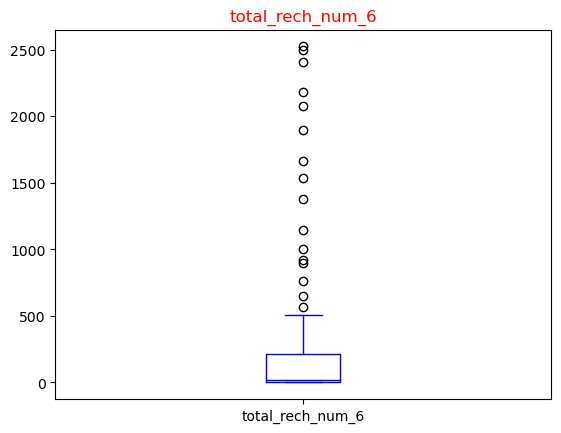

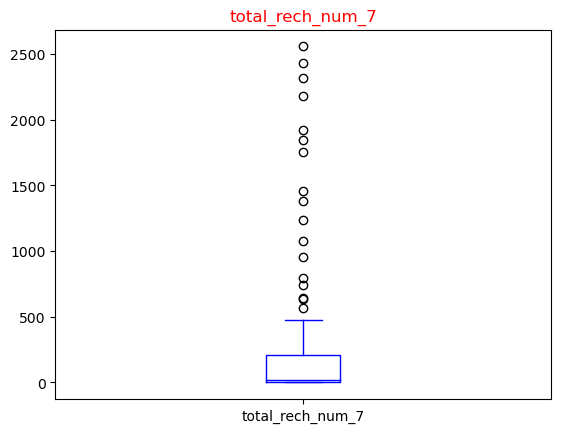

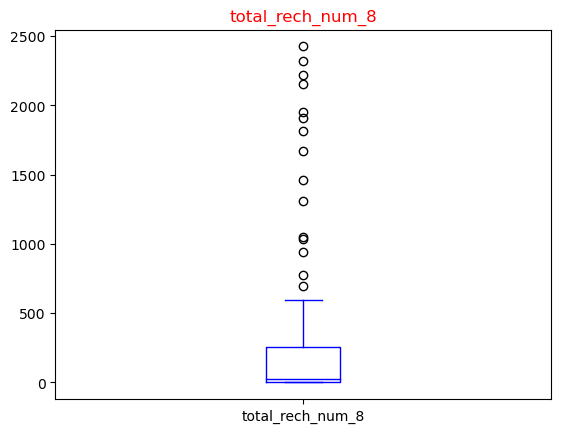

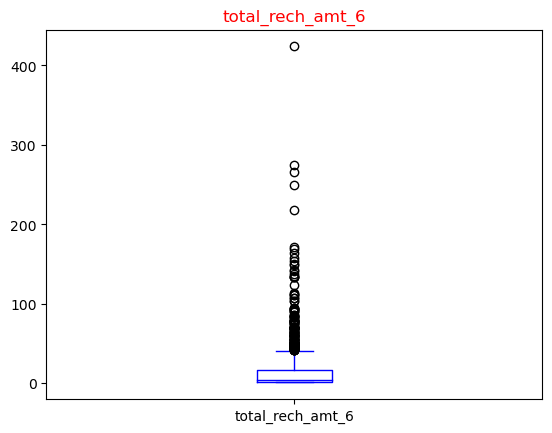

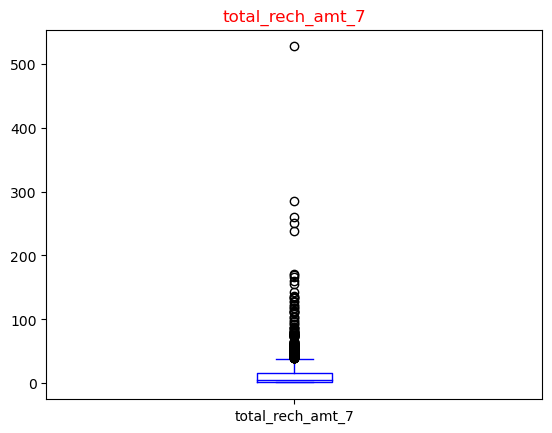

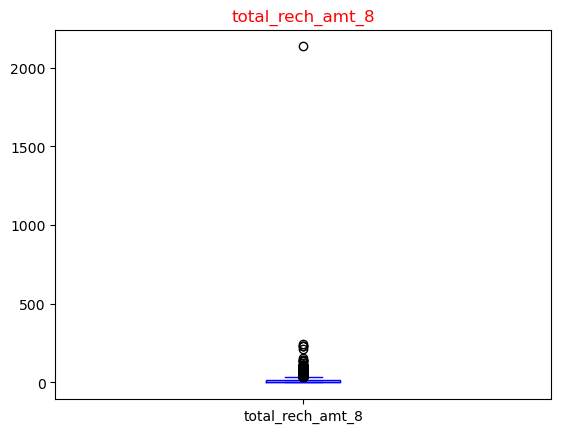

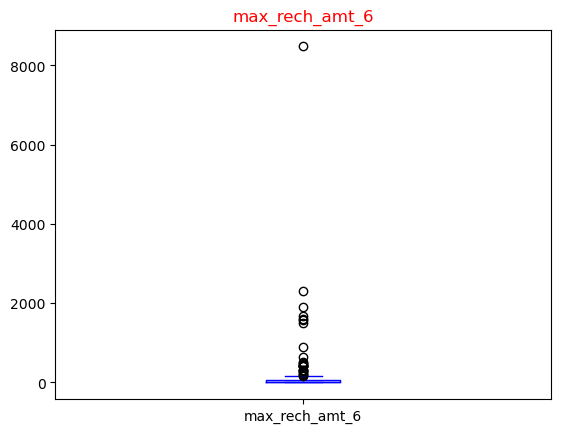

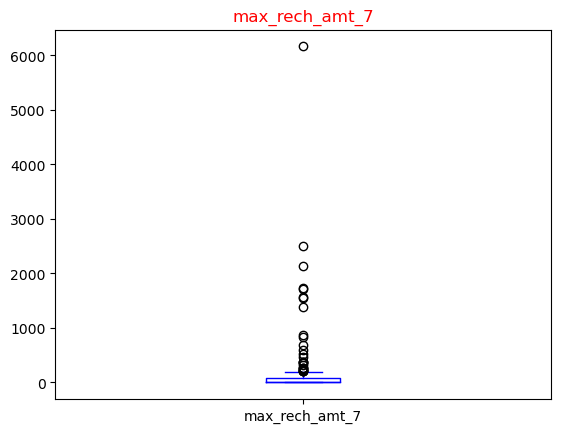

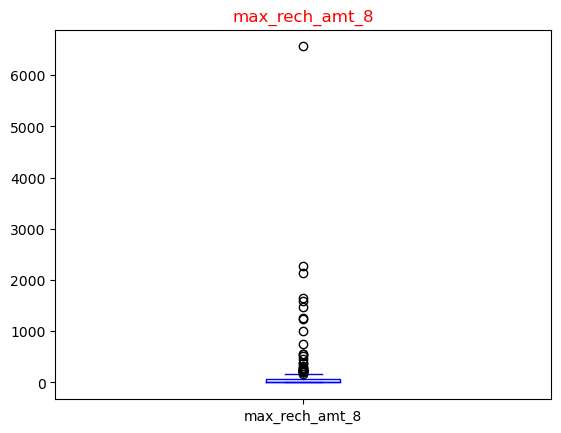

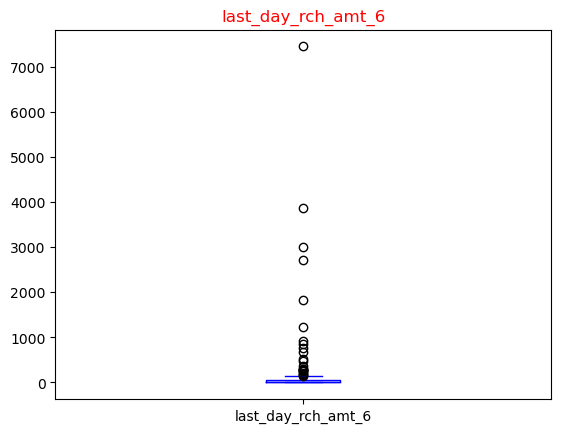

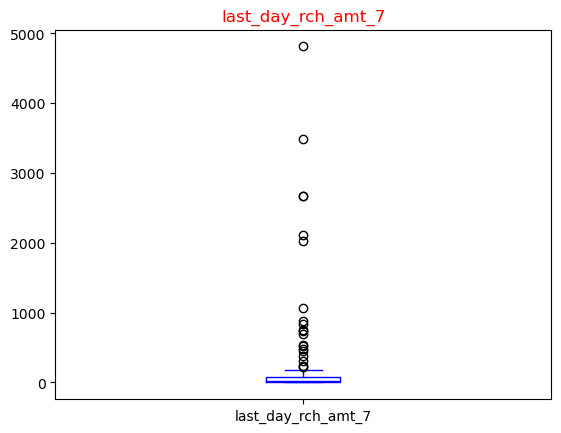

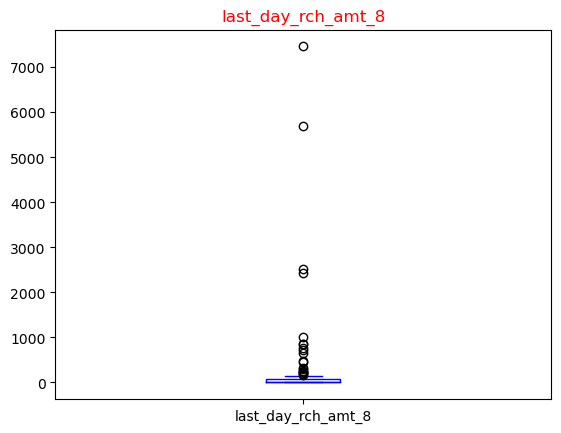

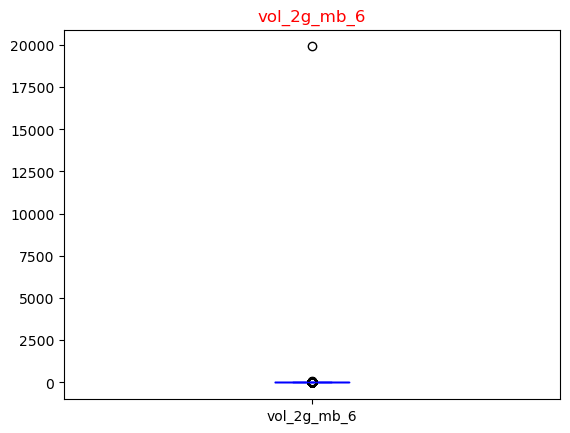

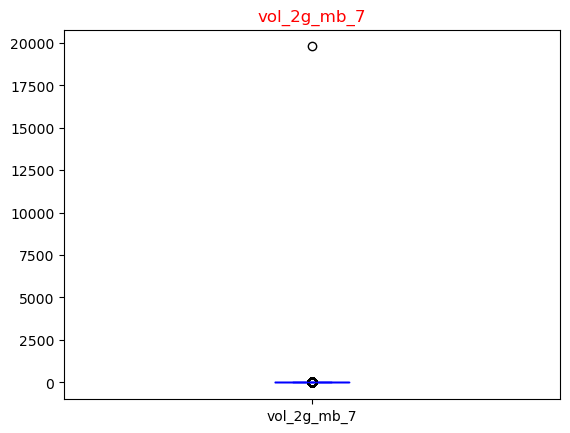

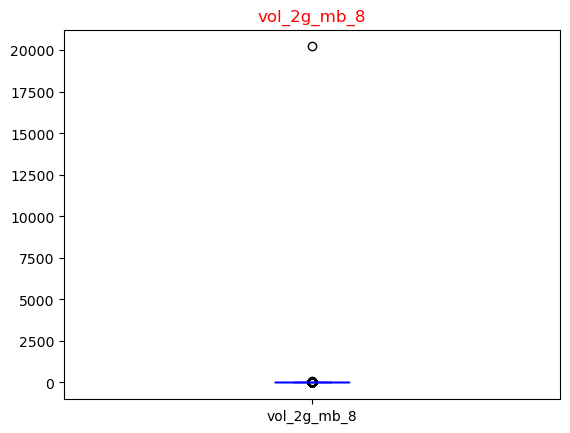

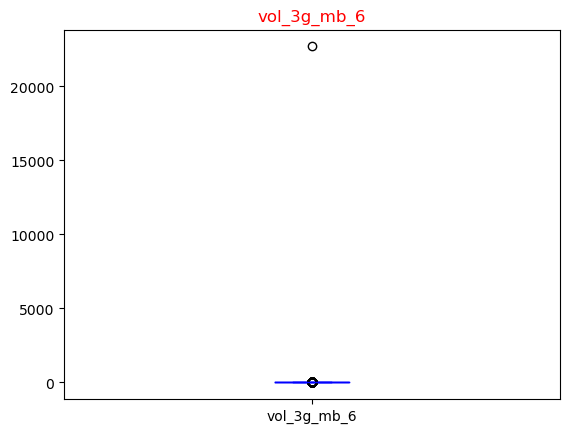

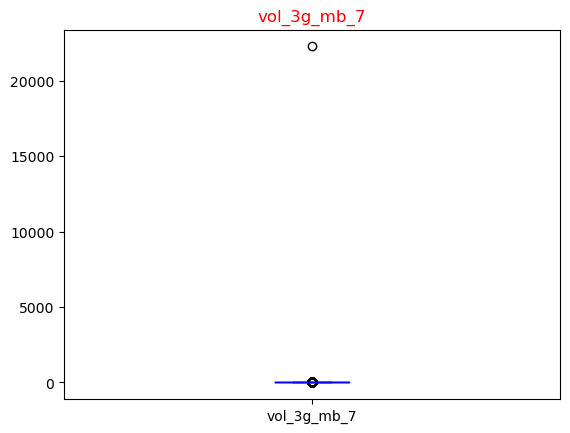

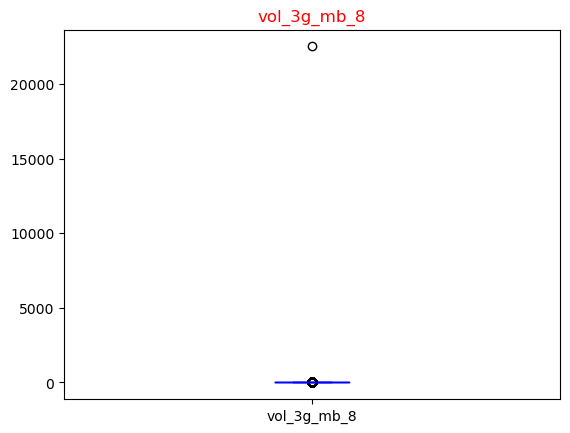

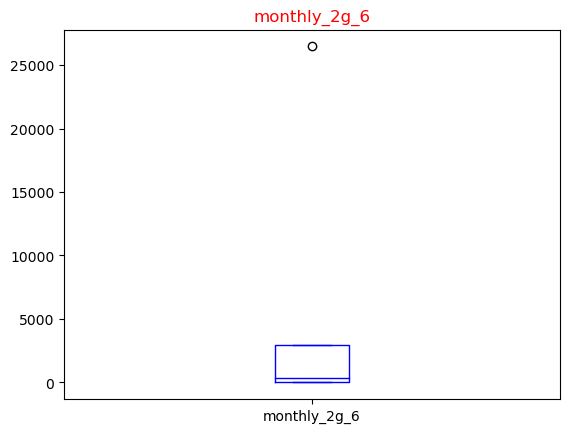

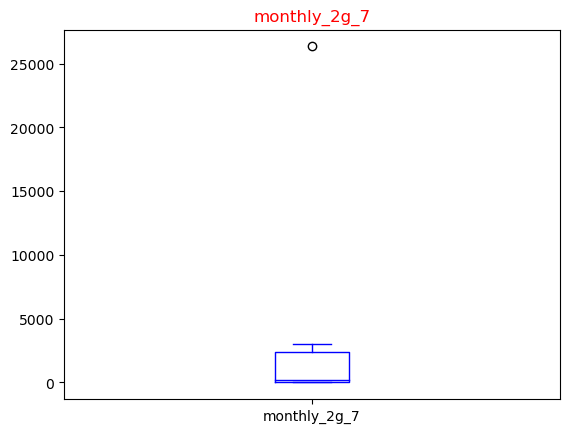

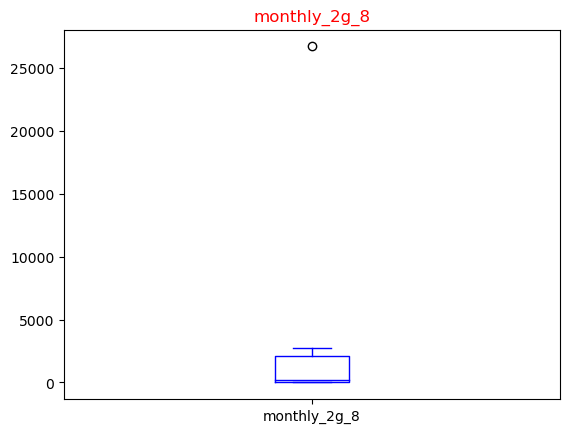

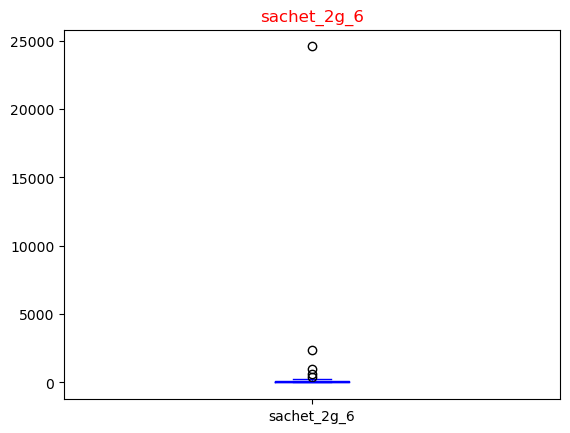

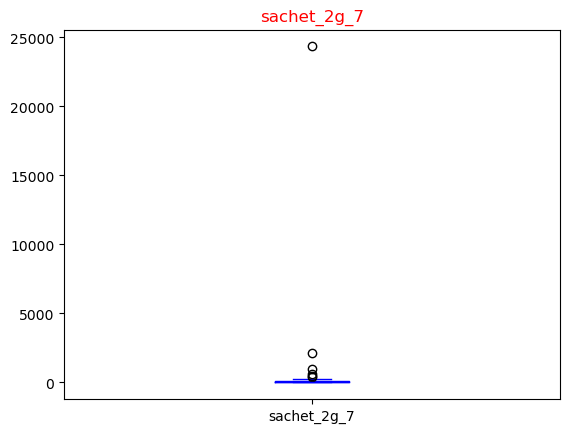

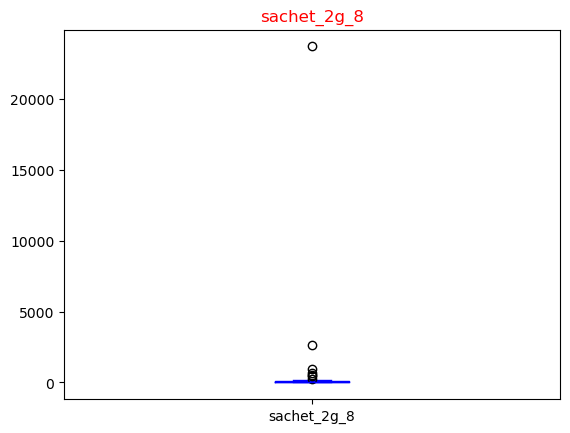

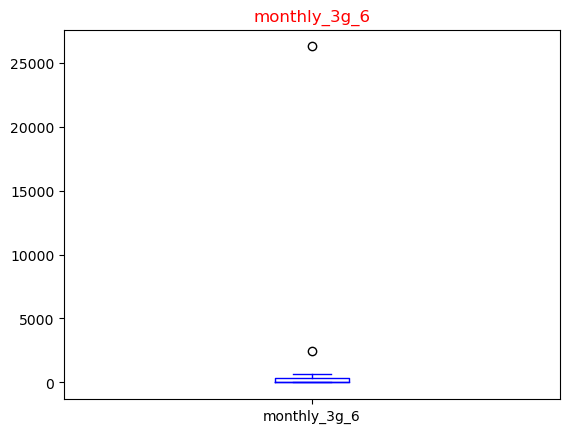

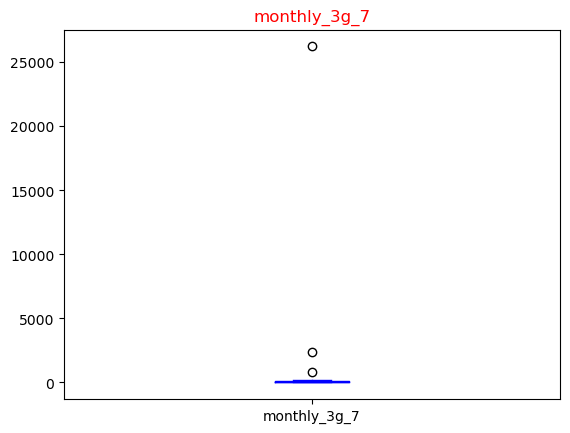

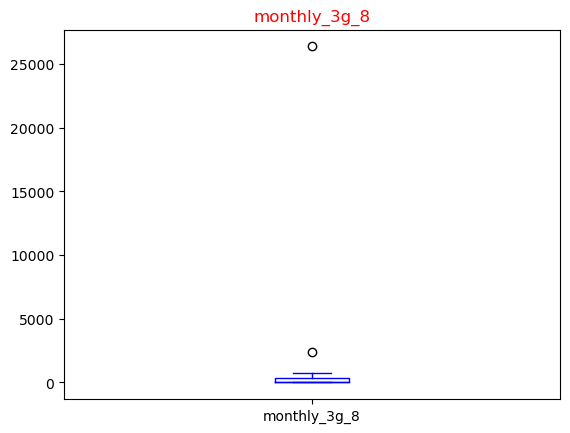

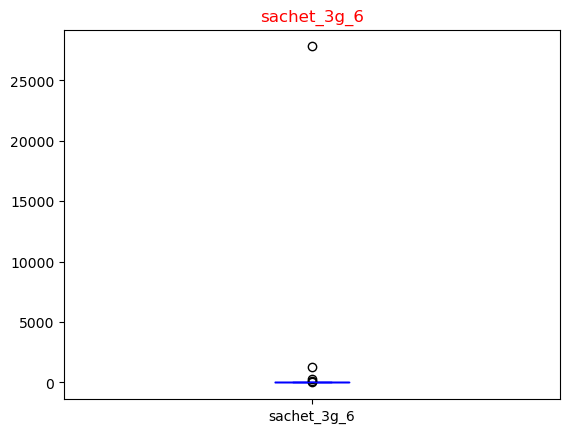

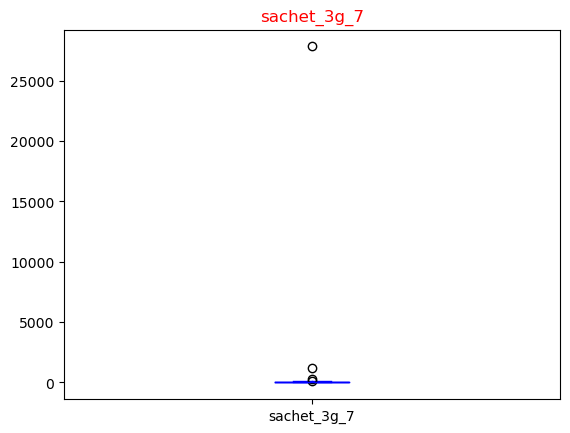

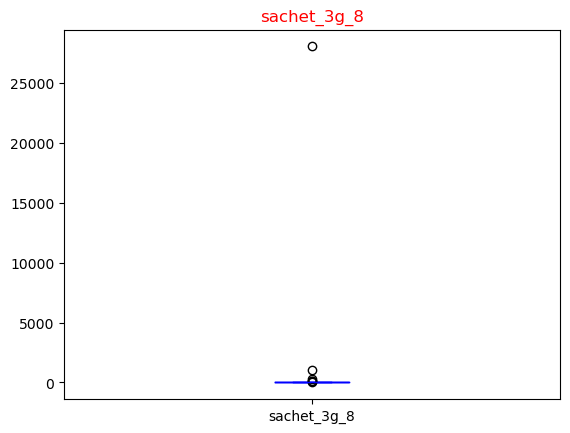

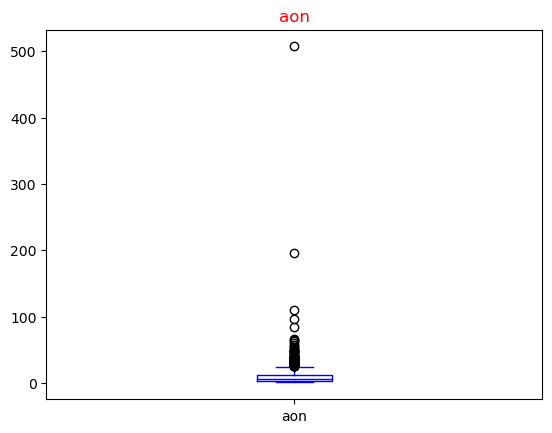

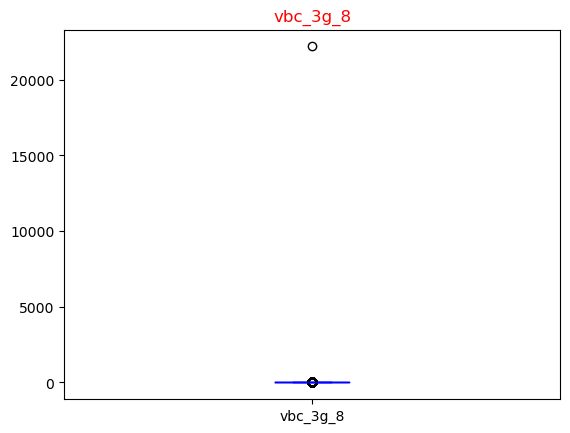

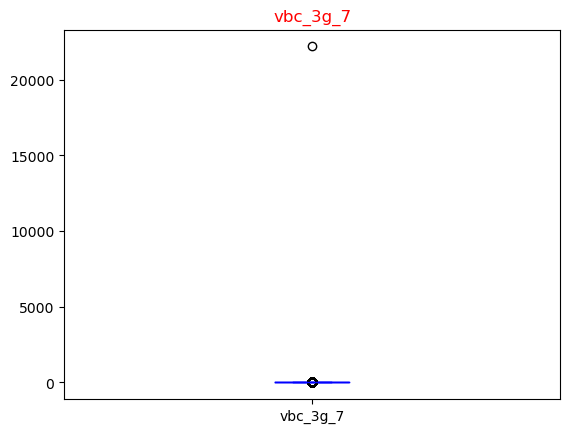

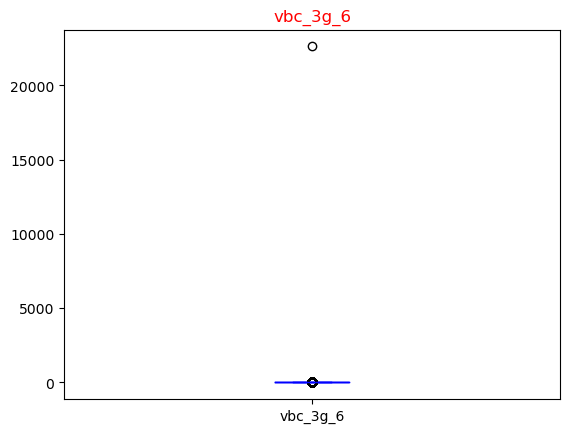

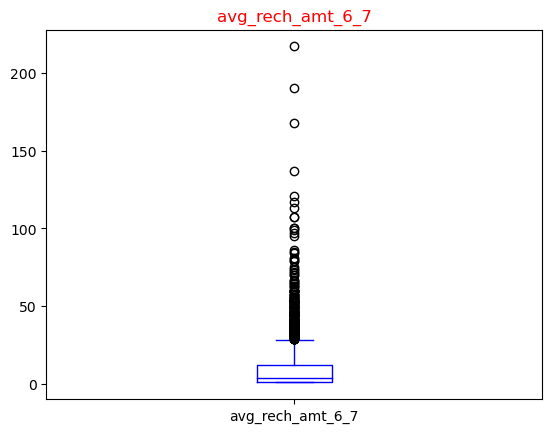

In [ ]:
#Plotting the outliers using Boxplot
for i in outlier_cols:
    churn_data[i].value_counts().plot.box(color = 'blue')
    plt.title(i, color='red')
    plt.show()

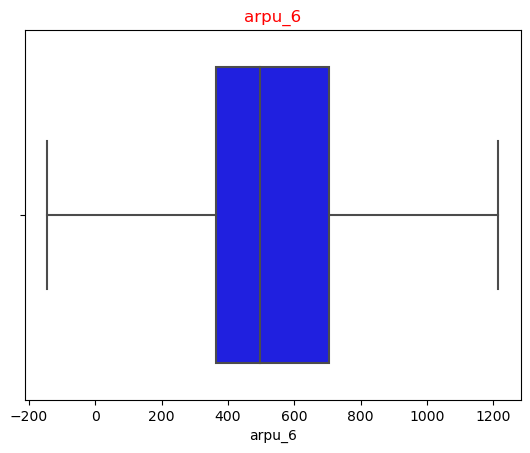

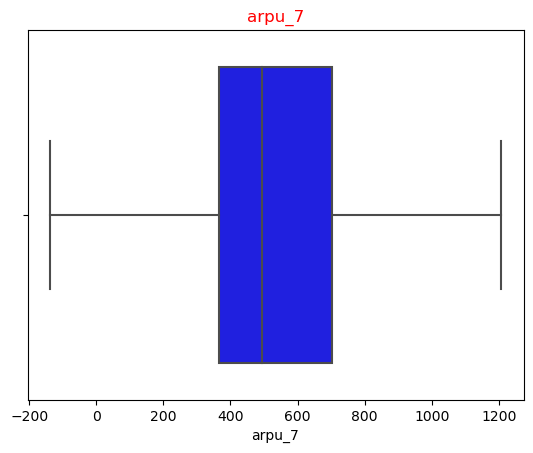

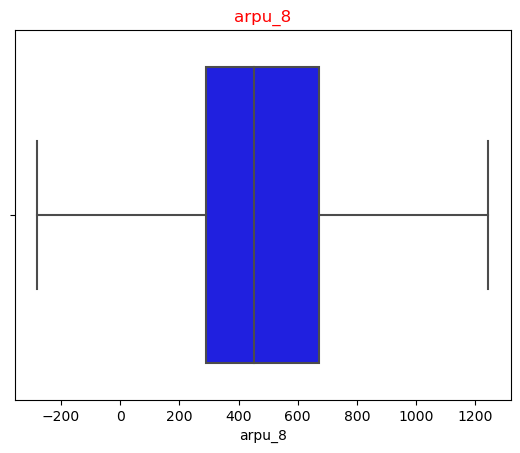

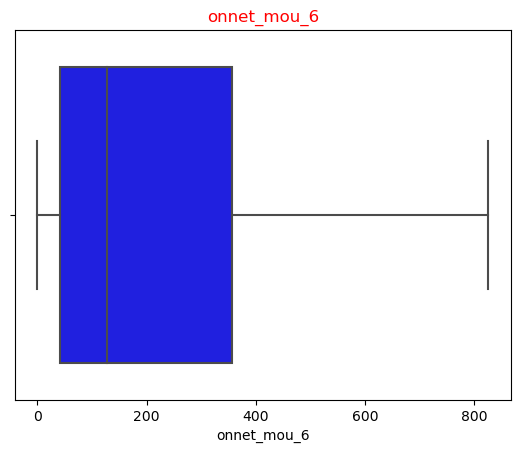

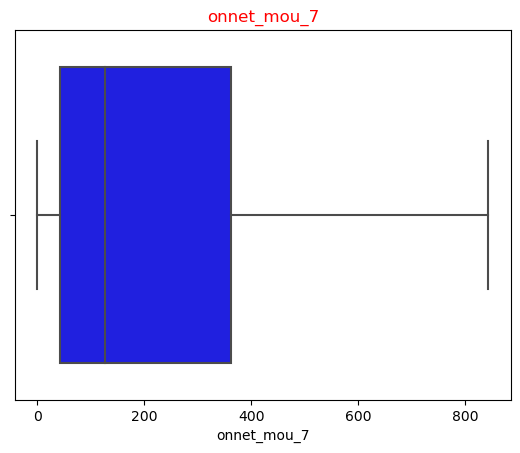

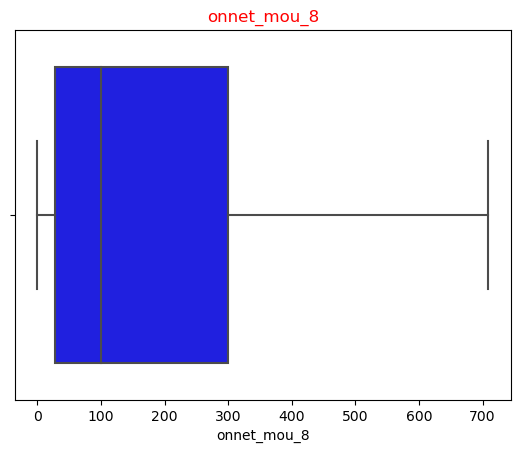

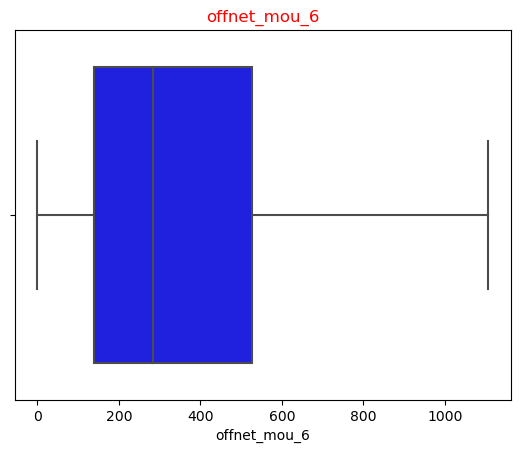

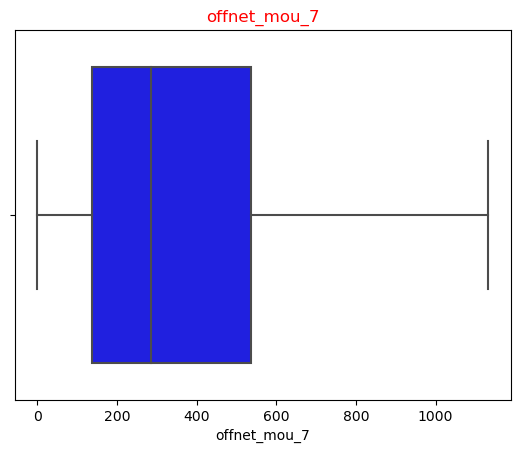

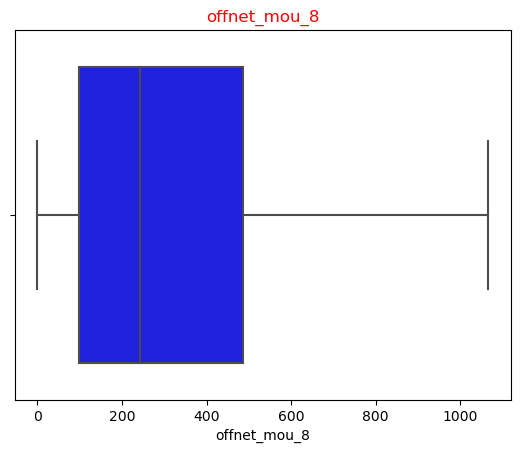

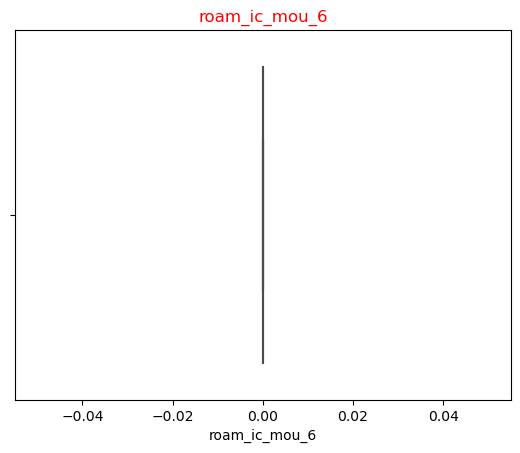

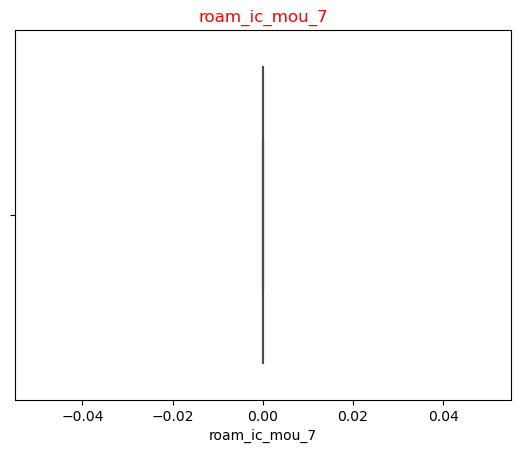

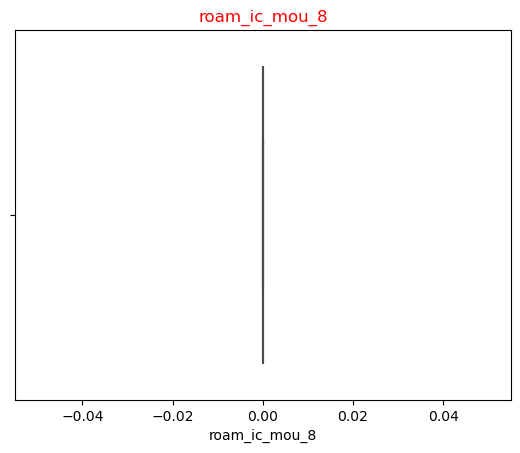

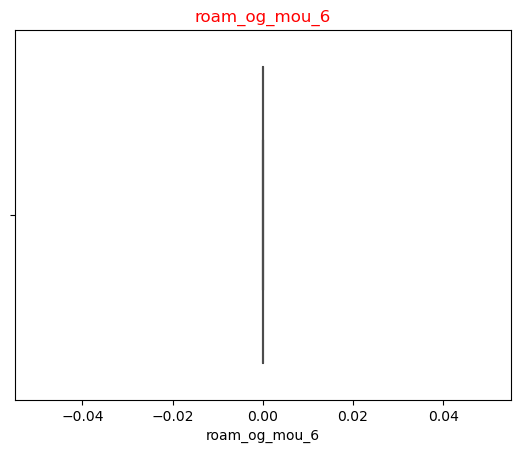

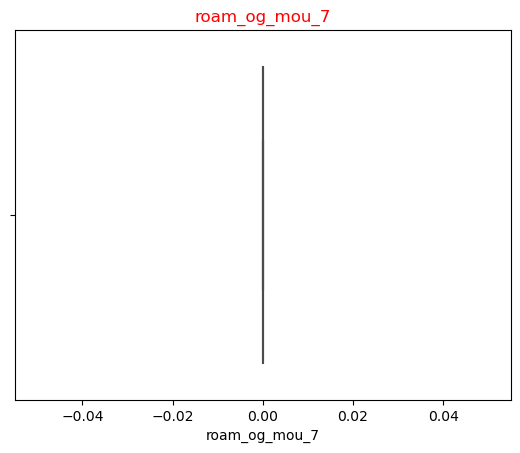

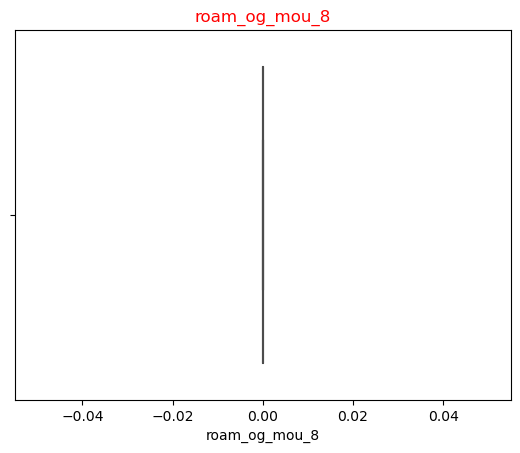

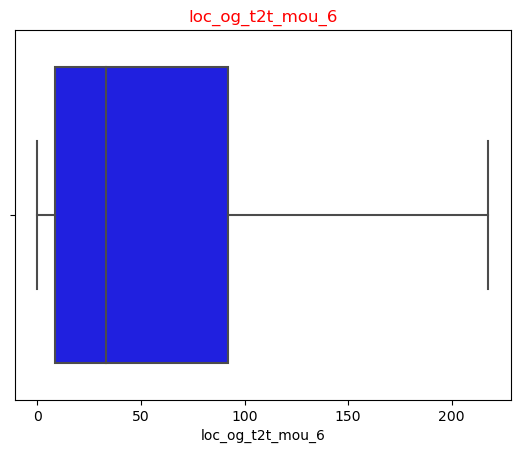

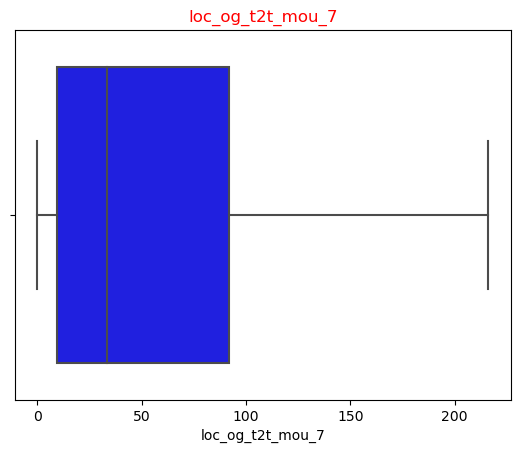

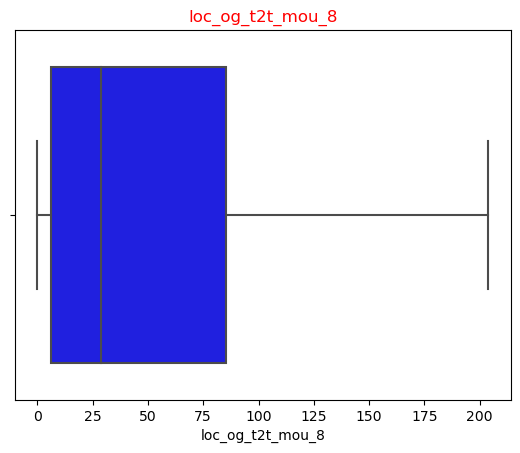

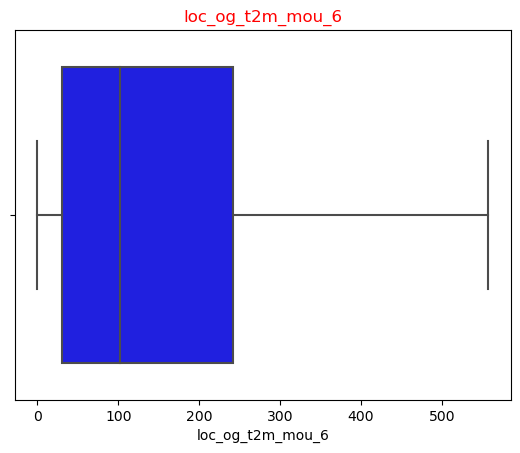

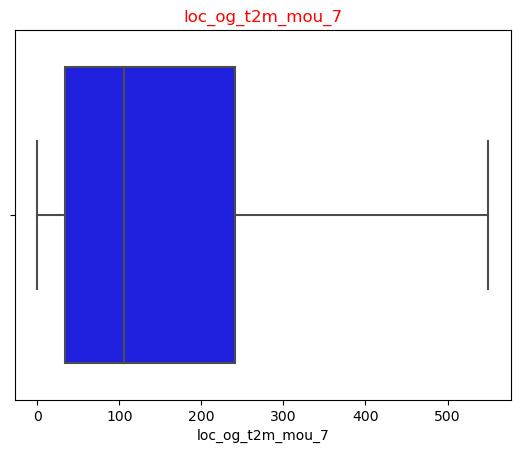

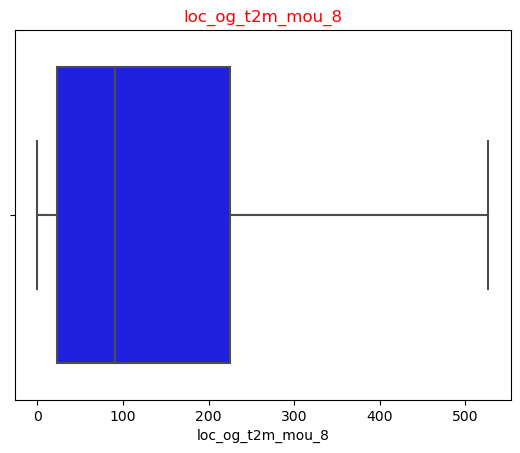

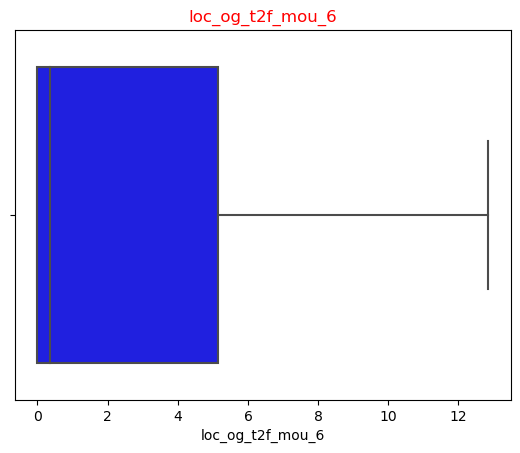

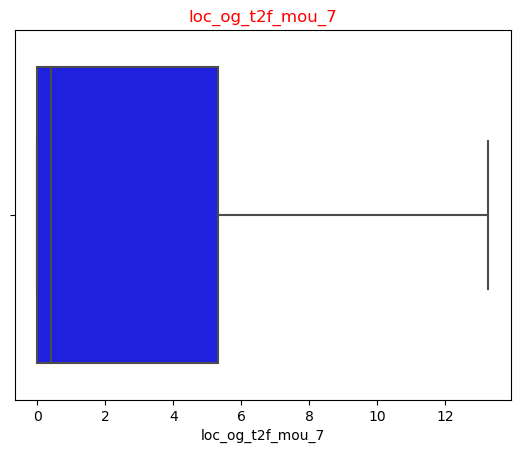

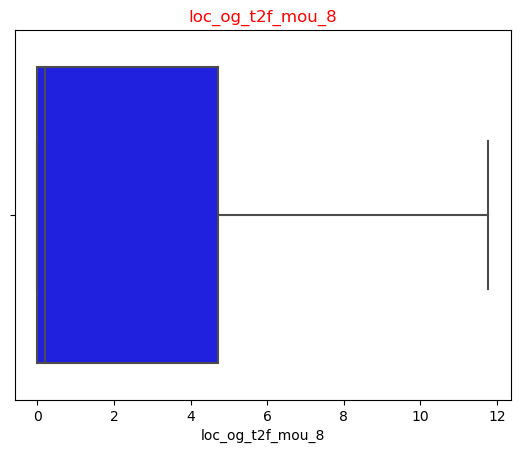

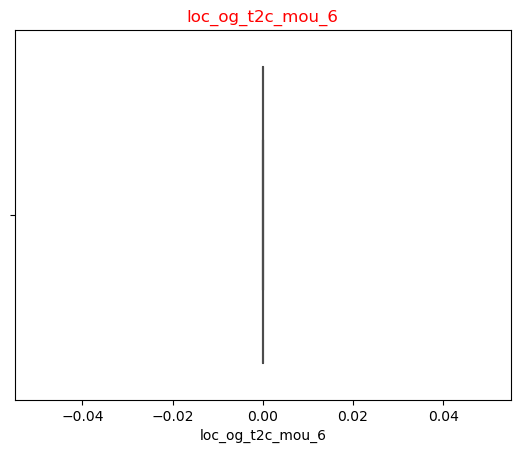

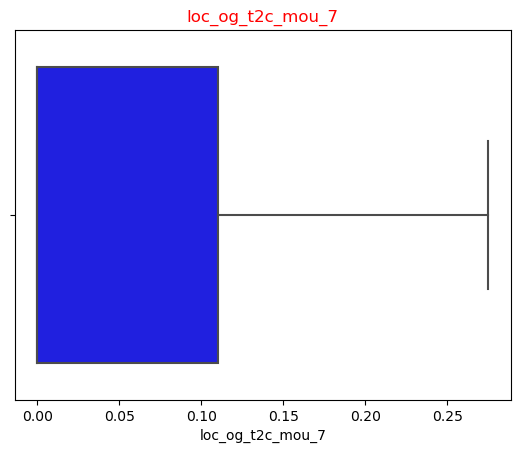

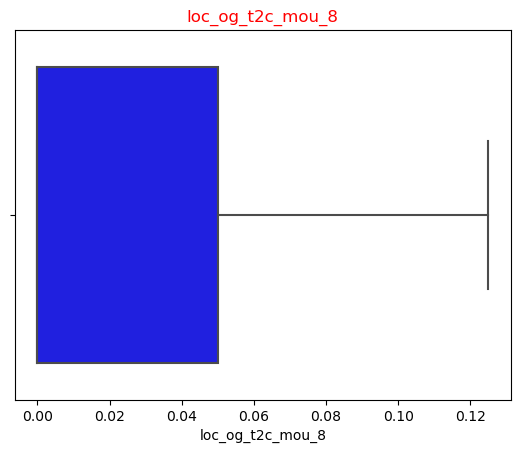

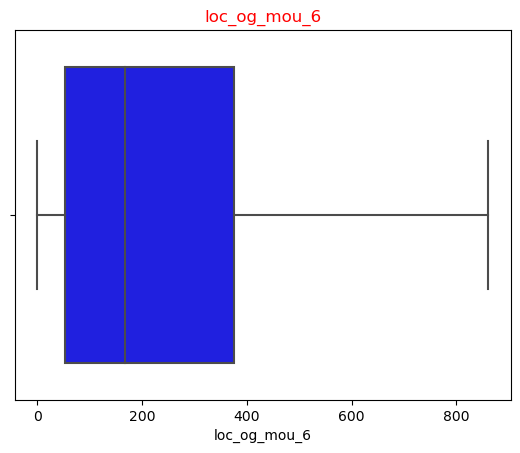

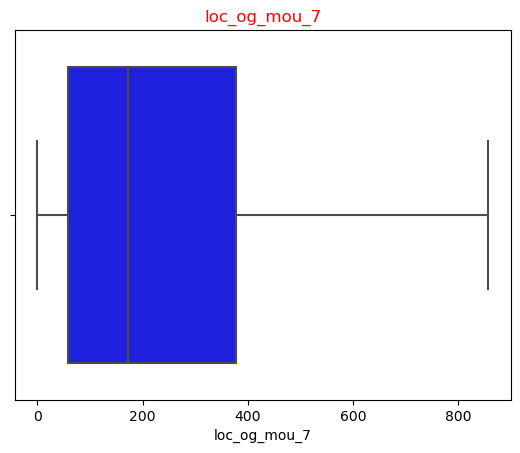

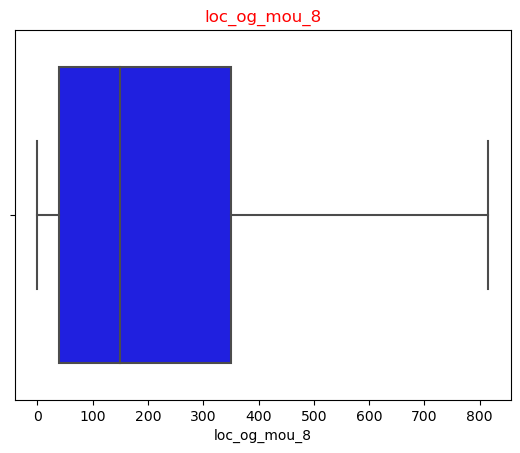

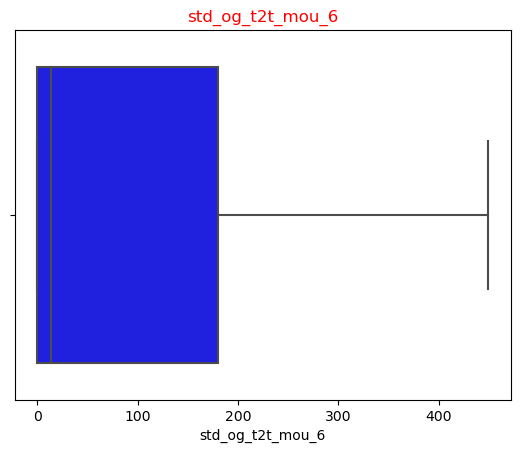

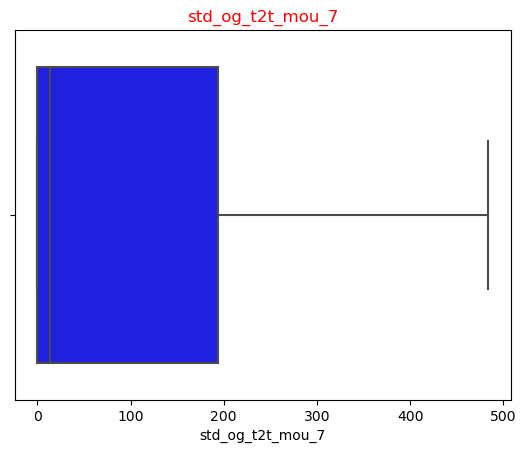

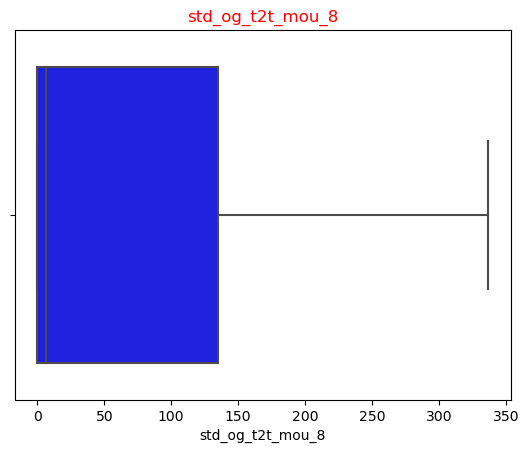

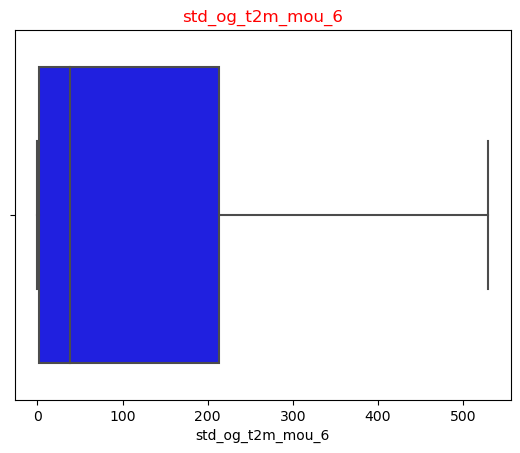

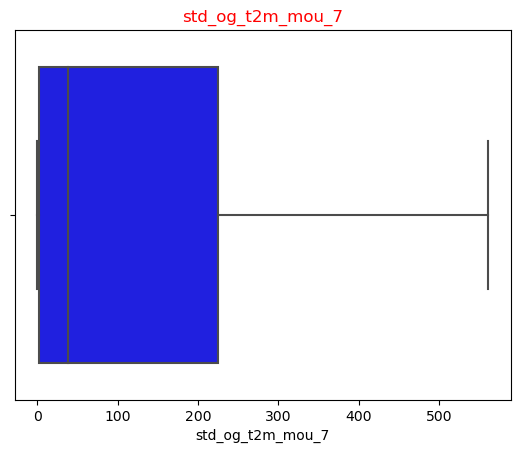

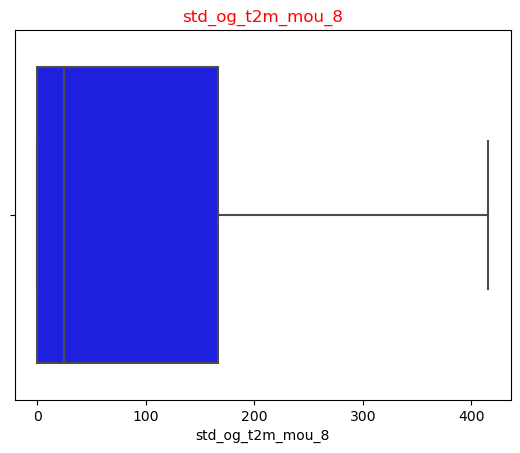

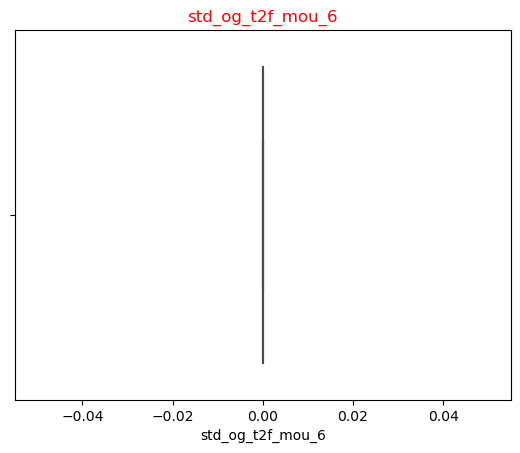

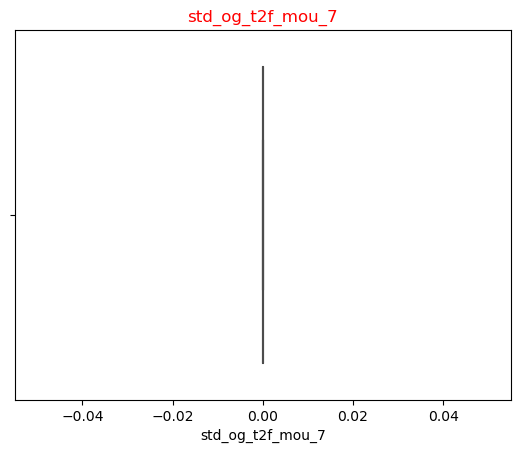

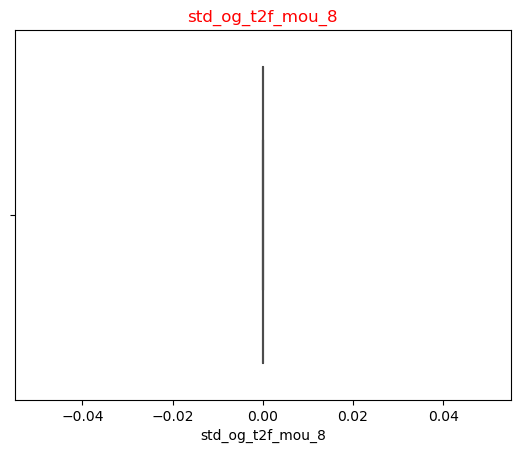

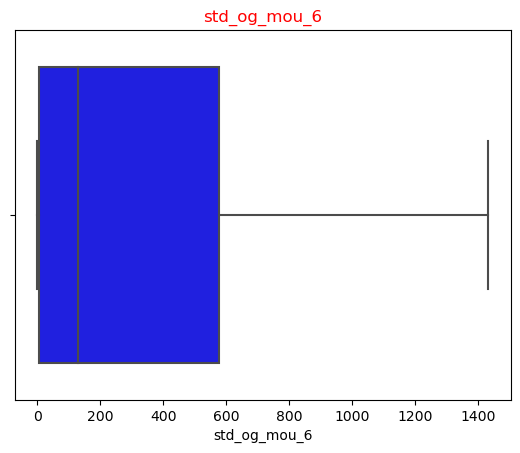

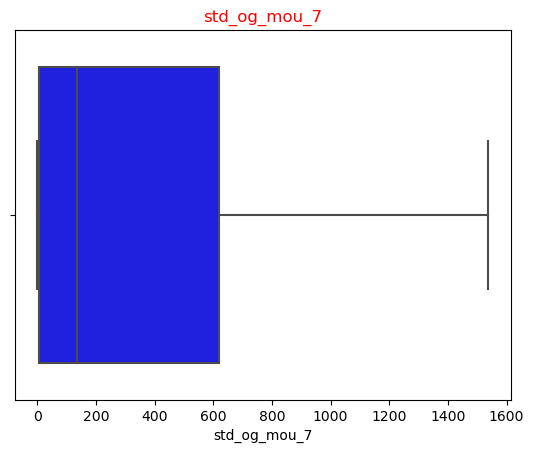

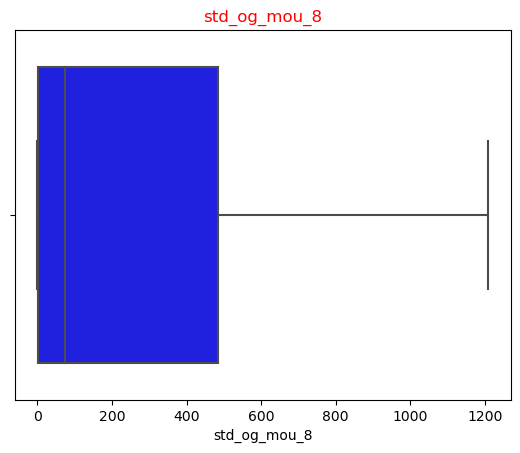

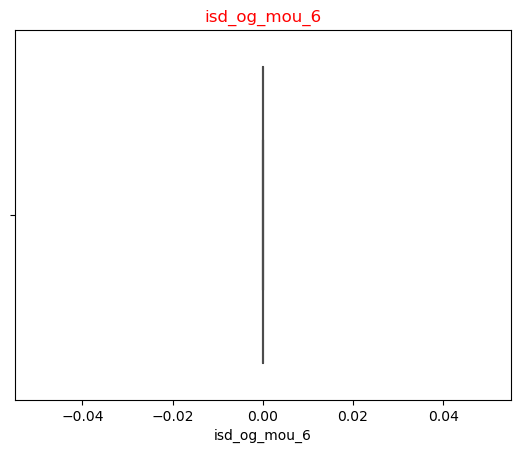

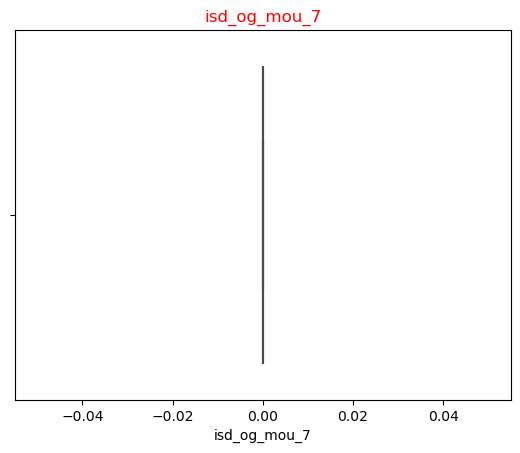

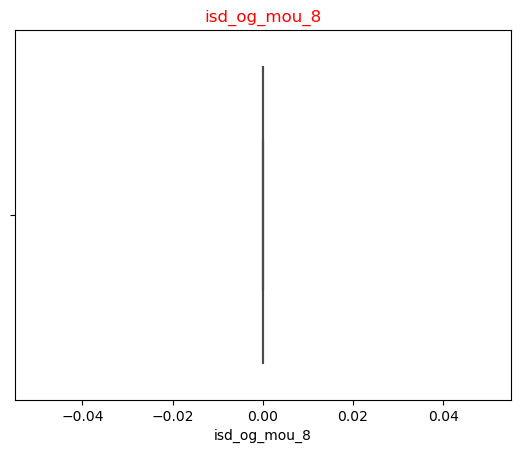

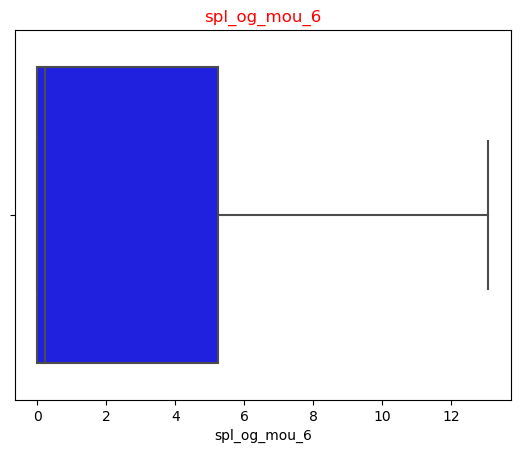

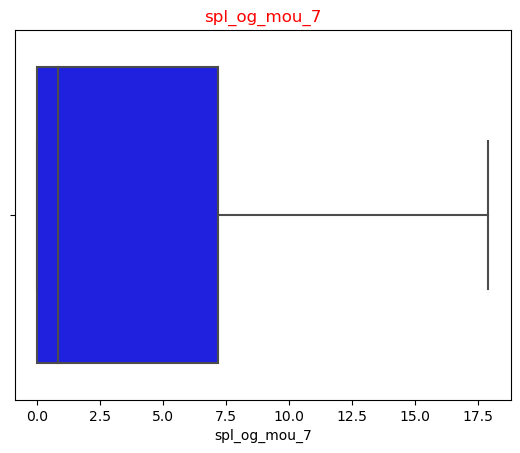

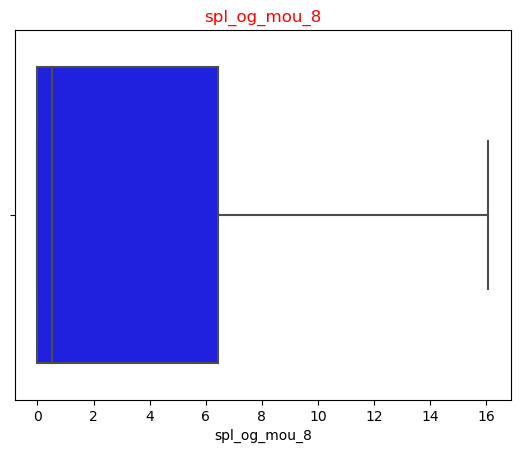

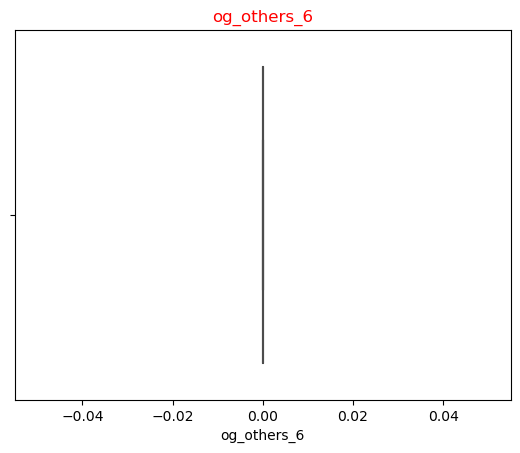

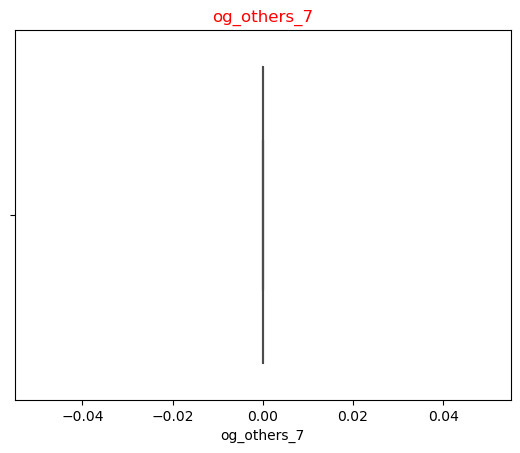

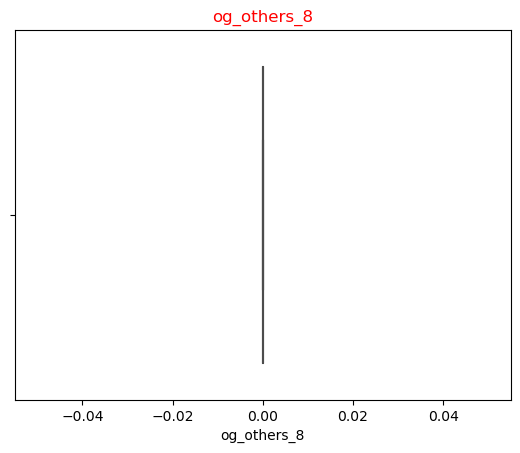

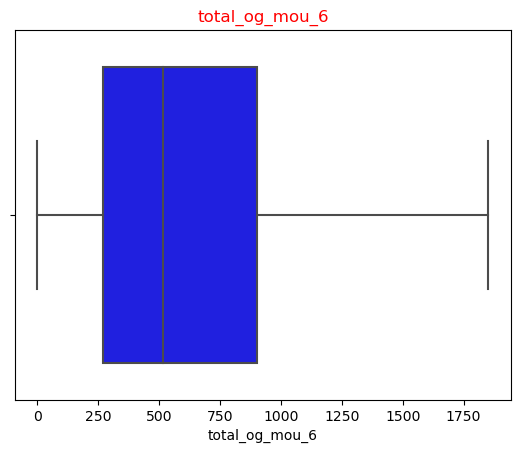

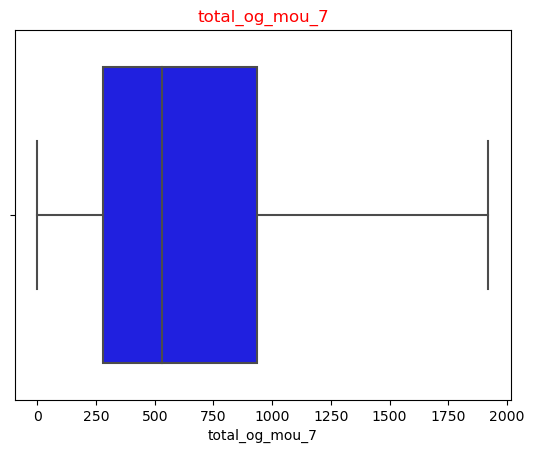

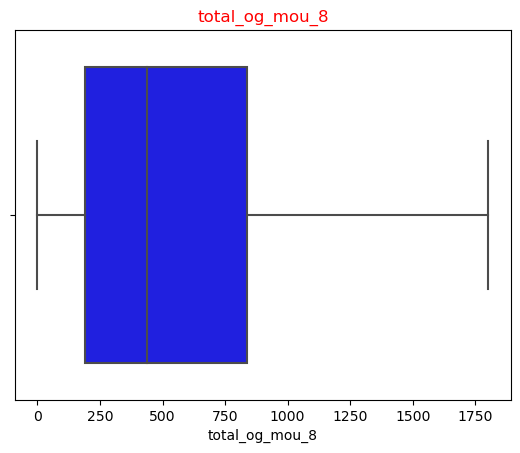

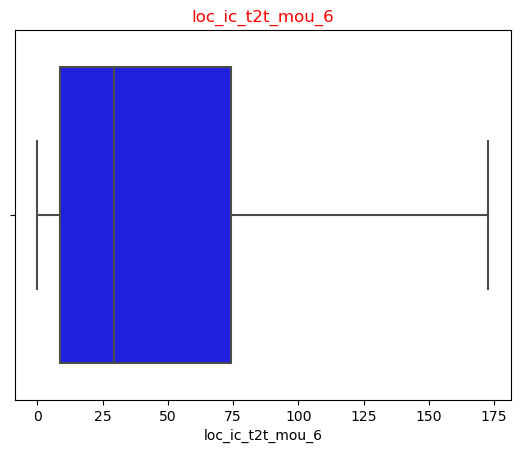

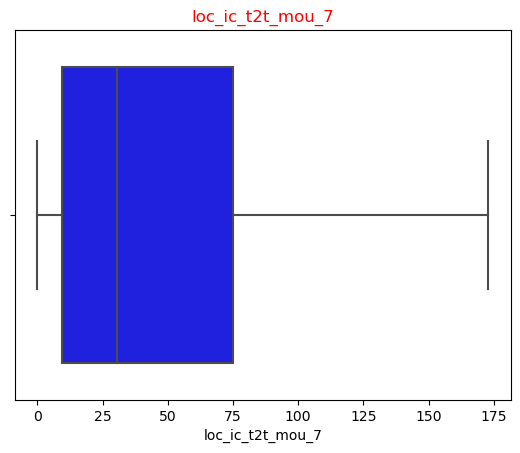

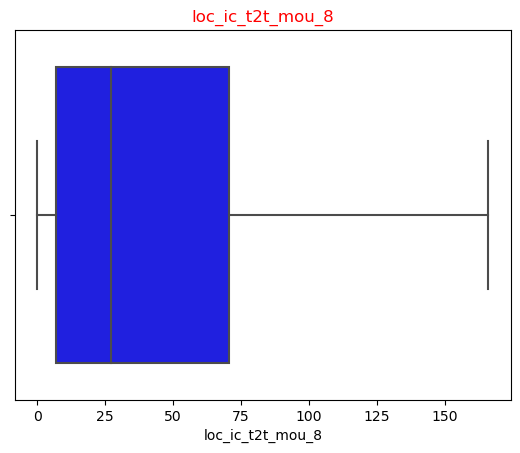

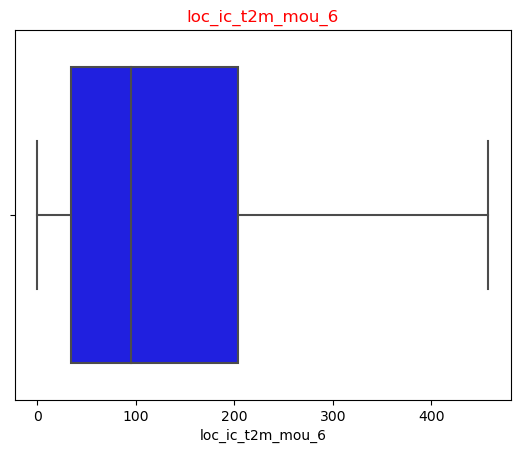

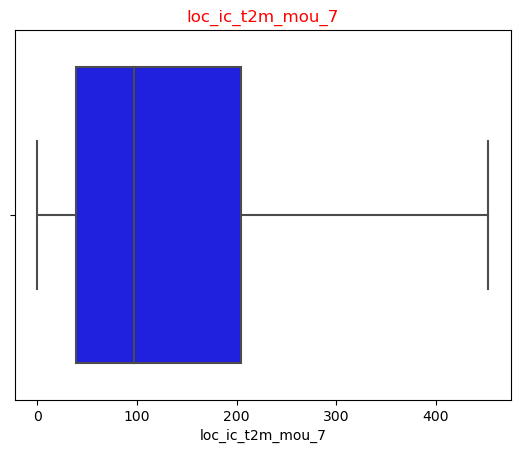

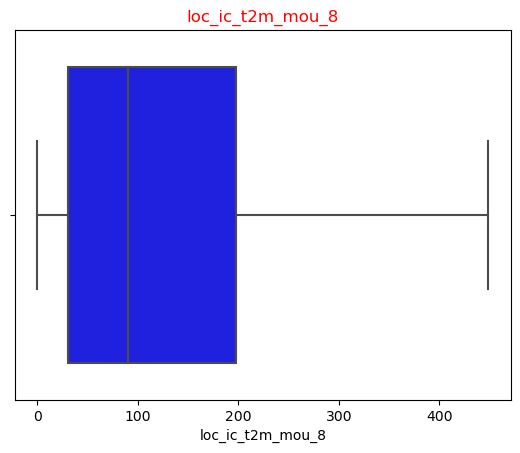

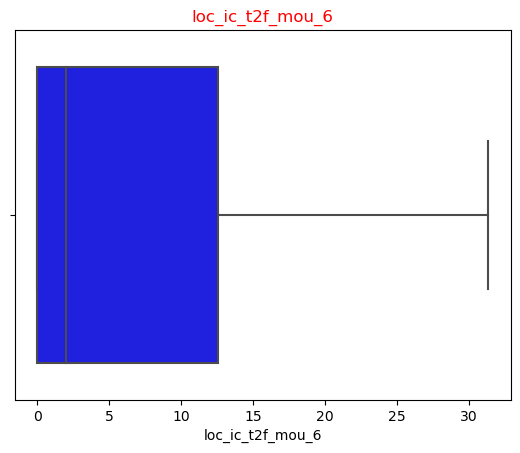

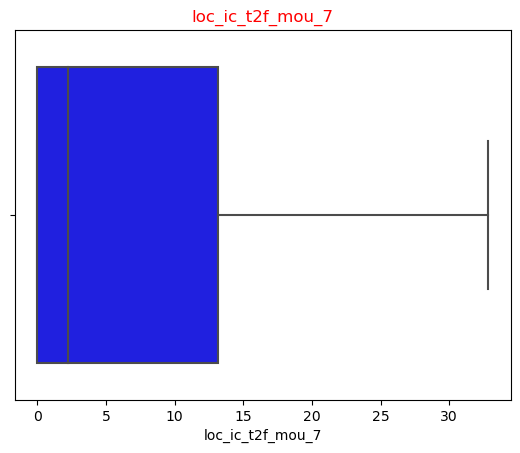

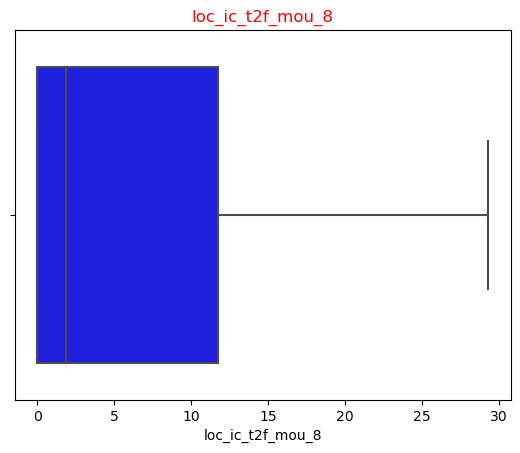

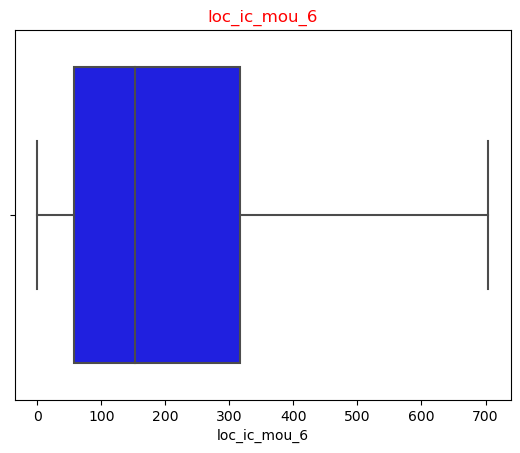

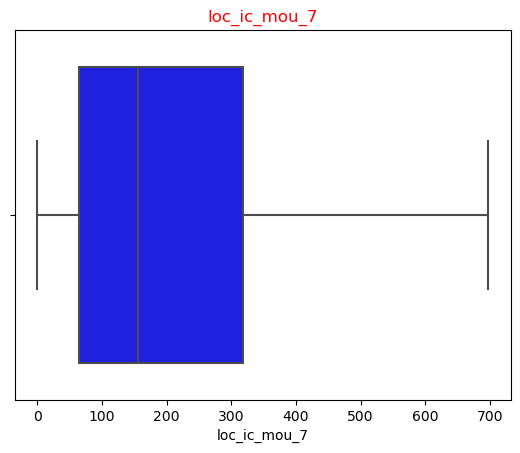

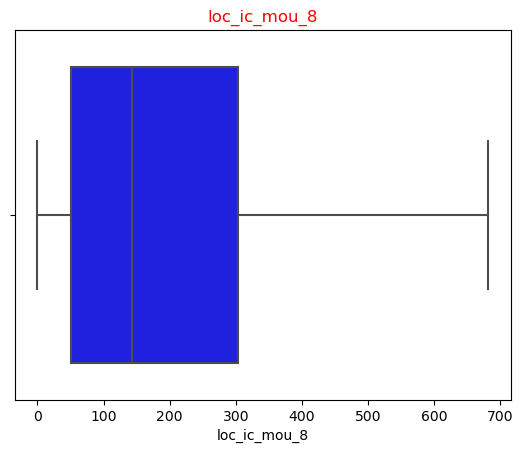

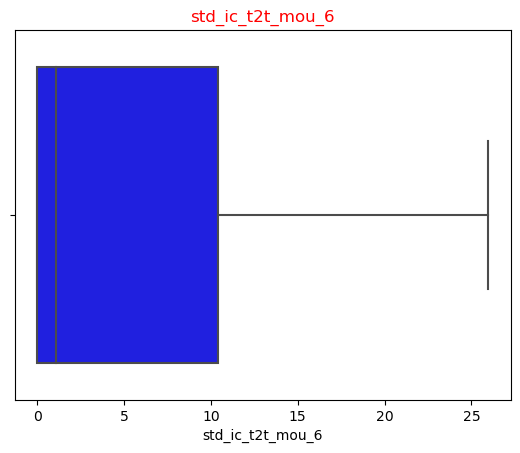

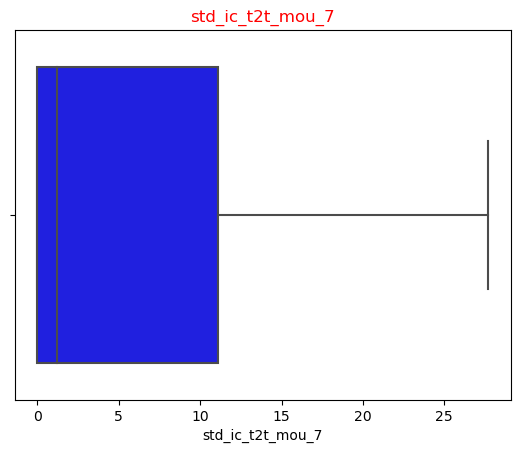

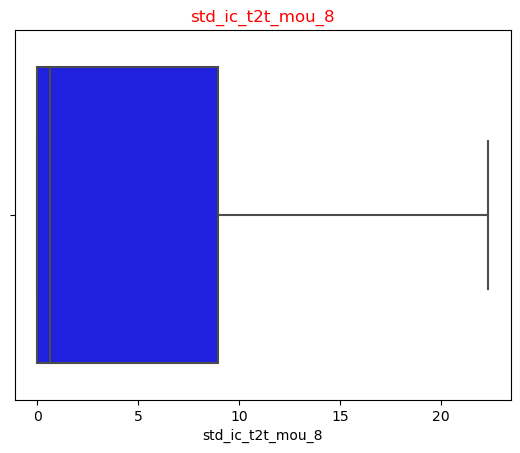

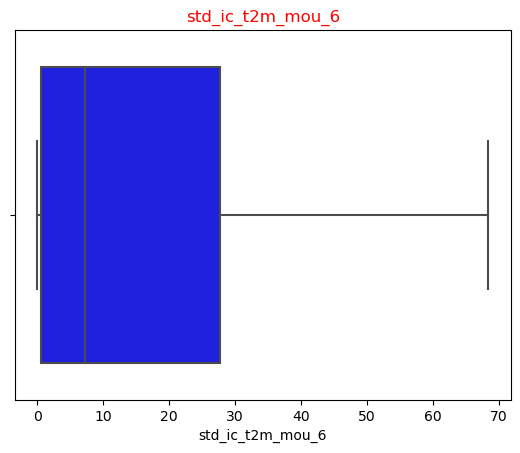

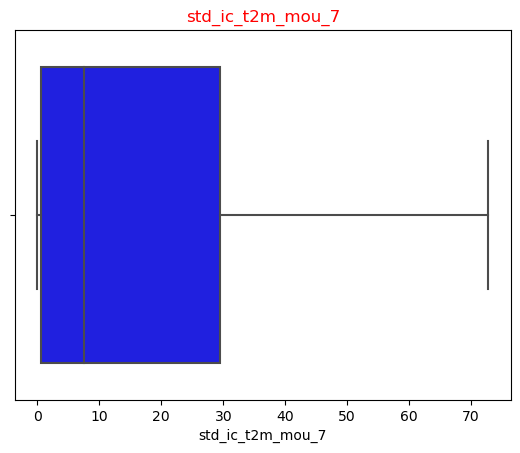

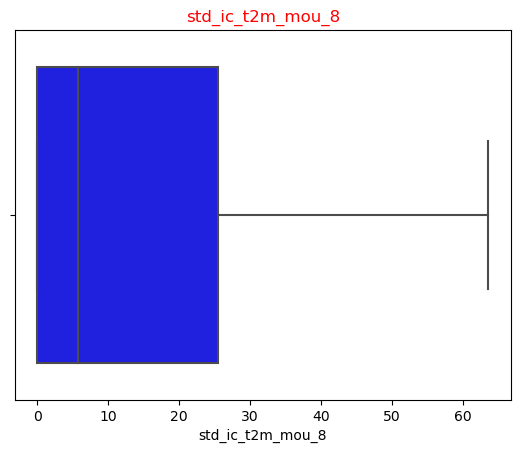

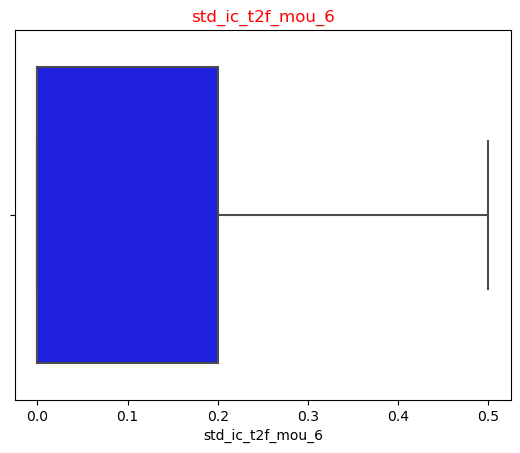

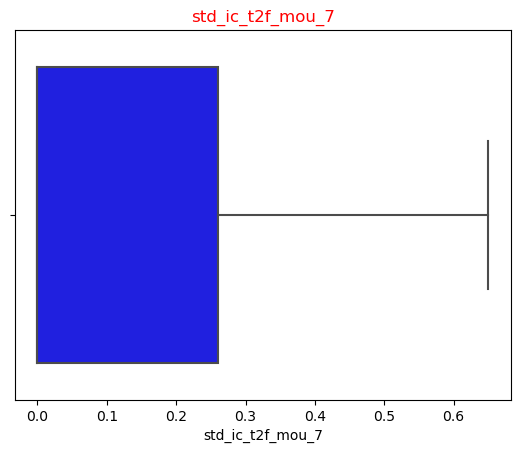

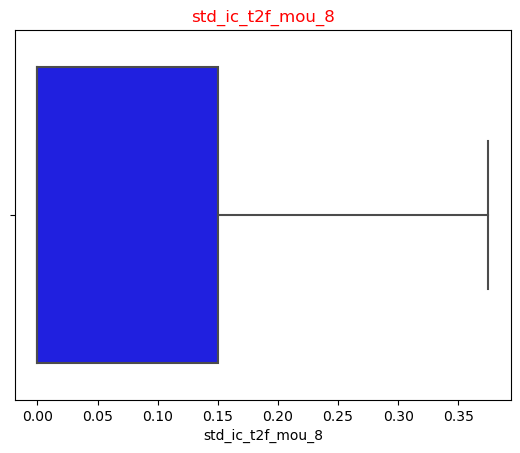

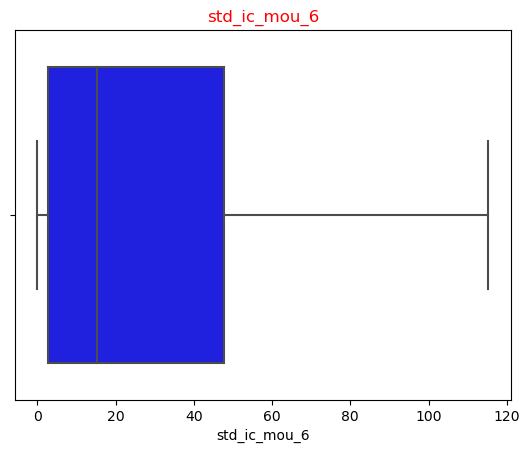

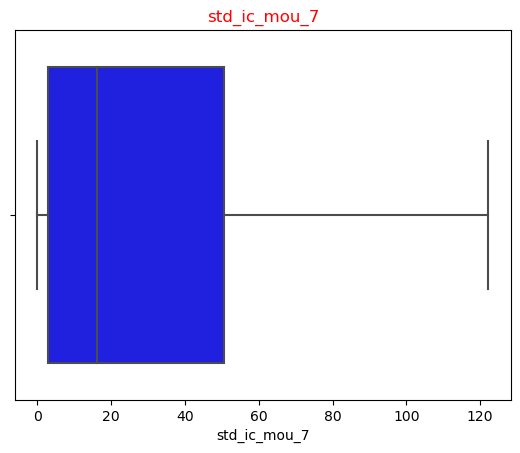

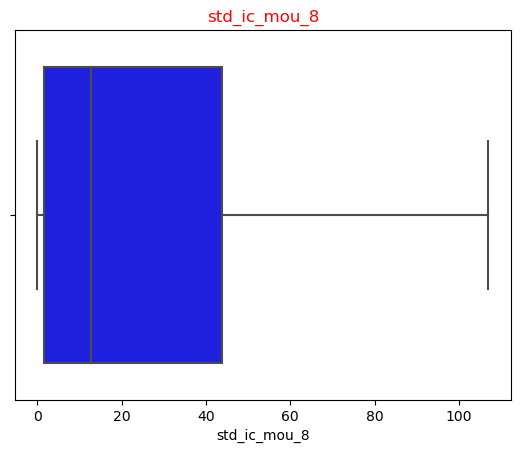

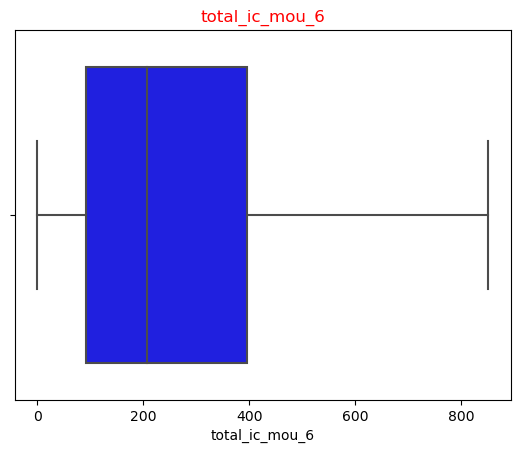

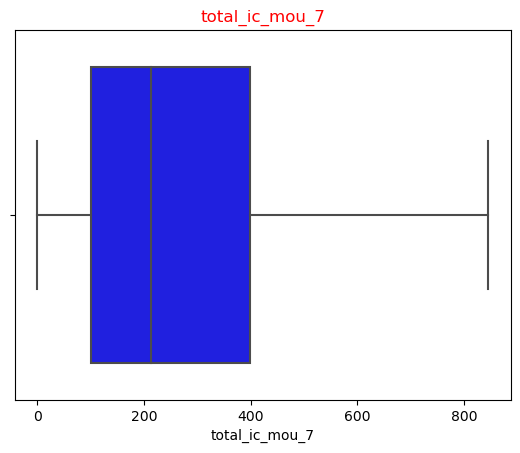

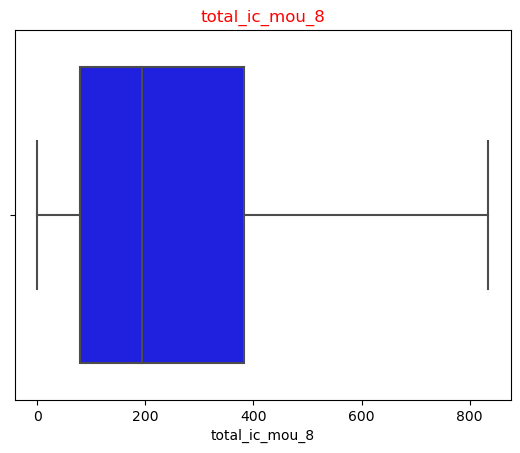

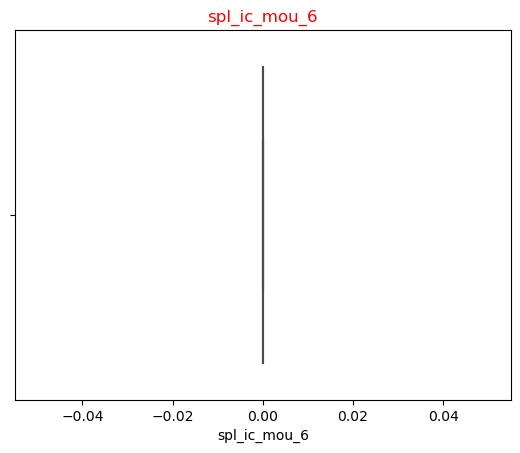

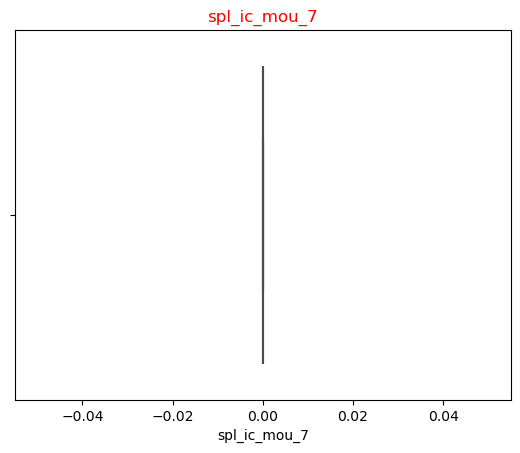

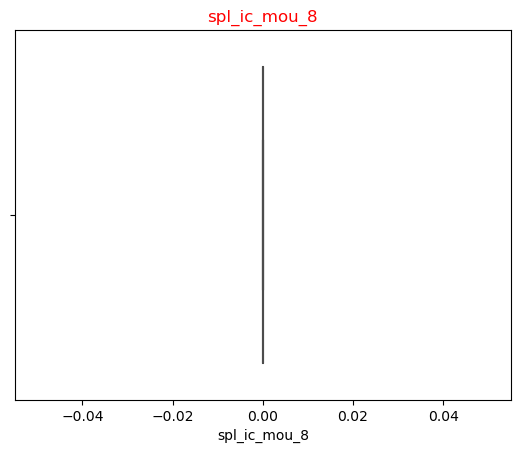

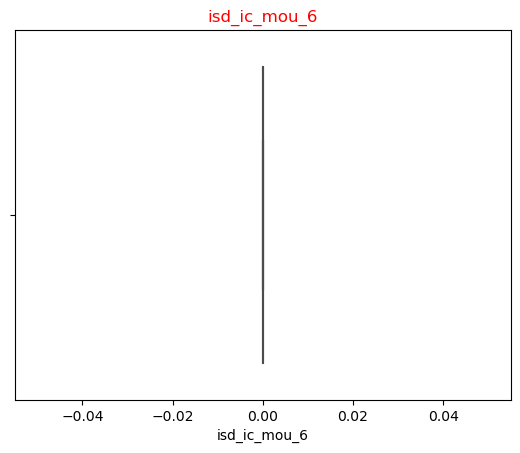

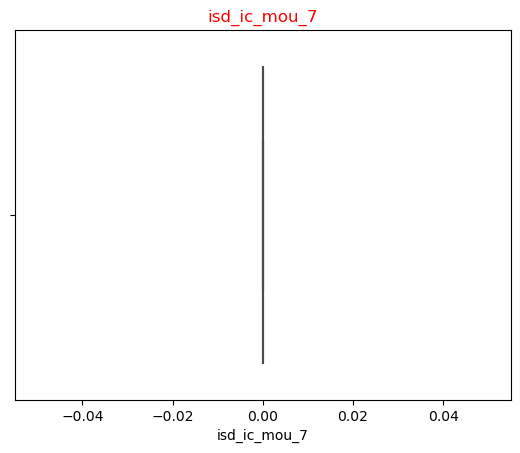

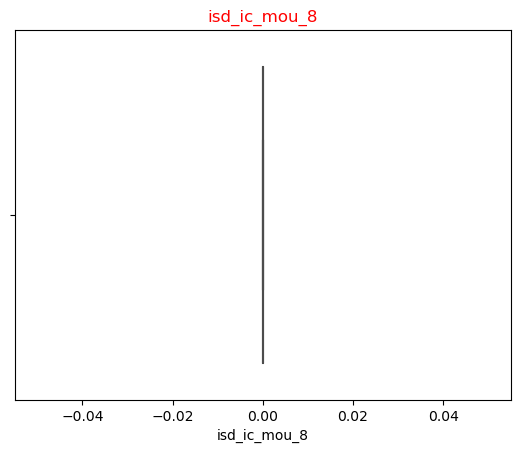

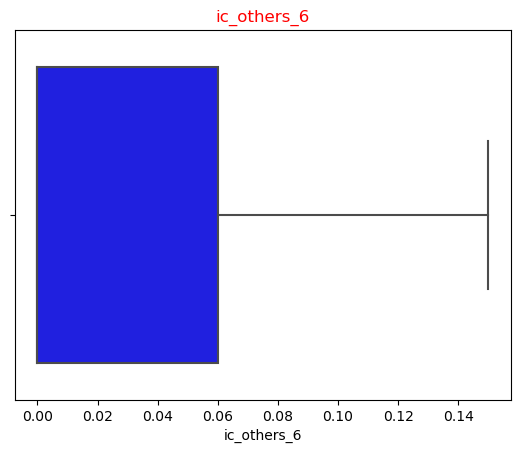

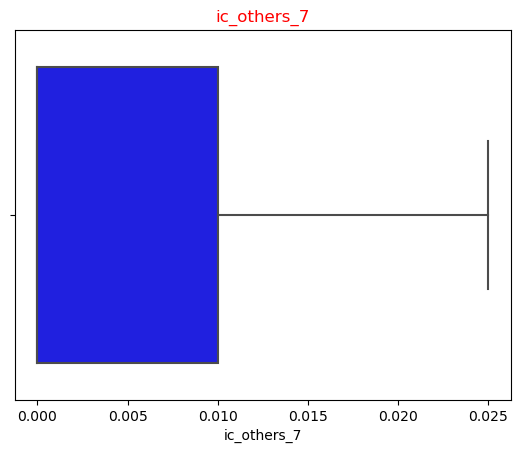

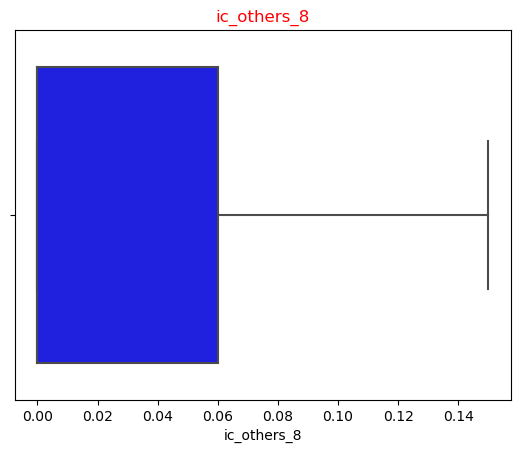

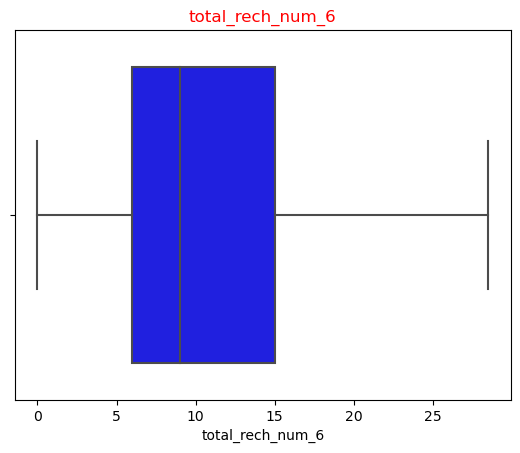

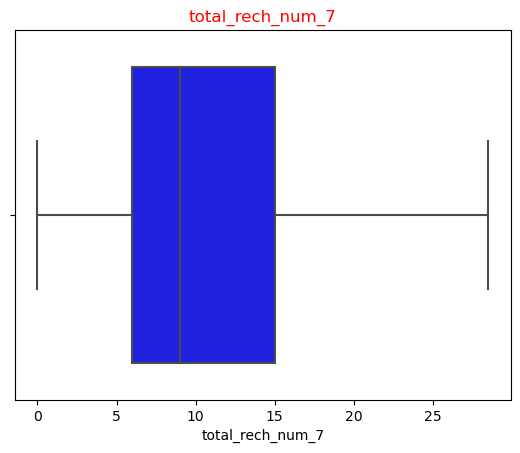

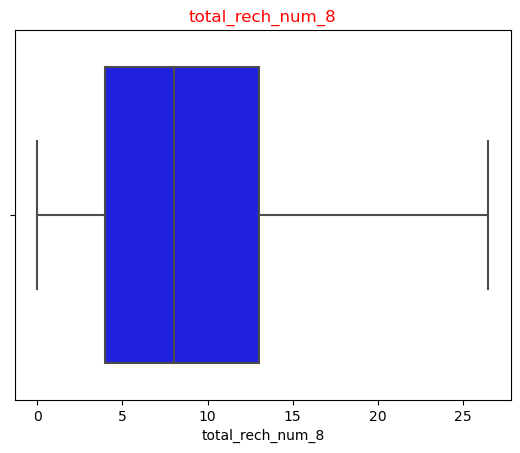

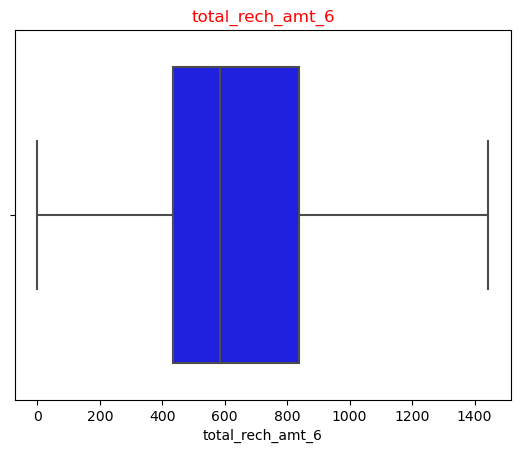

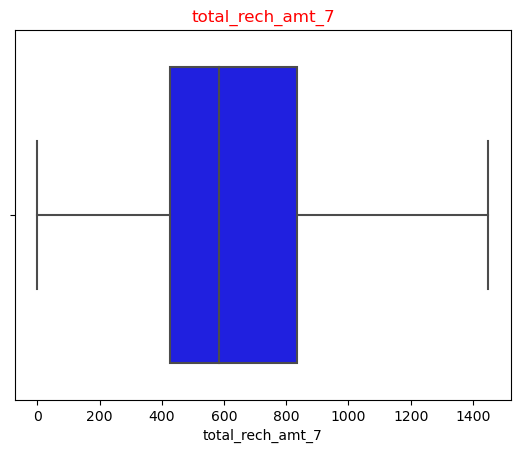

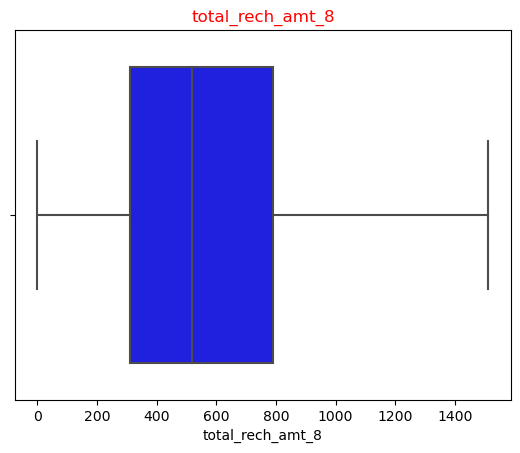

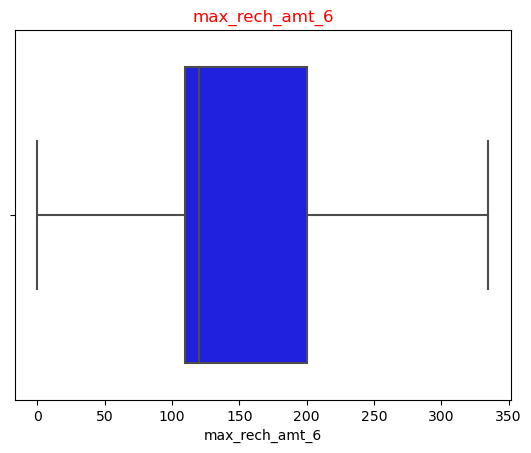

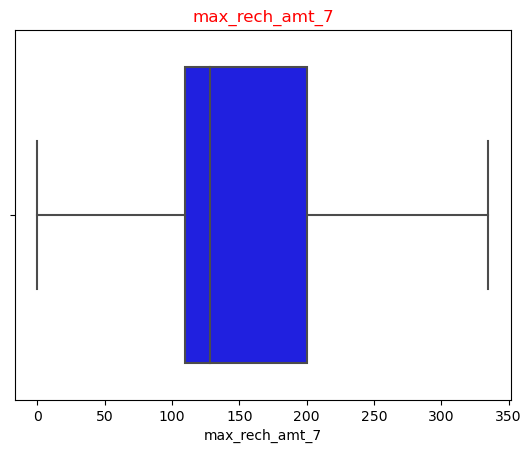

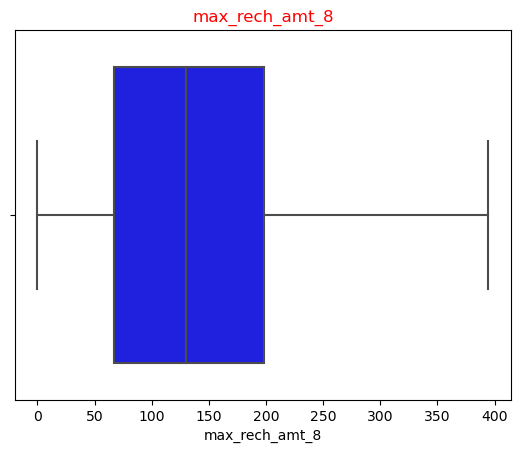

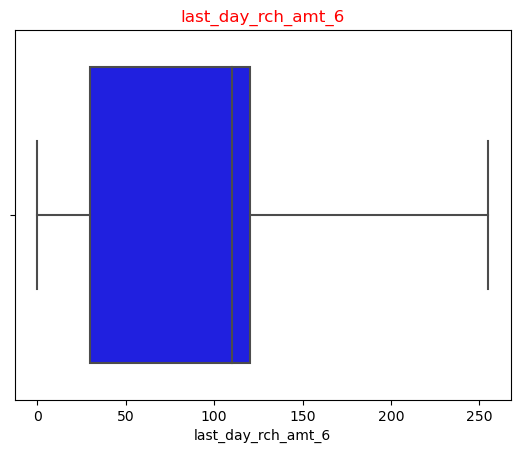

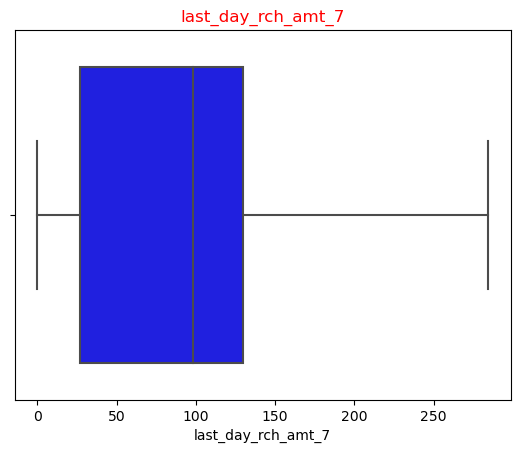

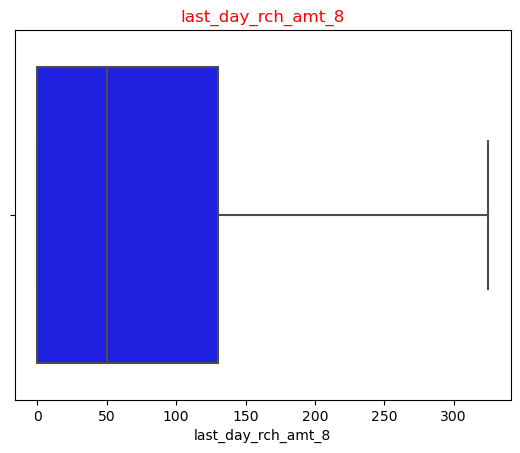

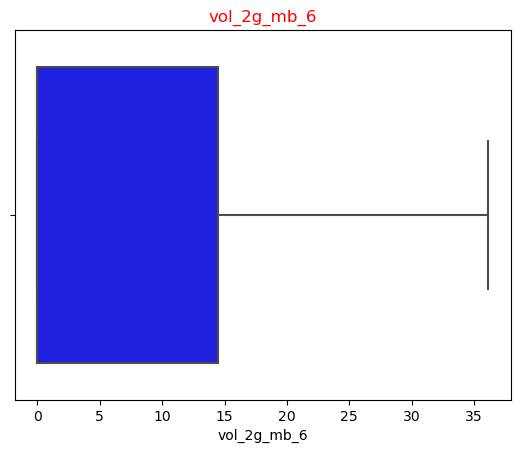

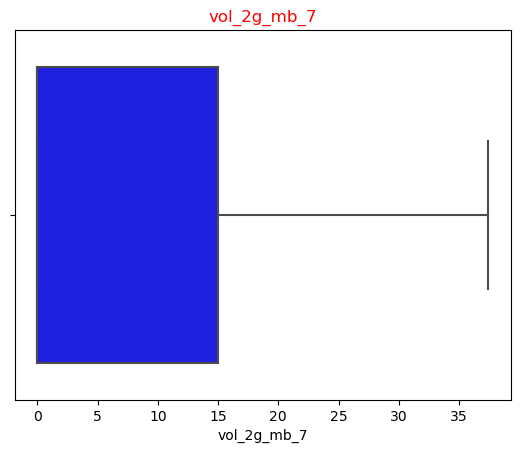

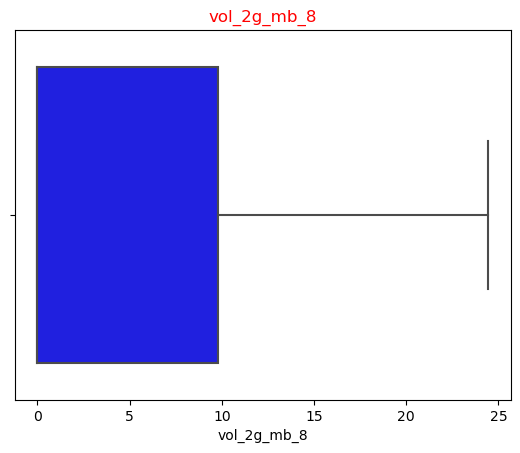

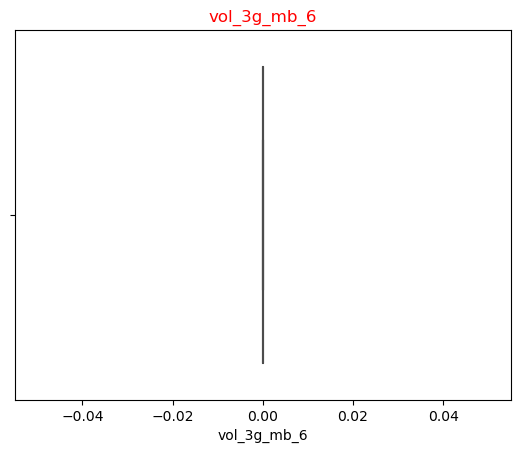

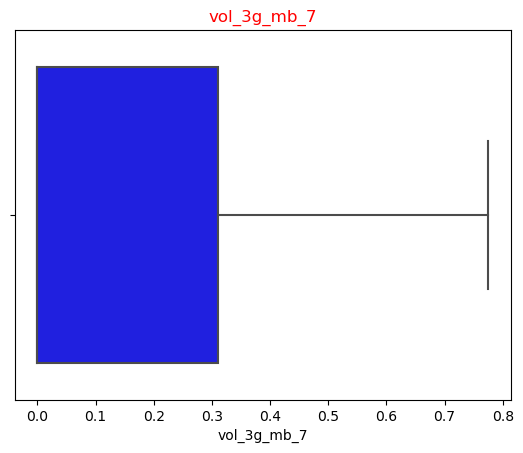

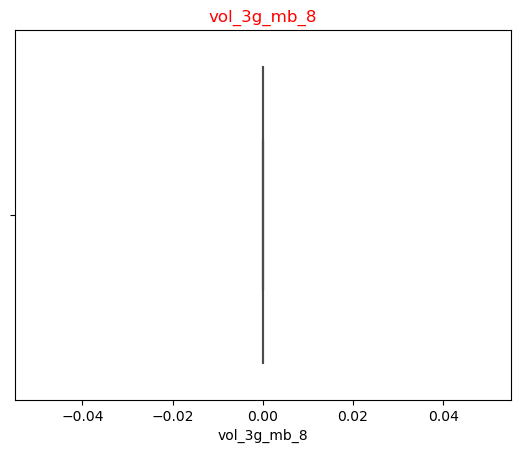

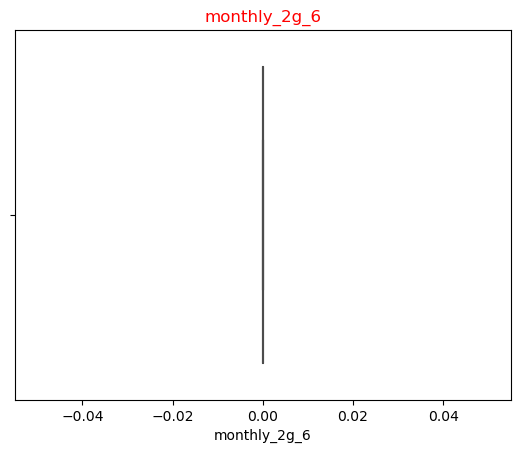

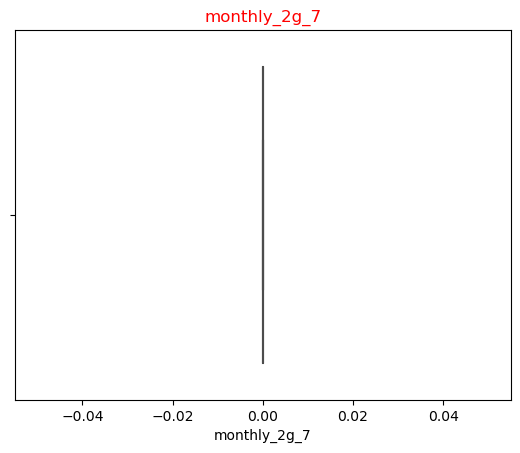

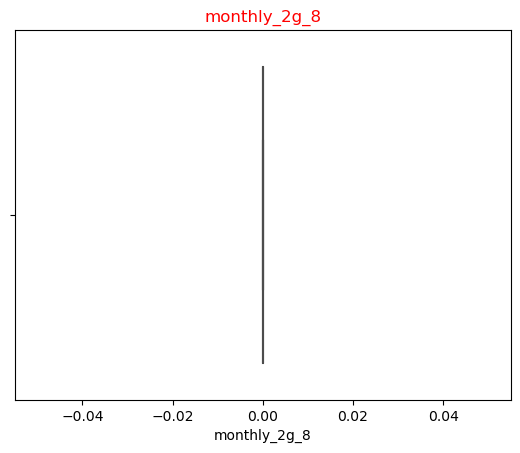

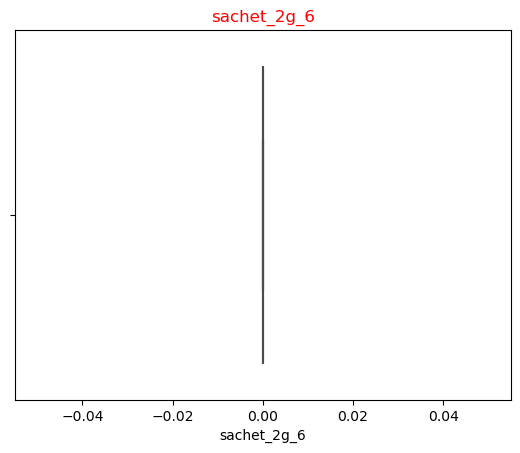

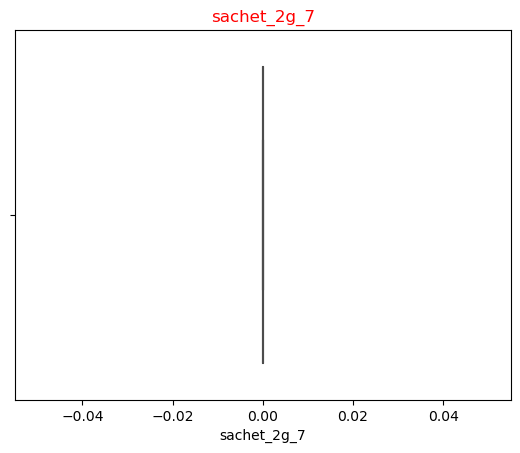

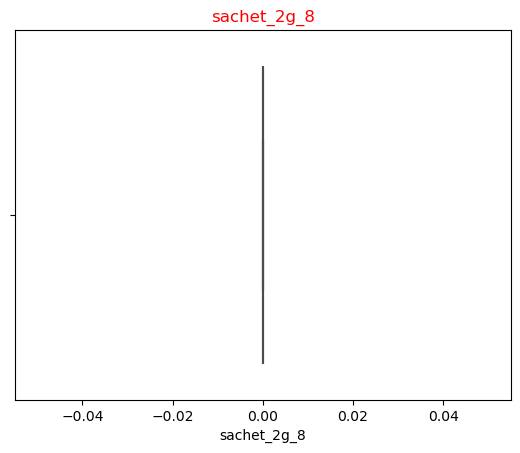

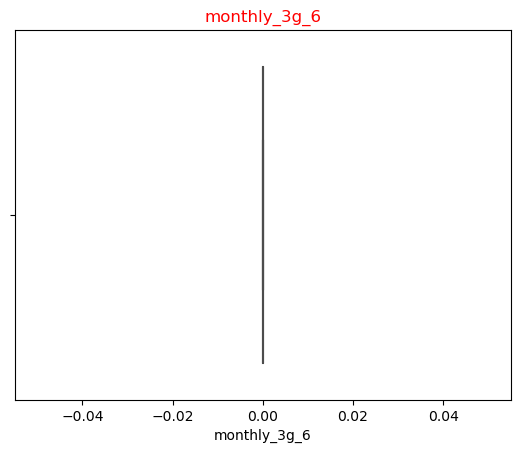

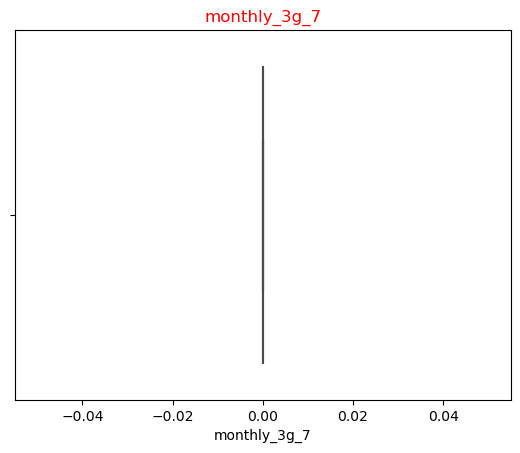

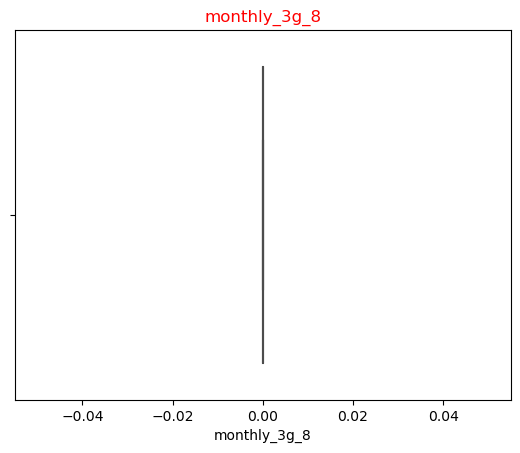

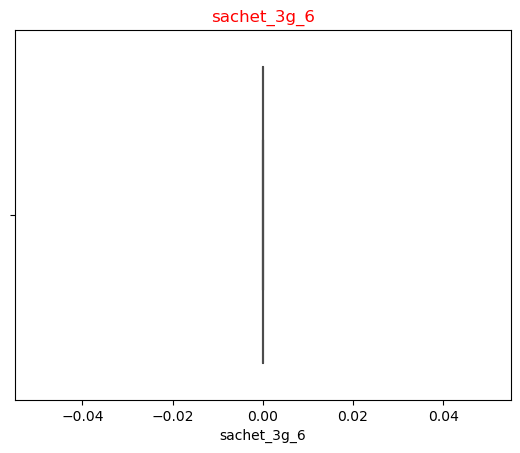

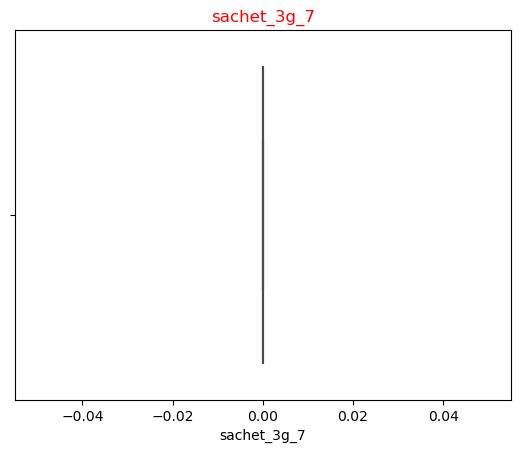

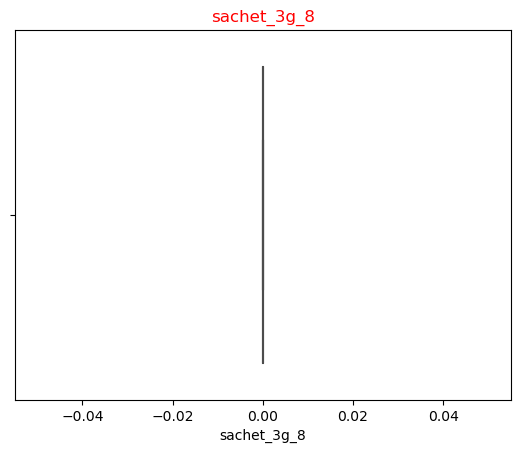

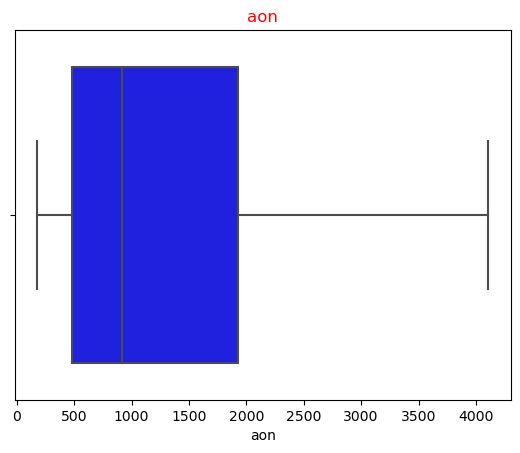

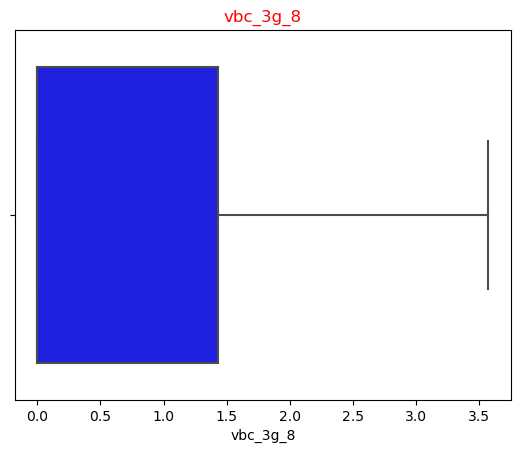

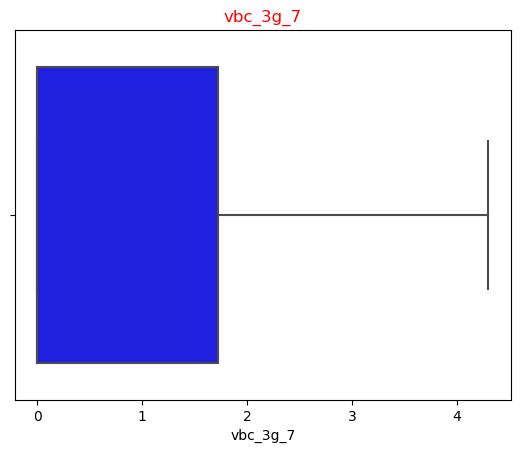

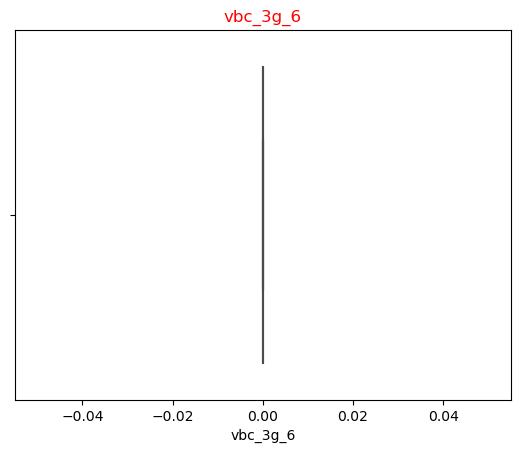

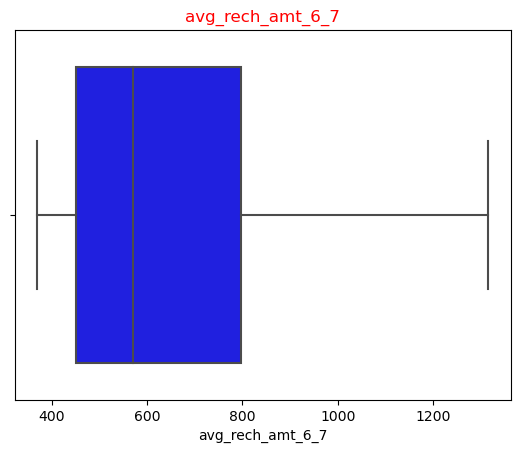

In [ ]:
#Removing the outliers and plotting them using Boxplot
for i in outlier_cols:
    q1=churn_data[i].describe()["25%"]
    q3=churn_data[i].describe()["75%"]
    iqr=q3-q1 #interquartile range
    lower_bound=q1-1.5*iqr
    upper_bound=q3+1.5*iqr
    churn_data[i]=np.where(churn_data[i]>upper_bound,upper_bound,churn_data[i])
    churn_data[i]=np.where(churn_data[i]<lower_bound,lower_bound,churn_data[i])
    sns.boxplot(churn_data[i],color='blue')
    plt.title(i, color='red')
    plt.show()

**So now the data is free from outliers**

In [ ]:
#Convert them back to int type for modelling
churn_data['target'] = churn_data['target'].astype(int)

In [ ]:
#Checking the shape of the dataframe
churn_data.shape

(29793, 127)

### Data Visualization

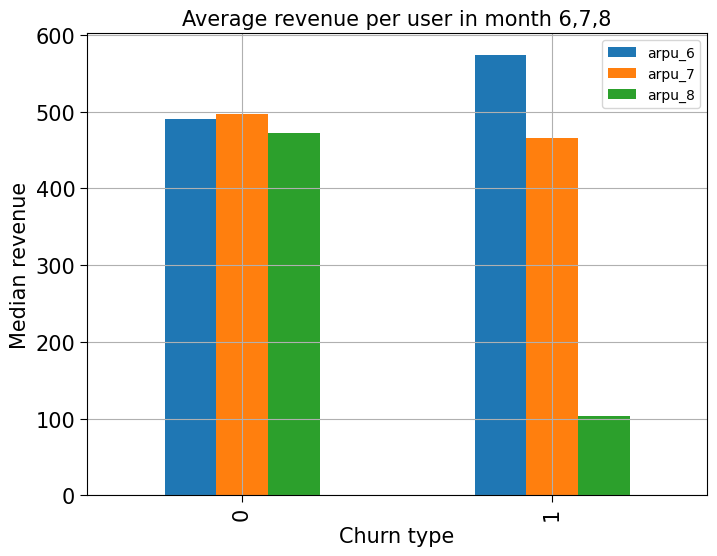

In [ ]:
# Plot to visualize average revenue per user(ARPU)
churn_data.groupby("target")[["arpu_6","arpu_7","arpu_8"]].median().plot.bar(figsize=[8,6])
plt.title("Average revenue per user in month 6,7,8",fontsize=15)
plt.tick_params(size=5,labelsize = 15)
plt.ylabel("Median revenue",fontsize=15)
plt.xlabel("Churn type",fontsize=15)
plt.grid(0.3)
plt.show()

**Inference:**

Average revenue per user in month 6,7,8

- For class 0, Month of July is highest
- For class 1, Month of June is highest
- For class 1, there is a sharp drop in the revenue observed in the Month of August (Action phase)

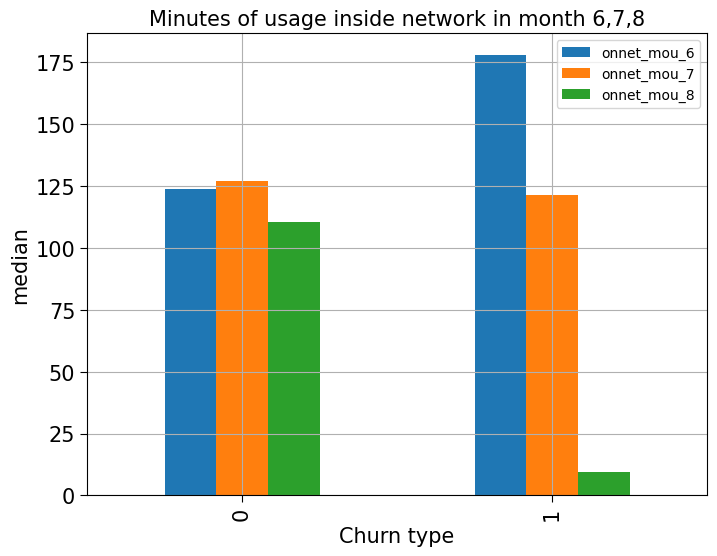

In [ ]:
## Plot to visualize onnet_mou
churn_data.groupby("target")[["onnet_mou_6","onnet_mou_7","onnet_mou_8" ]].median().plot.bar(figsize=[8,6])
plt.tick_params(size=5,labelsize = 15)
plt.title("Minutes of usage inside network in month 6,7,8",fontsize=15)
plt.ylabel("median",fontsize=15)
plt.xlabel("Churn type",fontsize=15)
plt.grid(0.3)
plt.show()

**Inference:**

Minutes of usage inside network in month 6,7,8

- For class 0, Month of July is highest
- For class 1, Month of June is highest
- For class 1, there is a sharp drop in the MOU observed in the Month of August (Action phase)

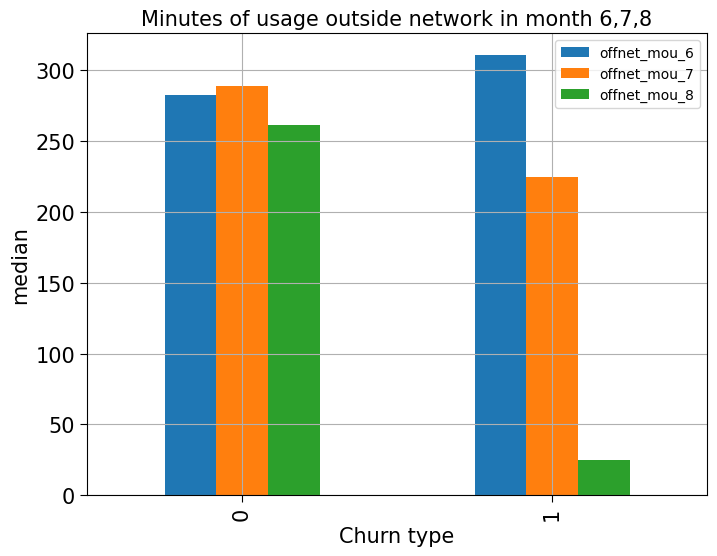

In [ ]:
# Plot to visualize offnet_mou
churn_data.groupby("target")[["offnet_mou_6","offnet_mou_7","offnet_mou_8"]].median().plot.bar(figsize=[8,6])
plt.tick_params(size=5,labelsize = 15)
plt.title("Minutes of usage outside network in month 6,7,8",fontsize=15)
plt.ylabel("median",fontsize=15)
plt.xlabel("Churn type",fontsize=15)
plt.grid(0.3)
plt.show()

**Inference:**

Minutes of usage outside network in month 6,7,8

- For class 0, Month of July is highest
- For class 1, Month of June is highest
- For class 1, there is a sharp drop in the MOU observed in the Month of August (Action phase)

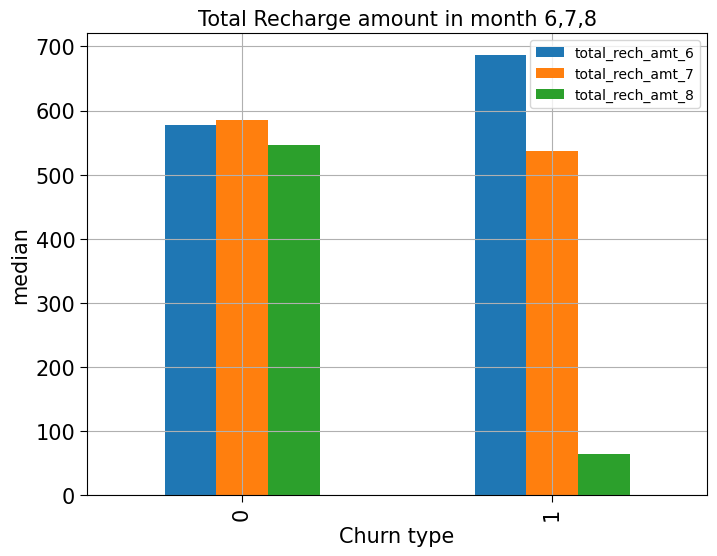

In [ ]:
# Plot to visualize total_rech_amt
churn_data.groupby("target")[["total_rech_amt_6","total_rech_amt_7","total_rech_amt_8"]].median().plot.bar(figsize=[8,6])
plt.tick_params(size=5,labelsize = 15)
plt.title("Total Recharge amount in month 6,7,8",fontsize=15)
plt.ylabel("median",fontsize=15)
plt.xlabel("Churn type",fontsize=15)
plt.grid(0.3)
plt.show()

**Inference:**

Total Recharge amount in month 6,7,8

- For class 0, Month of July is highest
- For class 1, Month of June is highest
- For class 1, there is a sharp drop in the total recharge observed in the Month of August (Action phase)

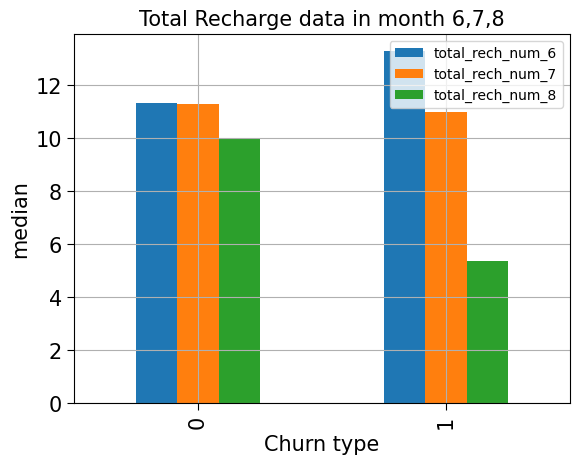

In [ ]:
# Plot to visualize total_rech_data_
churn_data.groupby("target")[["total_rech_num_6","total_rech_num_7","total_rech_num_8"]].mean().plot.bar()
plt.tick_params(size=5,labelsize = 15)
plt.title("Total Recharge data in month 6,7,8",fontsize=15)
plt.ylabel("median",fontsize=15)
plt.xlabel("Churn type",fontsize=15)
plt.grid(0.3)
plt.show()

**Inference:**

Total Recharge data in month 6,7,8

- For class 0, Month of June is highest
- For class 1, Month of June is highest
- For class 1, there is a sharp drop in the total recharge observed in the Month of August (Action phase)

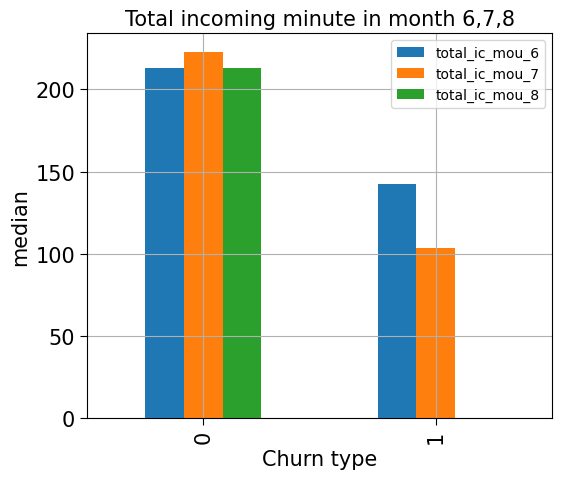

In [ ]:
#Plot to visualize total_ic_mou
churn_data.groupby("target")[["total_ic_mou_6","total_ic_mou_7","total_ic_mou_8"]].median().plot.bar(figsize=[6,5])
plt.tick_params(size=5,labelsize = 15)
plt.title("Total incoming minute in month 6,7,8",fontsize=15)
plt.ylabel("median",fontsize=15)
plt.xlabel("Churn type",fontsize=15)
plt.grid(0.3)
plt.show()

**Inference:**

Total incoming minute in month 6,7,8

- For class 0, Month of July is highest
- For class 1, Month of June is highest
- For class 1, there is a sharp drop in the total incoming minute observed in the Month of August (Action phase)

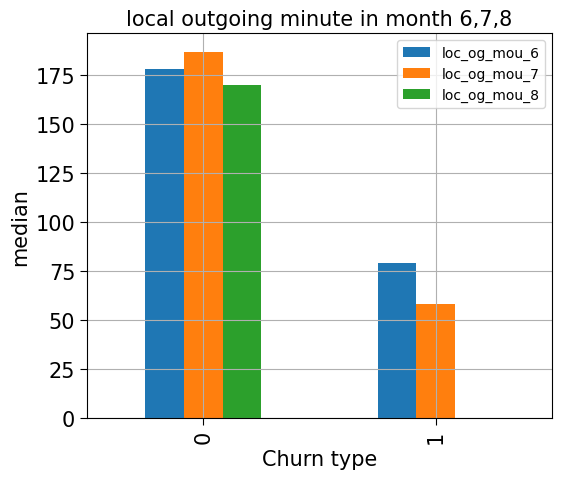

In [ ]:
#plot to visualize loc_og_mou
churn_data.groupby("target")[["loc_og_mou_6","loc_og_mou_7","loc_og_mou_8"]].median().plot.bar(figsize=[6,5])
plt.tick_params(size=5,labelsize = 15)
plt.title("local outgoing minute in month 6,7,8",fontsize=15)
plt.ylabel("median",fontsize=15)
plt.xlabel("Churn type",fontsize=15)
plt.grid(0.3)
plt.show()

**Inference:**

Total outcoming minute in month 6,7,8

- For class 0, Month of July is highest
- For class 1, Month of June is highest
- For class 1, there is a sharp drop in the total outcoming minute observed in the Month of August (Action phase)

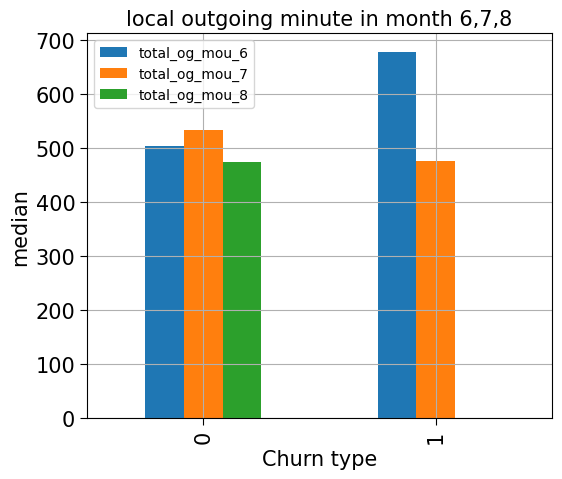

In [ ]:
# total_og_mou_6
churn_data.groupby("target")[["total_og_mou_6","total_og_mou_7","total_og_mou_8"]].median().plot.bar(figsize=[6,5])
plt.tick_params(size=5,labelsize = 15)
plt.title("local outgoing minute in month 6,7,8",fontsize=15)
plt.ylabel("median",fontsize=15)
plt.xlabel("Churn type",fontsize=15)
plt.grid(0.3)
plt.show()

**Inference:**

Local outgoing minute in month 6,7,8

- For class 0, Month of July is highest
- For class 1, Month of June is highest
- For class 1, there is a sharp drop in the local outcoming minute observed in the Month of August (Action phase)

#### Derive new variables

In [ ]:
# Usage
churn_data['delta_vol_2g'] = churn_data['vol_2g_mb_8'] - churn_data['vol_2g_mb_6'].add(churn_data['vol_2g_mb_7']).div(2)
churn_data['delta_vol_3g'] = churn_data['vol_3g_mb_8'] - churn_data['vol_3g_mb_6'].add(churn_data['vol_3g_mb_7']).div(2)
churn_data['delta_total_og_mou'] = churn_data['total_og_mou_8'] - churn_data['total_og_mou_6'].add(churn_data['total_og_mou_7']).div(2)
churn_data['delta_total_ic_mou'] = churn_data['total_ic_mou_8'] - churn_data['total_ic_mou_6'].add(churn_data['total_ic_mou_7']).div(2)
churn_data['delta_vbc_3g'] = churn_data['vbc_3g_8'] - churn_data['vbc_3g_6'].add(churn_data['vbc_3g_7']).div(2)

In [ ]:
# Revenue
churn_data['delta_arpu'] = churn_data['arpu_8'] - churn_data['arpu_6'].add(churn_data['arpu_7']).div(2)
churn_data['delta_total_rech_amt'] = churn_data['total_rech_amt_8'] - churn_data['total_rech_amt_6'].add(churn_data['total_rech_amt_7']).div(2)

Text(0.5, 1.0, 'Change in 2G_Volume vs Churn Rate')

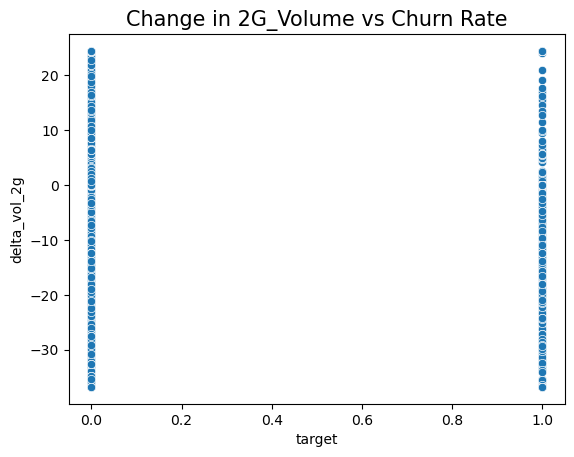

In [ ]:
sns.scatterplot(data = churn_data,  x = 'target', y = 'delta_vol_2g')
plt.title("Change in 2G_Volume vs Churn Rate",fontsize=15)

**Inference:**

Change in 2G_Volume vs Churn Rate

- For class 0, No variance is observed.
- For class 1, Some variance is observed.
- Both the classes have high density on negative side but for class 1, it is lesser dense on postive side in 2G_Volume.

Text(0.5, 1.0, 'Change in 3G_Volume vs Churn Rate')

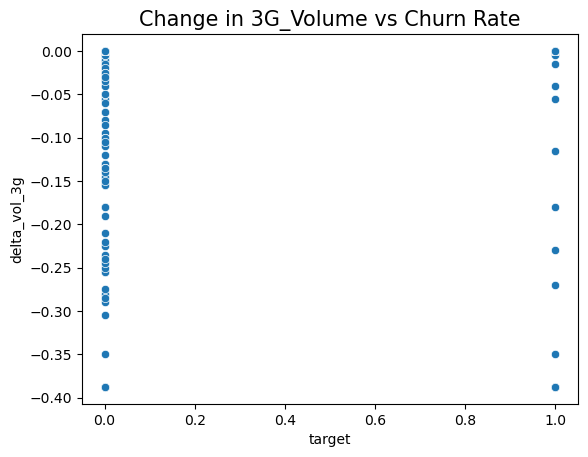

In [ ]:
sns.scatterplot(data = churn_data,  x = 'target', y = 'delta_vol_3g')
plt.title("Change in 3G_Volume vs Churn Rate",fontsize=15)

**Inference:**

Change in 3G_Volume vs Churn Rate

- For class 0, Some variance is observed.
- For class 1, Still more variance is observed than class 0.

- For class 0, the density is decreasing towards the negative end.
- For class 1, the density is riguorously decreasing towards the negative end.

Text(0.5, 1.0, 'Change in Total_Outgoing_mou vs Churn Rate')

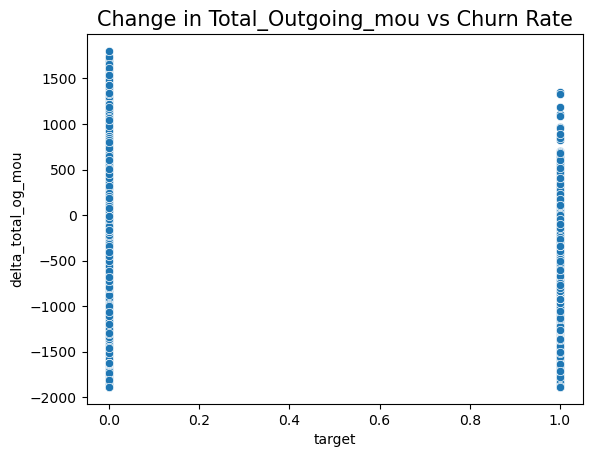

In [ ]:
sns.scatterplot(data = churn_data,  x = 'target', y = 'delta_total_og_mou')
plt.title("Change in Total_Outgoing_mou vs Churn Rate",fontsize=15)

**Inference:**

Change in Total_Outgoing_mou vs Churn Rate

- For class 0, No variance is observed.
- For class 1, Some variance is observed.
- Both the classes have high density on negative side but for class 1, it is lesser dense on postive side in Total_Outgoing_mou.

Text(0.5, 1.0, 'Change in Total_Incoming_mou vs Churn Rate')

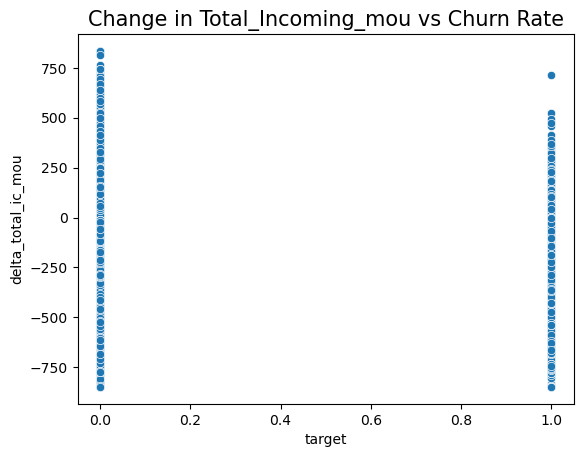

In [ ]:
sns.scatterplot(data = churn_data,  x = 'target', y = 'delta_total_ic_mou')
plt.title("Change in Total_Incoming_mou vs Churn Rate",fontsize=15)

**Inference:**

Change in Total_Incoming_mou vs Churn Rate

- For class 0, No variance is observed.
- For class 1, Some variance is observed.
- Both the classes have high density on negative side but for class 1, it is lesser dense on postive side in Total_Incoming_mou.

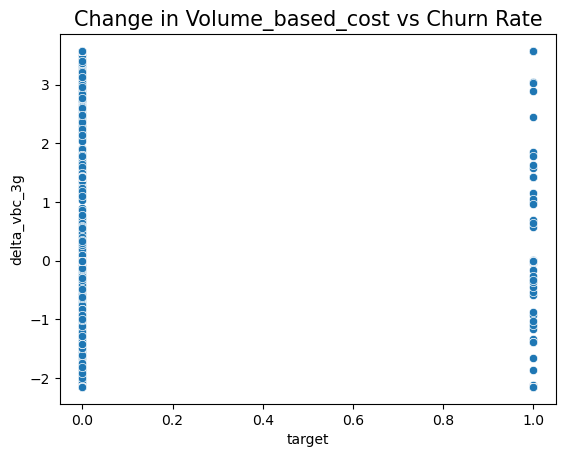

In [ ]:
sns.scatterplot(data = churn_data,  x = 'target', y = 'delta_vbc_3g')
plt.title("Change in Volume_based_cost vs Churn Rate",fontsize=15)
plt.show()

**Inference:**

Change in Total_Outgoing_mou vs Churn Rate

- For class 0, No variance is observed.
- For class 1, Some variance is observed.
- For class 0, the density is higher on both positive and negative ends.
- For class 1, the density is lesser on both positive and negative ends.

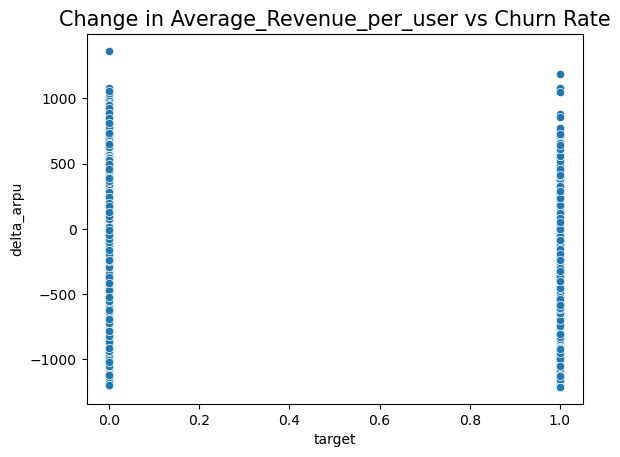

In [ ]:
sns.scatterplot(data = churn_data,  x = 'target', y = 'delta_arpu')
plt.title("Change in Average_Revenue_per_user vs Churn Rate",fontsize=15)
plt.show()

**Inference:**

Change in Average_Revenue_per_user vs Churn Rate

- For class 0, No variance is observed.
- For class 1, Some variance is observed.
- Both the classes have high density on negative side but for class 1, it is lesser dense on postive side in Average_Revenue_per_user.

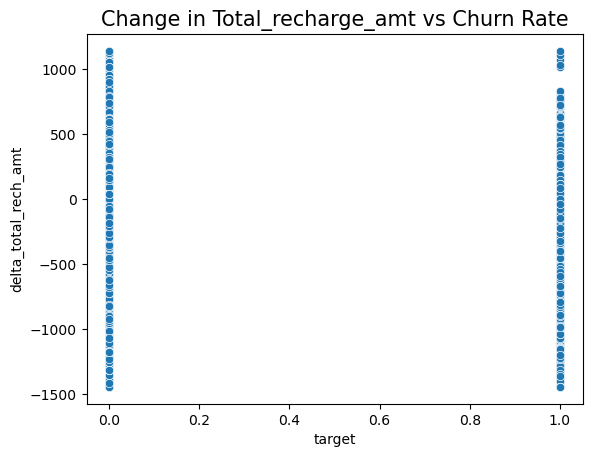

In [ ]:
sns.scatterplot(data = churn_data,  x = 'target', y = 'delta_total_rech_amt')
plt.title("Change in Total_recharge_amt vs Churn Rate",fontsize=15)
plt.show()

**Inference:**

Change in Total_recharge_amt vs Churn Rate

- For class 0, No variance is observed.
- For class 1, Some variance is observed.
- Both the classes have high density on negative side but for class 1, it is lesser dense on postive side in Total_recharge_amt.

In [ ]:
to_drop = ['delta_vol_2g','delta_vol_3g','delta_total_og_mou','delta_total_ic_mou',
'delta_vbc_3g','delta_arpu','delta_total_rech_amt']

churn_data.drop(to_drop,axis=1,inplace=True)
churn_data.shape

(29793, 127)

In [ ]:
# lets check the correlation amongst the independent variables, drop the highly correlated ones
telecom_data_corr = churn_data.corr()
telecom_data_corr.loc[:,:] = np.tril(telecom_data_corr, k=-1)
telecom_data_corr = telecom_data_corr.stack()
telecom_data_corr
telecom_data_corr[(telecom_data_corr > 0.80) | (telecom_data_corr < -0.80)].sort_values(ascending=False)

total_rech_amt_8  arpu_8              0.936237
total_rech_amt_6  arpu_6              0.920161
loc_ic_mou_8      loc_ic_t2m_mou_8    0.915261
total_ic_mou_8    loc_ic_mou_8        0.912426
total_ic_mou_6    loc_ic_mou_6        0.911199
total_rech_amt_7  arpu_7              0.909718
loc_ic_mou_6      loc_ic_t2m_mou_6    0.906074
total_ic_mou_7    loc_ic_mou_7        0.905142
loc_ic_mou_7      loc_ic_t2m_mou_7    0.902989
loc_og_mou_8      loc_og_t2m_mou_8    0.892456
loc_og_mou_6      loc_og_t2m_mou_6    0.880532
loc_og_mou_7      loc_og_t2m_mou_7    0.875702
std_ic_mou_8      std_ic_t2m_mou_8    0.874737
std_ic_mou_6      std_ic_t2m_mou_6    0.865537
std_ic_mou_7      std_ic_t2m_mou_7    0.864648
loc_ic_mou_8      loc_ic_mou_7        0.851444
loc_og_mou_8      loc_og_mou_7        0.841274
loc_ic_mou_7      loc_ic_mou_6        0.837404
loc_ic_t2m_mou_8  loc_ic_t2m_mou_7    0.836880
total_ic_mou_8    loc_ic_t2m_mou_8    0.832752
std_og_t2t_mou_7  onnet_mou_7         0.828099
total_ic_mou_

In [ ]:
# Dropping the highly correlated variables
churn_data.drop(['total_rech_amt_8','total_rech_amt_6','total_rech_amt_7','total_ic_mou_6','total_ic_mou_8',
                 'loc_ic_mou_8','total_ic_mou_7','loc_og_mou_8','loc_ic_mou_6','loc_ic_mou_7','loc_og_mou_6',
                 'loc_og_mou_7','std_ic_mou_8','std_ic_mou_7','std_ic_mou_6'],axis=1,inplace=True)
churn_data.shape

(29793, 112)

### Model Building & Predictions

#### Splitting and Scaling

In [ ]:
#Creating the Dependent and Independent Variable sets
X = churn_data.drop(['mobile_number','target'],axis=1)
y = churn_data['target']

In [ ]:
#Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((20855, 110), (20855,), (8938, 110), (8938,))

In [ ]:
#Collecting the column names into a list
col = X_train.columns.to_list()
print(col)

['arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8', 'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8', 'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8', 'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8', 'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8', 'std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2m_mou_6', 'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 'std_og_t2f_mou_6', 'std_og_t2f_mou_7', 'std_og_t2f_mou_8', 'std_og_mou_6', 'std_og_mou_7', 'std_og_mou_8', 'isd_og_mou_6', 'isd_og_mou_7', 'isd_og_mou_8', 'spl_og_mou_6', 'spl_og_mou_7', 'spl_og_mou_8', 'og_others_6', 'og_others_7', 'og_others_8', 'total_og_mou_6', 'total_og_mou_7', 'total_og_mou_8', 'loc_ic_t2t_mou_6', 'loc_ic_t2t_mou_7', 'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_6', 'loc_ic_t2m_mou_7', 'loc_ic_t2m

**Since the data has class imbalance, we are using the SMOTE method to balance the data**

In [ ]:
#Using the SMOTE method for class imbalance reduction
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)

X_train, y_train = smote.fit_resample(X_train, y_train)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((38202, 110), (8938, 110), (38202,), (8938,))

In [ ]:
# Instantiate the Scaler
scaler = StandardScaler()

In [ ]:
#Rescaling the data
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
#Train set
X_train = pd.DataFrame(X_train)
X_train.columns=col
X_train.shape

(38202, 110)

In [ ]:
#Test set
X_test = pd.DataFrame(X_test)
X_test.columns=col
X_test.shape

(8938, 110)

#### Using Logistic Regression without PCA

If we approach through direct method:

- It also takes a lot of time.
- We can see that there are few features have positive coefficients and few have negative.
- Many features have higher p-values and hence became insignificant in the model.

**So we can approach the RFE method and drop the in-significant columns manually.**

In [ ]:
# create a logistic regression
logreg = LogisticRegression(random_state=42)

# running RFE with 15 variables as output
rfe = RFE(logreg, n_features_to_select=15)
rfe = rfe.fit(X_train, y_train)

In [ ]:
#Checking the ranking of the columns
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('arpu_6', False, 51),
 ('arpu_7', True, 1),
 ('arpu_8', True, 1),
 ('onnet_mou_6', False, 26),
 ('onnet_mou_7', False, 56),
 ('onnet_mou_8', True, 1),
 ('offnet_mou_6', False, 4),
 ('offnet_mou_7', False, 14),
 ('offnet_mou_8', False, 33),
 ('roam_ic_mou_6', False, 71),
 ('roam_ic_mou_7', False, 70),
 ('roam_ic_mou_8', False, 76),
 ('roam_og_mou_6', False, 78),
 ('roam_og_mou_7', False, 80),
 ('roam_og_mou_8', False, 81),
 ('loc_og_t2t_mou_6', True, 1),
 ('loc_og_t2t_mou_7', False, 34),
 ('loc_og_t2t_mou_8', True, 1),
 ('loc_og_t2m_mou_6', False, 3),
 ('loc_og_t2m_mou_7', False, 15),
 ('loc_og_t2m_mou_8', True, 1),
 ('loc_og_t2f_mou_6', False, 52),
 ('loc_og_t2f_mou_7', False, 59),
 ('loc_og_t2f_mou_8', False, 37),
 ('loc_og_t2c_mou_6', False, 87),
 ('loc_og_t2c_mou_7', False, 42),
 ('loc_og_t2c_mou_8', False, 40),
 ('std_og_t2t_mou_6', False, 28),
 ('std_og_t2t_mou_7', False, 12),
 ('std_og_t2t_mou_8', True, 1),
 ('std_og_t2m_mou_6', False, 5),
 ('std_og_t2m_mou_7', False, 32),
 ('s

In [ ]:
#Collecting the supported columns into a list
lr_col = X_train.columns[rfe.support_]
lr_col

Index(['arpu_7', 'arpu_8', 'onnet_mou_8', 'loc_og_t2t_mou_6',
       'loc_og_t2t_mou_8', 'loc_og_t2m_mou_8', 'std_og_t2t_mou_8',
       'total_og_mou_8', 'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_6',
       'loc_ic_t2m_mou_8', 'total_rech_num_8', 'max_rech_amt_7',
       'last_day_rch_amt_8', 'vol_2g_mb_8'],
      dtype='object')

##### Model-1

In [ ]:
X = X_train[lr_col]
X_train_lm = sm.add_constant(X)
log1 = sm.GLM(y_train,X_train_lm,family = sm.families.Binomial())
log_model1 = log1.fit(random_state=42)
print(log_model1.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 target   No. Observations:                38202
Model:                            GLM   Df Residuals:                    38186
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -15562.
Date:                Mon, 07 Oct 2024   Deviance:                       31124.
Time:                        21:13:34   Pearson chi2:                 5.84e+04
No. Iterations:                     6   Pseudo R-squ. (CS):             0.4354
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.1880      0

In [ ]:
#Find the VIF for all the variables
vif = pd.DataFrame()
vif['Features'] = X_train[lr_col].columns
vif['VIF'] = [variance_inflation_factor(X_train[lr_col].values, i) for i in range(X_train[lr_col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
2          onnet_mou_8  7.73
6     std_og_t2t_mou_8  5.81
1               arpu_8  4.92
4     loc_og_t2t_mou_8  4.88
7       total_og_mou_8  4.17
10    loc_ic_t2m_mou_8  3.88
5     loc_og_t2m_mou_8  3.31
8     loc_ic_t2t_mou_8  2.79
11    total_rech_num_8  2.38
9     loc_ic_t2m_mou_6  2.18
3     loc_og_t2t_mou_6  2.17
12      max_rech_amt_7  1.79
0               arpu_7  1.70
13  last_day_rch_amt_8  1.66
14         vol_2g_mb_8  1.23

In [ ]:
#Dropping it because of high VIF value
lr_col = lr_col.drop('onnet_mou_8',1)

##### Model-2

In [ ]:
X = X_train[lr_col]
X_train_lm = sm.add_constant(X)
log2 = sm.GLM(y_train,X_train_lm,family = sm.families.Binomial())
log_model2 = log2.fit(random_state=42)
print(log_model2.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 target   No. Observations:                38202
Model:                            GLM   Df Residuals:                    38187
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -15598.
Date:                Mon, 07 Oct 2024   Deviance:                       31196.
Time:                        21:13:35   Pearson chi2:                 5.82e+04
No. Iterations:                     6   Pseudo R-squ. (CS):             0.4343
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.1935      0

In [ ]:
#Find the VIF for all the variables
vif = pd.DataFrame()
vif['Features'] = X_train[lr_col].columns
vif['VIF'] = [variance_inflation_factor(X_train[lr_col].values, i) for i in range(X_train[lr_col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
1               arpu_8  4.89
6       total_og_mou_8  3.94
9     loc_ic_t2m_mou_8  3.88
3     loc_og_t2t_mou_8  3.86
4     loc_og_t2m_mou_8  3.16
7     loc_ic_t2t_mou_8  2.78
10    total_rech_num_8  2.37
8     loc_ic_t2m_mou_6  2.18
2     loc_og_t2t_mou_6  2.15
5     std_og_t2t_mou_8  2.01
11      max_rech_amt_7  1.79
0               arpu_7  1.70
12  last_day_rch_amt_8  1.66
13         vol_2g_mb_8  1.23

**This is the final logistic regression model**

##### Final Model

In [ ]:
X = X_train[lr_col]
X_train_lm = sm.add_constant(X)
log_f = sm.GLM(y_train,X_train_lm,family = sm.families.Binomial())
final_model = log_f.fit(random_state=42)
print(final_model.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 target   No. Observations:                38202
Model:                            GLM   Df Residuals:                    38187
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -15598.
Date:                Mon, 07 Oct 2024   Deviance:                       31196.
Time:                        21:13:36   Pearson chi2:                 5.82e+04
No. Iterations:                     6   Pseudo R-squ. (CS):             0.4343
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.1935      0

##### Predictions on Train set

In [ ]:
#Predictions on train set
y_train_pred = final_model.predict(X_train_lm)
y_train_pred.head()

0    0.099271
1    0.517762
2    0.005087
3    0.024811
4    0.893507
dtype: float64

In [ ]:
#reshaping the dataframe
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred

array([0.09927083, 0.51776203, 0.00508704, ..., 0.6617997 , 0.84731677,
       0.18344526])

In [ ]:
#Creating the prob dataframe
y_train_pred_final = pd.DataFrame({'Churn':y_train.values, 'Churn_Prob':y_train_pred})
y_train_pred_final['CustID'] = y_train.index
y_train_pred_final.head()

Churn  Churn_Prob  CustID
0      0    0.099271       0
1      0    0.517762       1
2      0    0.005087       2
3      0    0.024811       3
4      0    0.893507       4

###### Finding optimal cutoff

In [ ]:
# Let's create columns with different probability cutoffs
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

Churn  Churn_Prob  CustID  0.0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9
0      0    0.099271       0    1    0    0    0    0    0    0    0    0    0
1      0    0.517762       1    1    1    1    1    1    1    0    0    0    0
2      0    0.005087       2    1    0    0    0    0    0    0    0    0    0
3      0    0.024811       3    1    0    0    0    0    0    0    0    0    0
4      0    0.893507       4    1    1    1    1    1    1    1    1    1    0

In [ ]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])

# TP = confusion[1,1] # true positive
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = confusion_matrix(y_train_pred_final.Churn, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1

    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.500000  1.000000  0.000000
0.1   0.1  0.679991  0.975551  0.384430
0.2   0.2  0.747945  0.950893  0.544998
0.3   0.3  0.788205  0.914821  0.661588
0.4   0.4  0.813465  0.879169  0.747762
0.5   0.5  0.825323  0.832103  0.818544
0.6   0.6  0.825480  0.779279  0.871682
0.7   0.7  0.812130  0.712895  0.911366
0.8   0.8  0.775849  0.607350  0.944348
0.9   0.9  0.628658  0.276739  0.980577


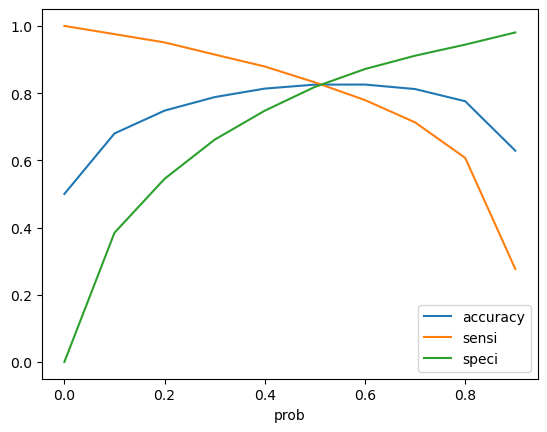

In [ ]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

**From the above graph, we can say that 0.5 is the optimal cutoff**

In [ ]:
#With 0.5 as cut-off value
y_train_pred_final['Predicted'] = [1 if x > 0.5 else 0 for x in y_train_pred_final['Churn_Prob']]
y_train_pred_final.head()

Churn  Churn_Prob  CustID  0.0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  \
0      0    0.099271       0    1    0    0    0    0    0    0    0    0   
1      0    0.517762       1    1    1    1    1    1    1    0    0    0   
2      0    0.005087       2    1    0    0    0    0    0    0    0    0   
3      0    0.024811       3    1    0    0    0    0    0    0    0    0   
4      0    0.893507       4    1    1    1    1    1    1    1    1    1   

   0.9  Predicted  
0    0          0  
1    0          1  
2    0          0  
3    0          0  
4    0          1

In [ ]:
#Confusion matrix
confusion = confusion_matrix(y_train_pred_final['Churn'], y_train_pred_final['Predicted'])
confusion

array([[15635,  3466],
       [ 3207, 15894]], dtype=int64)

In [ ]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [ ]:
# Accuracy
print('Train set Metrics:')
print('Accuracy:', accuracy_score(y_train_pred_final.Churn, y_train_pred_final.Predicted))

# Sensitivity
print("Sensitivity:",TP / float(TP+FN))

# Specificity
print("Specificity:", TN / float(TN+FP))

Train set Metrics:
Accuracy: 0.8253232815035862
Sensitivity: 0.8321030312549081
Specificity: 0.8185435317522642


In [ ]:
# ROC Curve function

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

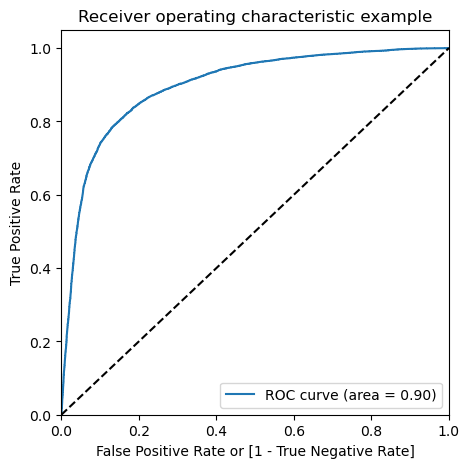

In [ ]:
#ROC Curve
draw_roc(y_train_pred_final['Churn'], y_train_pred_final['Churn_Prob'])

In [ ]:
#ROC Curve area
roc_auc_score(y_train_pred_final.Churn, y_train_pred_final.Churn_Prob)

0.897554735373356

##### Predictions on Test set

In [ ]:
#Creating the X_test_lr
X_test_lr = X_test[lr_col]
X_test_lr.head()

arpu_7    arpu_8  loc_og_t2t_mou_6  loc_og_t2t_mou_8  loc_og_t2m_mou_8  \
0 -0.494108  0.216313         -0.340387         -0.174993          0.812663   
1 -0.424709  0.075488         -0.639669          2.937114          1.205945   
2 -0.259071  0.826444          2.578743         -0.096254         -0.051261   
3 -0.203597  0.575313          2.578743          2.937114          0.323155   
4 -0.142578  0.260065         -0.837568         -0.647073         -0.691119   

   std_og_t2t_mou_8  total_og_mou_8  loc_ic_t2t_mou_8  loc_ic_t2m_mou_6  \
0          0.142028        0.355320         -0.480777         -0.262412   
1         -0.576365        0.244068          2.973216          2.046575   
2         -0.576365       -0.585976          2.973216          0.374349   
3          0.274727        0.936521          2.973216          0.273193   
4         -0.576365       -0.844084         -0.684231         -0.949710   

   loc_ic_t2m_mou_8  total_rech_num_8  max_rech_amt_7  last_day_rch_amt_8  \
0         -0.003455          0.357117       -0.204806            1.807953   
1          0.745100         -0.712719       -0.083302            0.919363   
2          0.495328          0.051449        0.208308            1.224022   
3          1.292855          0.357117       -0.204806            0.919363   
4         -0.737268         -0.865553        2.346780            3.394719   

   vol_2g_mb_8  
0    -0.468426  
1    -0.468426  
2     2.444841  
3    -0.468426  
4    -0.468426

In [ ]:
#Predictions on test set
X_test_sm = sm.add_constant(X_test_lr)
y_test_pred = final_model.predict(X_test_sm)
y_test_pred.head()

0    0.090514
1    0.037138
2    0.074103
3    0.023692
4    0.178054
dtype: float64

In [ ]:
# Converting y_pred to a dataframe which is an array
y_test_pred = pd.DataFrame(y_test_pred)
y_test_pred.head()

0
0  0.090514
1  0.037138
2  0.074103
3  0.023692
4  0.178054

In [ ]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

# Putting CustID to index
y_test_df['CustID'] = y_test_df.index
y_test_df.head()

target  CustID
1555        0    1555
10084       0   10084
16238       0   16238
21090       0   21090
19820       0   19820

In [ ]:
# Removing index for both dataframes to append them side by side
y_test_pred.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [ ]:
# Appending y_test_df and y_pred_pred
y_pred_final = pd.concat([y_test_df, y_test_pred],axis=1)
y_pred_final.head()

target  CustID         0
0       0    1555  0.090514
1       0   10084  0.037138
2       0   16238  0.074103
3       0   21090  0.023692
4       0   19820  0.178054

In [ ]:
# Renaming the column
y_pred_final= y_pred_final.rename(columns={ 0 : 'Churn_Prob'})
y_pred_final.head()

target  CustID  Churn_Prob
0       0    1555    0.090514
1       0   10084    0.037138
2       0   16238    0.074103
3       0   21090    0.023692
4       0   19820    0.178054

In [ ]:
#With cut-off value 0.5
y_pred_final['final_predicted'] = y_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_pred_final.head()

target  CustID  Churn_Prob  final_predicted
0       0    1555    0.090514                0
1       0   10084    0.037138                0
2       0   16238    0.074103                0
3       0   21090    0.023692                0
4       0   19820    0.178054                0

In [ ]:
#Confusion matrix
confusion2 = confusion_matrix(y_pred_final.target, y_pred_final.final_predicted)
confusion2

array([[6679, 1477],
       [ 124,  658]], dtype=int64)

In [ ]:
TP = confusion2[1,1] # true positive
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [ ]:
# Accuracy
print('Test Set Metrics:')
print('Accuracy:', accuracy_score(y_pred_final.target, y_pred_final.final_predicted))

# Sensitivity
print("Sensitivity:",TP / float(TP+FN))

# Specificity
print("Specificity:", TN / float(TN+FP))

Test Set Metrics:
Accuracy: 0.8208771537256657
Sensitivity: 0.8414322250639387
Specificity: 0.8189063266307013


In [ ]:
# ROC Curve function

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

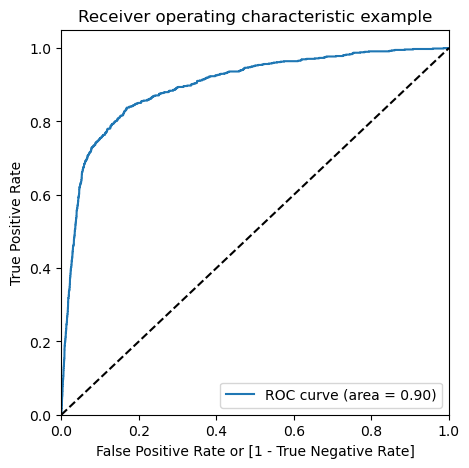

In [ ]:
# ROC Curve
draw_roc(y_pred_final.target, y_pred_final.Churn_Prob)

In [ ]:
# ROC Curve area
roc_auc_score(y_pred_final.target, y_pred_final.Churn_Prob)

0.8975605488373143

##### Model Summary for LR without PCA


    Train set
        Accuracy: 82.5%
        Sensitivity: 83.2%
        Specificity: 81.8%
    Test set
        Accuracy: 82.0%
        Sensitivity: 84.1%
        Specificity: 81.8%
        
**Overall, the model seems to be performing well for both train and test sets**

#### Using Logistic Regression with PCA

In [ ]:
#Using PCA
pca = PCA(random_state=42)

#Creating PCA train and test tests
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [ ]:
#Getting the pca components
pca.components_

array([[ 3.81749200e-02,  1.06525772e-01,  1.66514963e-01, ...,
         1.12346619e-01, -0.00000000e+00,  8.76016504e-02],
       [ 8.86188424e-02,  1.72220913e-01,  1.56789685e-01, ...,
        -8.06255231e-02,  0.00000000e+00,  1.58338300e-01],
       [-2.34389027e-01,  4.11074596e-02,  1.63872656e-01, ...,
         1.34014754e-01, -0.00000000e+00, -1.07313206e-01],
       ...,
       [-0.00000000e+00, -7.04443698e-17, -1.45621688e-16, ...,
        -2.77555756e-17, -0.00000000e+00, -1.38777878e-17],
       [ 0.00000000e+00,  4.43594216e-17, -5.40742568e-18, ...,
        -9.71445147e-17,  0.00000000e+00,  2.51534904e-17],
       [ 0.00000000e+00, -5.63448156e-17,  2.14260747e-16, ...,
        -3.46944695e-17,  0.00000000e+00, -1.11022302e-16]])

In [ ]:
#Getting the cumulative variance
variance_cumu = np.cumsum(pca.explained_variance_ratio_)
print(variance_cumu)

[0.17295658 0.31222005 0.37676988 0.43599732 0.48640797 0.53060868
 0.56913841 0.59774116 0.62472449 0.64793013 0.67019332 0.69180235
 0.7089059  0.72484381 0.73853469 0.75158643 0.76399707 0.7758845
 0.78737451 0.79794761 0.80834475 0.8180043  0.82737495 0.83614892
 0.84476381 0.85297455 0.86053076 0.8679935  0.87514345 0.88199306
 0.88862298 0.89492839 0.90098418 0.90660238 0.9121164  0.91715708
 0.92193224 0.92653318 0.93105332 0.93547197 0.9396975  0.94370372
 0.94754901 0.95107198 0.95447547 0.95785788 0.96109859 0.96431435
 0.96748957 0.97057405 0.97352828 0.97618485 0.97873581 0.98110089
 0.98311974 0.98501429 0.98684387 0.98842649 0.98995373 0.99137092
 0.99269915 0.99394714 0.99500924 0.99600372 0.99675406 0.99736659
 0.99796412 0.99849669 0.99900057 0.99934117 0.99965546 0.99987275
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.      

Text(0, 0.5, 'Cumulative Variance')

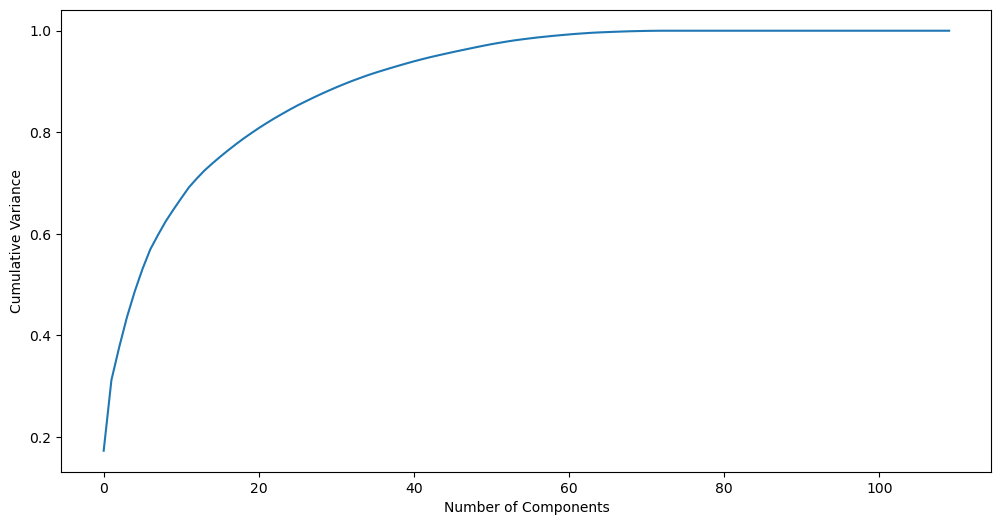

In [ ]:
# Plotting scree plot
fig = plt.figure(figsize = (12,6))
plt.plot(variance_cumu)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Variance')

**We can use only 60 components for the PCA**

##### Best Fit using PCA

In [ ]:
#Creating the pca with 60 components only
pca_best = PCA(n_components = 60, random_state=42)

#Fit and transform the X_train
X_train_pca = pca_best.fit_transform(X_train)

#Transform the X_test
X_test_pca = pca_best.transform(X_test)

In [ ]:
#Getting the cumulative variance
cum_var = np.cumsum(pca_best.explained_variance_ratio_)
print(cum_var)

[0.17295658 0.31222005 0.37676988 0.43599732 0.48640797 0.53060868
 0.56913841 0.59774116 0.62472449 0.64793013 0.67019332 0.69180235
 0.7089059  0.72484381 0.73853469 0.75158643 0.76399707 0.7758845
 0.78737451 0.79794761 0.80834475 0.8180043  0.82737495 0.83614892
 0.84476381 0.85297455 0.86053076 0.8679935  0.87514345 0.88199306
 0.88862298 0.89492839 0.90098418 0.90660238 0.9121164  0.91715708
 0.92193224 0.92653318 0.93105332 0.93547197 0.9396975  0.94370372
 0.94754901 0.95107198 0.95447547 0.95785788 0.96109859 0.96431435
 0.96748957 0.97057405 0.97352828 0.97618485 0.97873581 0.98110089
 0.98311974 0.98501429 0.98684387 0.98842648 0.98995372 0.9913709 ]


Text(0, 0.5, 'Cumulative Variance')

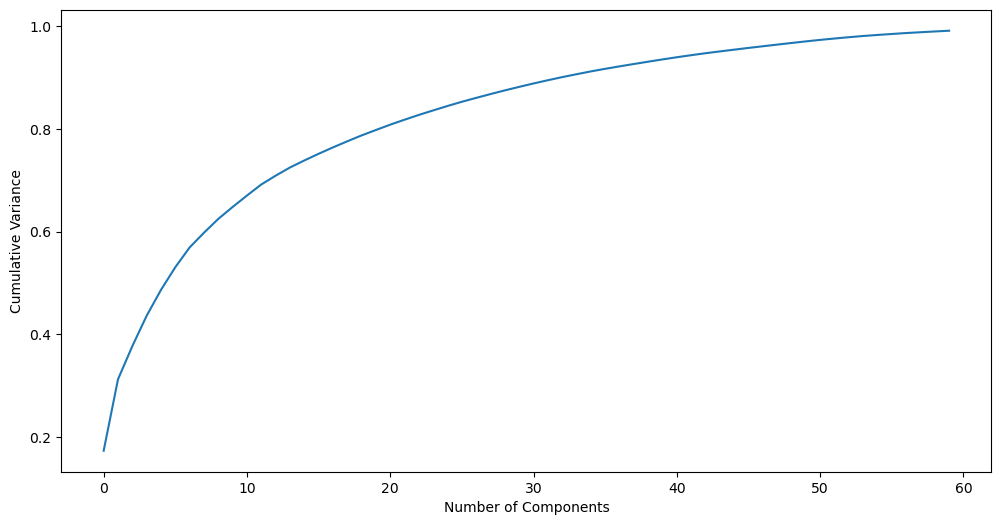

In [ ]:
# Plotting scree plot
fig = plt.figure(figsize = (12,6))
plt.plot(cum_var)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Variance')

In [ ]:
#Fit the model with pca data
lr = LogisticRegression(random_state=42)
lr.fit(X_train_pca,y_train)

LogisticRegression(random_state=42)

##### Predictions on Train set

In [ ]:
#Predictions on train data
y_train_pred = lr.predict(X_train_pca)

print('Train set confusion matrix')
confusion = confusion_matrix(y_train, y_train_pred)
print(confusion)

Train set confusion matrix
[[16006  3095]
 [ 3191 15910]]


In [ ]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [ ]:
print('Train Set Metrics')
# Accuracy
print('Accuracy:', accuracy_score(y_train, y_train_pred))

# Sensitivity
print("Sensitivity:",TP / float(TP+FN))

# Specificity
print("Specificity:", TN / float(TN+FP))

Train Set Metrics
Accuracy: 0.8354536411706194
Sensitivity: 0.8329406837338359
Specificity: 0.8379665986074027


In [ ]:
print('Train classification report')
print(classification_report(y_train, y_train_pred))

Train classification report
              precision    recall  f1-score   support

           0       0.83      0.84      0.84     19101
           1       0.84      0.83      0.84     19101

    accuracy                           0.84     38202
   macro avg       0.84      0.84      0.84     38202
weighted avg       0.84      0.84      0.84     38202



##### Predictions on Test set

In [ ]:
#Predictions on test set
y_test_pred = lr.predict(X_test_pca)

print('Test set confusion matrix')
confusion = confusion_matrix(y_test, y_test_pred)
print(confusion)

Test set confusion matrix
[[6843 1313]
 [ 132  650]]


In [ ]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [ ]:
print('Test Set Metrics')
# Accuracy
print('Accuracy:', accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:",TP / float(TP+FN))

# Specificity
print("Specificity:", TN / float(TN+FP))

Test Set Metrics
Accuracy: 0.8383307227567689
Sensitivity: 0.8312020460358056
Specificity: 0.8390142226581657


In [ ]:
print('Test classification report')
print(classification_report(y_test, y_test_pred))

Test classification report
              precision    recall  f1-score   support

           0       0.98      0.84      0.90      8156
           1       0.33      0.83      0.47       782

    accuracy                           0.84      8938
   macro avg       0.66      0.84      0.69      8938
weighted avg       0.92      0.84      0.87      8938



##### Model Summary for LR with PCA


    Train set
        Accuracy: 83.5%
        Sensitivity: 83.2%
        Specificity: 83.8%
    Test set
        Accuracy: 83.8%
        Sensitivity: 83.1%
        Specificity: 83.9%
        
**Overall, the model seems to be performing well for both train and test sets**

#### Using Decision Trees

In [ ]:
#Intialising a decision tree
dt = DecisionTreeClassifier(random_state = 42)

In [ ]:
#Intialising a param grid
params = {
    'max_depth': range(5, 15, 5), #2
    'min_samples_leaf': range(50, 150, 50), #2
    'min_samples_split': range(50, 150, 50), #2
    'criterion': ["gini", "entropy"] #2
}

In [ ]:
%%time
# Instantiate the grid search model
grid_search = GridSearchCV(estimator=dt,
                           param_grid=params,
                           cv=4, n_jobs=-1, verbose=1, scoring = "recall")

#Fit the DT
grid_search.fit(X_train_pca, y_train)

Fitting 4 folds for each of 16 candidates, totalling 64 fits
Wall time: 47 s


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(5, 15, 5),
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50)},
             scoring='recall', verbose=1)

In [ ]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0        2.643119      0.047125         0.014296        0.002975   
1        2.734495      0.068143         0.013144        0.003551   
2        2.689158      0.016087         0.016898        0.004248   
3        2.667022      0.028303         0.017670        0.004351   
4        4.368555      0.036983         0.011381        0.000736   
5        4.426110      0.068478         0.014879        0.005080   
6        4.074039      0.054694         0.015285        0.003715   
7        4.033394      0.045797         0.012968        0.003698   
8        4.258183      0.029223         0.014444        0.000346   
9        4.302830      0.057207         0.017160        0.002658   
10       4.244970      0.032294         0.014619        0.003341   
11       4.344227      0.100232         0.015239        0.004017   
12       6.999872      0.080368         0.016247        0.005525   
13       7.054736      0.153496         0.012730        0.003453   
14       6.387644      0.051267         0.016638        0.003802   
15       6.323330      0.050164         0.012148        0.003488   

   param_criterion param_max_depth param_min_samples_leaf  \
0             gini               5                     50   
1             gini               5                     50   
2             gini               5                    100   
3             gini               5                    100   
4             gini              10                     50   
5             gini              10                     50   
6             gini              10                    100   
7             gini              10                    100   
8          entropy               5                     50   
9          entropy               5                     50   
10         entropy               5                    100   
11         entropy               5                    100   
12         entropy              10                     50   
13         entropy              10                     50   
14         entropy              10                    100   
15         entropy              10                    100   

   param_min_samples_split                                             params  \
0                       50  {'criterion': 'gini', 'max_depth': 5, 'min_sam...   
1                      100  {'criterion': 'gini', 'max_depth': 5, 'min_sam...   
2                       50  {'criterion': 'gini', 'max_depth': 5, 'min_sam...   
3                      100  {'criterion': 'gini', 'max_depth': 5, 'min_sam...   
4                       50  {'criterion': 'gini', 'max_depth': 10, 'min_sa...   
5                      100  {'criterion': 'gini', 'max_depth': 10, 'min_sa...   
6                       50  {'criterion': 'gini', 'max_depth': 10, 'min_sa...   
7                      100  {'criterion': 'gini', 'max_depth': 10, 'min_sa...   
8                       50  {'criterion': 'entropy', 'max_depth': 5, 'min_...   
9                      100  {'criterion': 'entropy', 'max_depth': 5, 'min_...   
10                      50  {'criterion': 'entropy', 'max_depth': 5, 'min_...   
11                     100  {'criterion': 'entropy', 'max_depth': 5, 'min_...   
12                      50  {'criterion': 'entropy', 'max_depth': 10, 'min...   
13                     100  {'criterion': 'entropy', 'max_depth': 10, 'min...   
14                      50  {'criterion': 'entropy', 'max_depth': 10, 'min...   
15                     100  {'criterion': 'entropy', 'max_depth': 10, 'min...   

    split0_test_score  split1_test_score  split2_test_score  \
0            0.707225           0.799623           0.768377   
1            0.707225           0.799623           0.768377   
2            0.710785           0.802136           0.769634   
3            0.710785           0.802136           0.769634   
4            0.819058           0.822655           0.841047   
5            0.819058           0.822655           0.

In [ ]:
#the model that is created with these parameters are the best
print('The best parameters: ',grid_search.best_params_)

The best parameters:  {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 50, 'min_samples_split': 50}


In [ ]:
#the model that is created with these parameters have the accuracy score
print('The best score:',grid_search.best_score_)

The best score: 0.830689310426478


In [ ]:
#the best estimator
print('The best estimator:',grid_search.best_estimator_)

The best estimator: DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf=50,
                       min_samples_split=50, random_state=42)


In [ ]:
#Fitting the best estimator with the data
dt_best = grid_search.best_estimator_
dt_best.fit(X_train_pca, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf=50,
                       min_samples_split=50, random_state=42)

##### Predictions on Train set

In [ ]:
#Predictions on train data
y_train_pred = dt_best.predict(X_train_pca)

In [ ]:
print('Train set confusion matrix')
confusion = confusion_matrix(y_train, y_train_pred)
print(confusion)

Train set confusion matrix
[[16261  2840]
 [ 2887 16214]]


In [ ]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [ ]:
print('Train Set Metrics')
# Accuracy
print('Accuracy:', accuracy_score(y_train, y_train_pred))

# Sensitivity
print("Sensitivity:",TP / float(TP+FN))

# Specificity
print("Specificity:", TN / float(TN+FP))

Train Set Metrics
Accuracy: 0.8500863829118894
Sensitivity: 0.8488560808334642
Specificity: 0.8513166849903147


In [ ]:
print('Train classification report')
print(classification_report(y_train, y_train_pred))

Train classification report
              precision    recall  f1-score   support

           0       0.85      0.85      0.85     19101
           1       0.85      0.85      0.85     19101

    accuracy                           0.85     38202
   macro avg       0.85      0.85      0.85     38202
weighted avg       0.85      0.85      0.85     38202



##### Predictions on Test set

In [ ]:
#Predictions on test data
y_test_pred = dt_best.predict(X_test_pca)

In [ ]:
print("Test Confusion Matrix:")
confusion = confusion_matrix(y_test, y_test_pred)
print(confusion)

Test Confusion Matrix:
[[6747 1409]
 [ 223  559]]


In [ ]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [ ]:
print('Test Set Metrics')
# Accuracy
print('Accuracy:', accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:",TP / float(TP+FN))

# Specificity
print("Specificity:", TN / float(TN+FP))

Test Set Metrics
Accuracy: 0.8174088162899977
Sensitivity: 0.7148337595907929
Specificity: 0.827243746934772


In [ ]:
print('Test classification report')
print(classification_report(y_test, y_test_pred))

Test classification report
              precision    recall  f1-score   support

           0       0.97      0.83      0.89      8156
           1       0.28      0.71      0.41       782

    accuracy                           0.82      8938
   macro avg       0.63      0.77      0.65      8938
weighted avg       0.91      0.82      0.85      8938



##### Model Summary for Decision Tree with PCA


    Train set
        Accuracy: 85.0%
        Sensitivity: 84.8%
        Specificity: 85.1%
    Test set
        Accuracy: 81.7%
        Sensitivity: 71.4%
        Specificity: 82.7%
        
**Overall, the model seems to be not performing well for both train and test sets because sensitivity is dropped. However, Accuracy and Specificity seems to be good.**

#### Using Random Forest

In [ ]:
#Initialising the random forest classifier
rfc = RandomForestClassifier(random_state = 42)

In [ ]:
#Initialising the param grid
params = {
    'max_depth': range(5,10,5), #2
    'min_samples_leaf': range(50, 150, 50), #2
    'min_samples_split': range(50, 150, 50), #2
    'n_estimators': [100,200],  #2
    'max_features': [10, 20] #2
}

In [ ]:
%%time
# Instantiate the grid search model
grid_search = GridSearchCV(estimator=rfc,
                           param_grid=params,
                           cv=3, n_jobs=-1, verbose=1, scoring = "recall")
#Fit the model
grid_search.fit(X_train_pca, y_train)

Fitting 3 folds for each of 16 candidates, totalling 48 fits
Wall time: 7min 28s


GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': range(5, 10, 5), 'max_features': [10, 20],
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50),
                         'n_estimators': [100, 200]},
             scoring='recall', verbose=1)

In [ ]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       25.962654      0.073832         0.333911        0.024317   
1       52.433600      0.025469         0.596518        0.020338   
2       26.043772      0.335445         0.307619        0.007159   
3       52.507659      0.248949         0.585942        0.018099   
4       25.937447      0.178309         0.308562        0.008670   
5       51.937369      0.129906         0.586848        0.024857   
6       26.206531      0.212032         0.305482        0.011841   
7       51.922052      0.287647         0.566200        0.018225   
8       50.045371      0.166263         0.305255        0.001881   
9      100.149855      0.478392         0.572771        0.021443   
10      50.093224      0.213392         0.304602        0.007252   
11      99.205646      0.486806         0.586317        0.008561   
12      48.644390      0.284762         0.291392        0.003556   
13      96.524389      1.918217         0.512163        0.033666   
14      50.569452      0.336437         0.309585        0.025510   
15      88.030645      4.799819         0.494481        0.039225   

   param_max_depth param_max_features param_min_samples_leaf  \
0                5                 10                     50   
1                5                 10                     50   
2                5                 10                     50   
3                5                 10                     50   
4                5                 10                    100   
5                5                 10                    100   
6                5                 10                    100   
7                5                 10                    100   
8                5                 20                     50   
9                5                 20                     50   
10               5                 20                     50   
11               5                 20                     50   
12               5                 20                    100   
13               5                 20                    100   
14               5                 20                    100   
15               5                 20                    100   

   param_min_samples_split param_n_estimators  \
0                       50                100   
1                       50                200   
2                      100                100   
3                      100                200   
4                       50                100   
5                       50                200   
6                      100                100   
7                      100                200   
8                       50                100   
9                       50                200   
10                     100                100   
11                     100                200   
12                      50                100   
13                      50                200   
14                     100                100   
15                     100                200   

                                               params  split0_test_score  \
0   {'max_depth': 5, 'max_features': 10, 'min_samp...           0.768337   
1   {'max_depth': 5, 'max_features': 10, 'min_samp...           0.770379   
2   {'max_depth': 5, 'max_features': 10, 'min_samp...           0.768337   
3   {'max_depth': 5, 'max_features': 10, 'min_samp...           0.770379   
4   {'max_depth': 5, 'max_features': 10, 'min_samp...           0.765824   
5   {'max_depth': 5, 'max_features': 10, 'min_samp...           0.768965   
6   {'max_depth': 5, 'max_features': 10, 'min_samp...           0.765824   
7   {'max_depth': 5, 'max_features': 10, 'min_samp...           0.768965   
8   {'max_depth': 5, 'max_features': 20, 'min_samp...           0.762368   
9   {'max_depth': 5, 'max_features': 20, 'min_samp...           0.764253   
10  {'max_depth': 5, 'max_features': 20, 'min_samp...           0.762368   
11  {'max_de

In [ ]:
#the model that is created with these parameters are the best
print('The best parameters: ',grid_search.best_params_)

The best parameters:  {'max_depth': 5, 'max_features': 10, 'min_samples_leaf': 100, 'min_samples_split': 50, 'n_estimators': 200}


In [ ]:
#the model that is created with these parameters have the accuracy score
print('The best score:',grid_search.best_score_)

The best score: 0.7880215695513324


In [ ]:
#the best estimator
print('The best estimator:',grid_search.best_estimator_)

The best estimator: RandomForestClassifier(max_depth=5, max_features=10, min_samples_leaf=100,
                       min_samples_split=50, n_estimators=200, random_state=42)


In [ ]:
#Building the model with best estimator
rfc_best = grid_search.best_estimator_
rfc_best.fit(X_train_pca, y_train)

RandomForestClassifier(max_depth=5, max_features=10, min_samples_leaf=100,
                       min_samples_split=50, n_estimators=200, random_state=42)

##### Predictions on Train set

In [ ]:
# Predictions on Train set
y_train_pred = rfc_best.predict(X_train_pca)

In [ ]:
print('Train set confusion matrix')
confusion = confusion_matrix(y_train, y_train_pred)
print(confusion)

Train set confusion matrix
[[16188  2913]
 [ 3980 15121]]


In [ ]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [ ]:
print('Train Set Metrics')
# Accuracy
print('Accuracy:', accuracy_score(y_train, y_train_pred))

# Sensitivity
print("Sensitivity:",TP / float(TP+FN))

# Specificity
print("Specificity:", TN / float(TN+FP))

Train Set Metrics
Accuracy: 0.8195644207109576
Sensitivity: 0.7916339458667085
Specificity: 0.8474948955552065


In [ ]:
print('Train classification report')
print(classification_report(y_train, y_train_pred))

Train classification report
              precision    recall  f1-score   support

           0       0.80      0.85      0.82     19101
           1       0.84      0.79      0.81     19101

    accuracy                           0.82     38202
   macro avg       0.82      0.82      0.82     38202
weighted avg       0.82      0.82      0.82     38202



##### Predictions on Test set

In [ ]:
# Predictions on Test set
y_test_pred = rfc_best.predict(X_test_pca)

In [ ]:
print("Test Confusion Matrix:")
confusion = confusion_matrix(y_test, y_test_pred)
print(confusion)

Test Confusion Matrix:
[[6943 1213]
 [ 197  585]]


In [ ]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [ ]:
print('Test Set Metrics')
# Accuracy
print('Accuracy:', accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:",TP / float(TP+FN))

# Specificity
print("Specificity:", TN / float(TN+FP))

Test Set Metrics
Accuracy: 0.8422465876034907
Sensitivity: 0.7480818414322251
Specificity: 0.8512751348700344


In [ ]:
print('Test classification report')
print(classification_report(y_test, y_test_pred))

Test classification report
              precision    recall  f1-score   support

           0       0.97      0.85      0.91      8156
           1       0.33      0.75      0.45       782

    accuracy                           0.84      8938
   macro avg       0.65      0.80      0.68      8938
weighted avg       0.92      0.84      0.87      8938



##### Model Summary for Random Forest with PCA


    Train set
        Accuracy: 81.9%
        Sensitivity: 79.1%
        Specificity: 84.7%
    Test set
        Accuracy: 84.2%
        Sensitivity: 74.8%
        Specificity: 85.1%
        
**Overall, the model seems to be not performing well for test sets and resulting in overfitting. However, the accuracy and Specificity is good but the sensitivity is dropped a bit.**

### Conclusion

After trying several models we can see that for acheiving the best sensitivity, the classic Logistic regression model with RFE performs very well. For Logistic Regression model with RFE, the sensitivity is approx 80%. Also we have good accuracy of approx 80%.

#### Below are few top variables selected in the logistic regression model.

**Some important key features:**

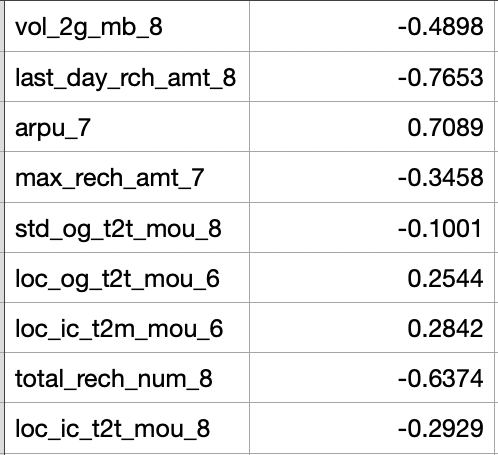



We can see most of the top variables have negative coefficients. That means, the variables are inversely correlated with the churn probablity.

#### Recommendations

1. Focus on those customers whose, whose outgoing calls has reduced in the month of August.
2. The customers whose incoming std usage has reduced in the month of August are most likely to churn. Target such customers.
3. Cutomers, whose monthly 2G and 3G recharge in August is lesser than June and July, are likely to be churned.
4. Give attractive offers to those customers whose Average Recharge amount is high in June and July to assure their retention.
5. Target those customers whose recharge amount reduced in the month of August as copmared to June and July.
6. Those customers are most likely to churn whose Local Outgoing minutes of usage has reduced in the month of August.